In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

import category_encoders as ce
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

!pip install category_encoders

In [2]:
acs = pd.read_csv('US_Accidents_Dec21_updated.csv')
print("The shape of data is:",(acs.shape))

The shape of data is: (2845342, 47)


In [3]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(acs.shape[0], acs.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


In [4]:
display(acs.head())

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [5]:
display(acs.tail())

ID  Severity           Start_Time             End_Time  \
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
2845337   34.00248 -117.37936  33.99888 -117.37094         0.543   
2845338   32.76696 -117.14806  32.76555 -117.15363         0.338   
2845339   33.77545 -117.84779  33.77740 -117.85727         0.561   
2845340   33.99246 -118.40302  33.98311 -118.39565         0.772   
2845341   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...  Roundabout  \
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
2845337            Day            Day               Day                   Day  
2845338            Day            Day               Day                   Day  
2845339            Day            Day               Day                   Day  
2845340            Day            Day               Day                   Day  
2845341            Day            Day               Day                   Day  

[5 rows x 47 columns]

In [6]:
cm = sns.light_palette("green", as_cmap=True)
acs.head().style.background_gradient(cmap=cm)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\User\anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [7]:
#statistical
acs.describe().style.background_gradient(cmap=cm) 

In [8]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
acs.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
len(acs)

2845342

# Analysis

In [11]:
# create a dataframe of city and their corresponding accident cases
city_acs = pd.DataFrame(acs['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [12]:
top_10_cities = pd.DataFrame(city_acs.head(10))

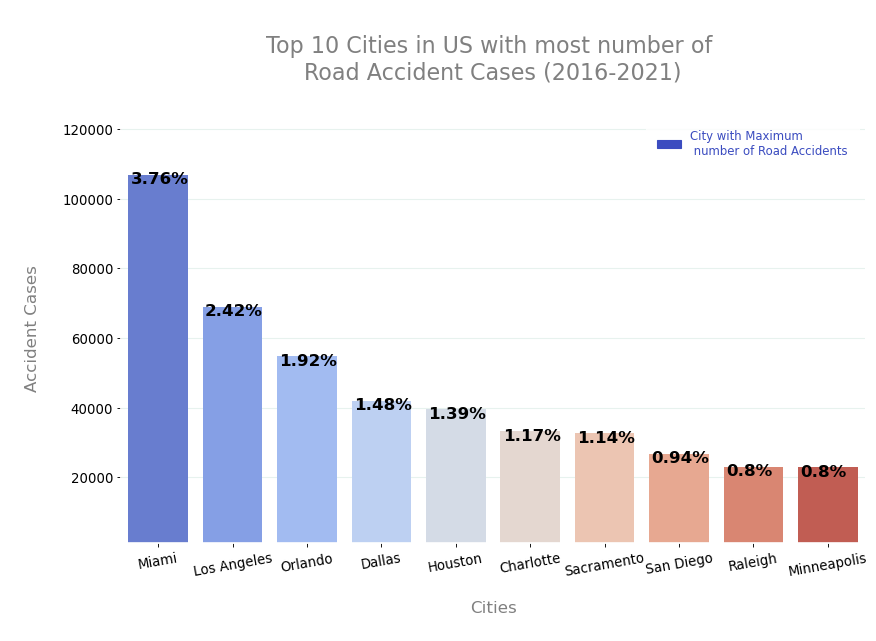

In [13]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = mpl.cm.get_cmap('coolwarm', 10)   
clrs = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='coolwarm')

total = sum(city_acs['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='black')

plt.title('\nTop 10 Cities in US with most number of \nRoad Accident Cases (2016-2021)\n', size=20, color='grey')

plt.ylim(1000, 125000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpl.patches.Patch(color=clrs[0], label='City with Maximum\n number of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

#### An estimation of 16% road accidents within the past 6 years were recorded from these 10 cities out of 21,621 cities within the US.

1) Miami has the highest number of road accidents within US, garnering 3.76% number of road accidents within US between 2016-2021.

2) Los Angeles is the second highest number of road accidents within US, garnering 2.39% number of road accidents within US between 2016-2021.

3) Orlando is the third highest number of road accidents within US, garnering 1.92% number of road accidents within US between 2016-2021.

## Analysis of the State

In [14]:
 # create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana','NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_acs = pd.DataFrame(acs['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_acs['State'] = state_acs['State'].apply(convert)


top_ten_states_name = list(state_acs['State'].head(10))

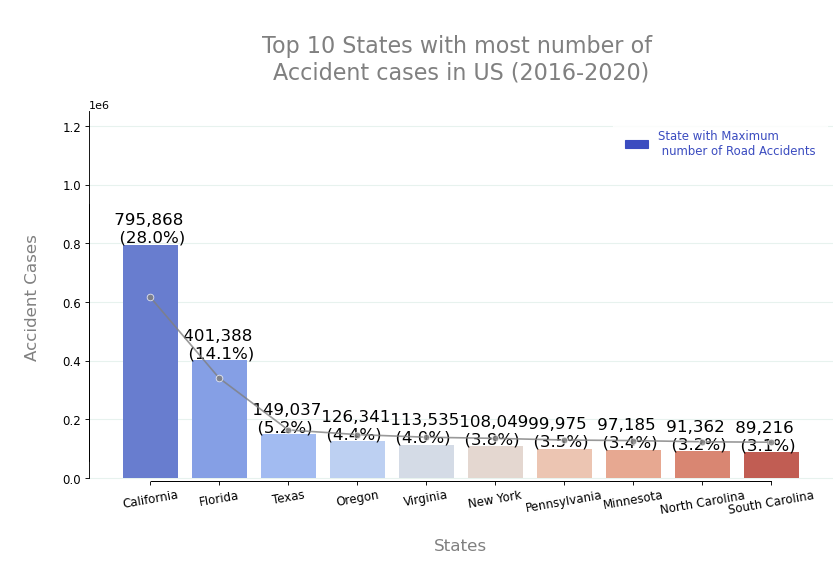

In [15]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = mpl.cm.get_cmap('coolwarm', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_acs['Cases'].head(10), x=state_acs['State'].head(10), palette='coolwarm')
ax1 = ax.twinx()
sns.lineplot(data = state_acs[:10], marker='o', x='State', y='Cases', color = 'grey', alpha = .8)


total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 1250000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most number of \nAccident cases in US (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 1250000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 1250000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpl.patches.Patch(color=clrs[0], label='State with Maximum\n number of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

#### Highest Cases of road accidents regarding States within US

1) California has the highest number of road accidents within the past 6 years, garnering 795,868 number of road accidents. 28% of the total accidents recorded is from California.

~ Within the past 6 years, there are 363 road accidents occuring daily within California

~ Approximately 15 accidents per hour road accidents occuring within California

2) Florida has the second highest number of road accidents within the past 6 years, garnering 401,388 number of road accidents. 14.1% of the total accidents recorded is from Florida.

~ Within the past 6 years there are 183 road accidents occuring daily within Florida

~ Approximately 7 accidents per hour road accidents occuring within Florida

3) Texas has the third highest number of road accidents within the past 6 years, garnering 149,037 number of road accidents. 5.2% of the total accidents recorded is from Texas.

~ Within the past 6 years there are 68 road accidents occuring daily within Texas

~ Approximately 2 accidents per hour road accidents occuring within Texas

# Time Attribute

### Analysis of the Accident Duration of Traffic Flow

In [16]:
acs['Start_Time'] = pd.to_datetime(acs['Start_Time'])
acs['End_Time'] = pd.to_datetime(acs['End_Time'])

In [17]:
acs['Year']=acs['Start_Time'].dt.year
acs['Month']=acs['Start_Time'].dt.strftime('%b')
acs['Day']=acs['Start_Time'].dt.day
acs['Hour']=acs['Start_Time'].dt.hour
acs['Weekday']=acs['Start_Time'].dt.strftime('%a')

In [18]:
td='Time_Duration(min)'
acs[td]=round((acs['End_Time']-acs['Start_Time'])/np.timedelta64(1,'m'))

In [19]:
accident_duration_df = pd.DataFrame(acs['End_Time'] - acs['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [20]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

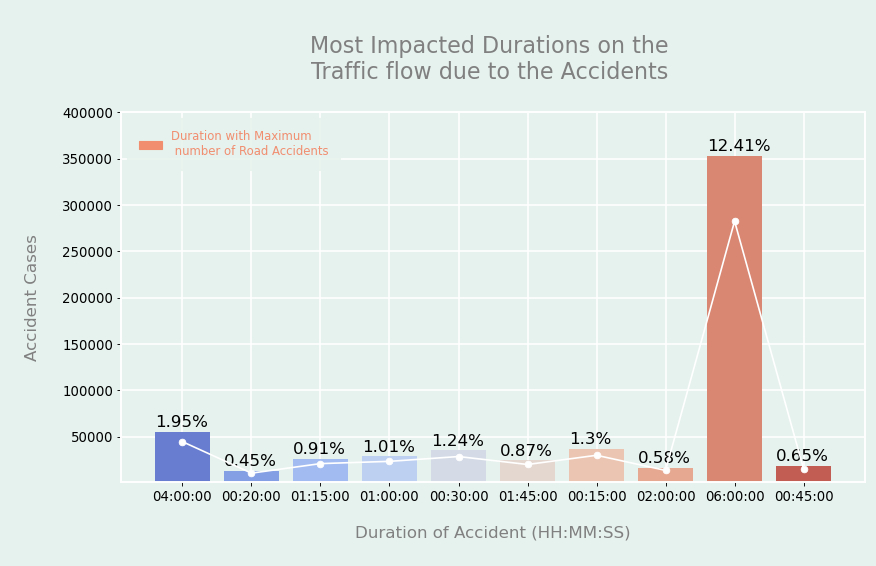

In [21]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = mpl.cm.get_cmap('coolwarm', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='coolwarm')
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'white', alpha = 1)

total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 400000))
ax1.set(ylim =(1000, 500000))

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpl.patches.Patch(color=clrs[-3], label='Duration with Maximum\n number of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-3], facecolor='#e6f2ed', edgecolor='#e6f2ed');

#### Highest case of accident duration

1) The highest duration which is 12.41% of the road accident recorded incurred traffic flow within the 6 hours period.

2) The second highest duration which is 1.9% of the road accident recorded incurred traffic flow within the 4 hours period.

### Mean of the Duration

Calculating duration time due to the difference between end time and start time in minutes and calculating the mean of the duration.

In [22]:
acs['Duration'] = acs.End_Time - acs.Start_Time 
acs['Duration'] = acs['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(acs['Duration'].mean(),3)), 'min')


The overall mean duration is:  359.038 min


#### The overall mean duration of the accident is 359.038 minutes which is equal to approximately 5.98 hours.

## Yearly Analysis

In [23]:
year_acs = pd.DataFrame(acs.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

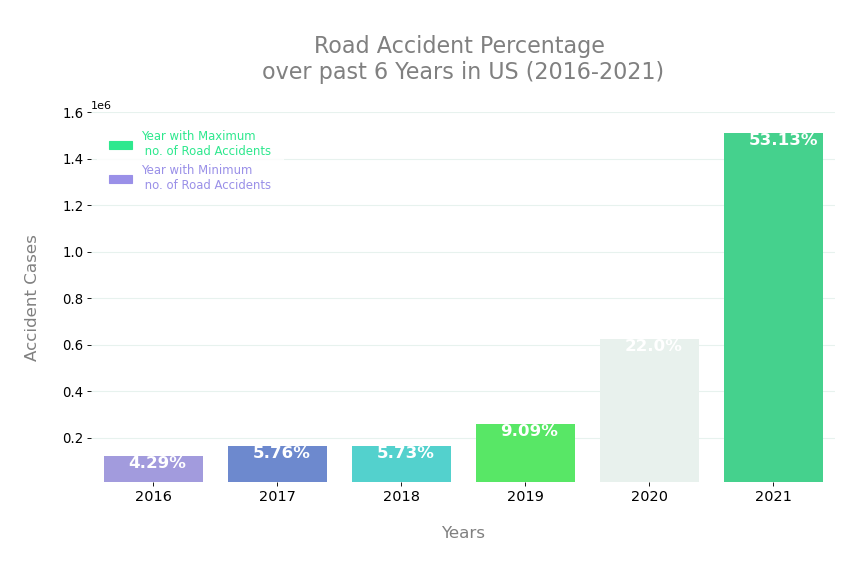

In [24]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_acs['Cases'], x=year_acs['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53', '#e6f2ed', '#2ee88e'])

total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(10000, 1600000)
plt.title('\nRoad Accident Percentage \nover past 6 Years in US (2016-2021)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    

for k in ['top', 'right', "bottom", 'left']:
        side = ax.spines[k]
        side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)
MA = mpl.patches.Patch(color='#2ee88e', label='Year with Maximum\n no. of Road Accidents')
MI = mpl.patches.Patch(color='#9a90e8', label='Year with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=['#2ee88e', '#9a90e8'], edgecolor='white');
plt.show()

#### Highest cases of yearly road accidents

It is evident that the accidents has increased significantly between 2019 to 2021. The year of 2020 and 2021, the road accidents occured has substantially increased in comparison to the years of 2016, 2017, 2018 and 2019.

1) Between the year of 2020 and 2021, 75.13% of the total road accident occured during those 2 years were recorded within the past 6 years.

2) In the year of 2021 alone more than 50% (53.13%) of the road accidents were recorded. 

3) 22% of the road accidents were recorded in the year of 2020.

### Analysis of the Yearly Road Accident based on Severity

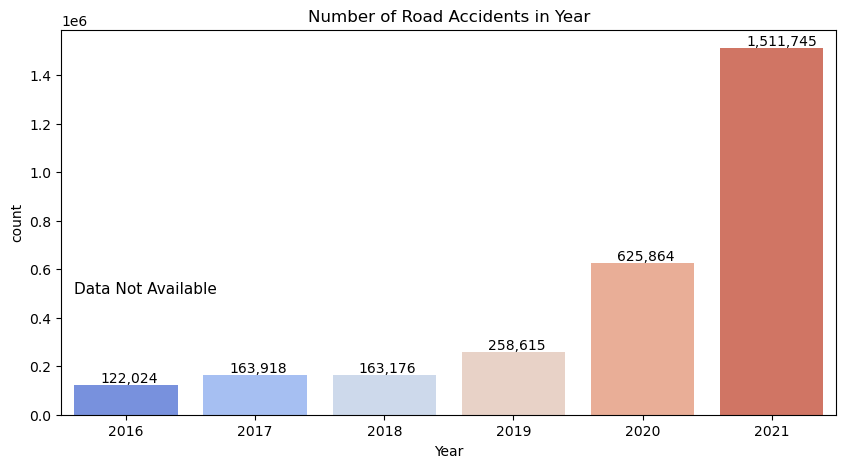

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=acs, orient = 'v', palette = "coolwarm")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("Number of Road Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

#### Yearly road accident based on Severity

#### Total of 6,082,122 cases of road accidents occurring within US.

1) In the year of 2021 1,511,745 road accidents occurred.

2) In the year of 2020 625,864 road accidents occured.

## Monthly Analysis

### Analysis of Monthly Road Accident

In [26]:
year_acs = pd.DataFrame(acs.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

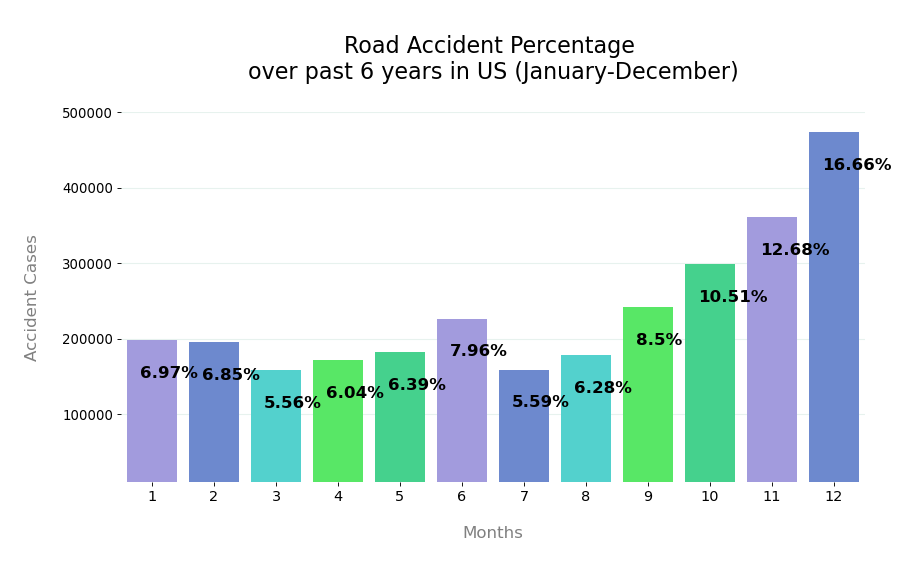

In [27]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)


ax = sns.barplot(y = year_acs['Cases'], x = year_acs['Month'], palette = ['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='black')

plt.ylim(10000, 500000)
plt.title('\nRoad Accident Percentage \nover past 6 years in US (January-December)\n', size=20, color='black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nMonths\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    

for k in ['top', 'right', "bottom", 'left']:
        side = ax.spines[k]
        side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)

plt.show()

#### Analysis of the monthly accidents

#### It is evident that the accidents has increased significantly during the winter months. The road accidents occured has substantially increased in comparison to the year.

1) Between the year of 2020 and 2021, 75.13% of the total road accident occured during those 2 years were recorded within the past 6 years.

2) In the year of 2021 alone more than 50% (53.13%) of the road accidents were recorded. 

3) 22% of the road accidents were recorded in the year of 2020.

## Daily Analysis

### Analysis of the Daily Road Accident

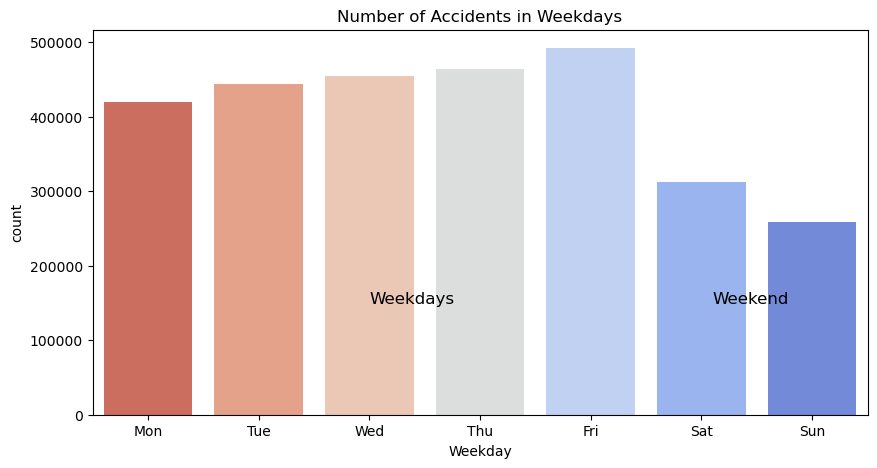

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data = acs, orient = 'v', palette = "coolwarm_r")
plt.annotate('Weekdays',xy=(2,150000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,150000), fontsize=12)
c.set_title("Number of Accidents in Weekdays")
plt.show()

In [29]:
day_acs = pd.DataFrame(acs.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

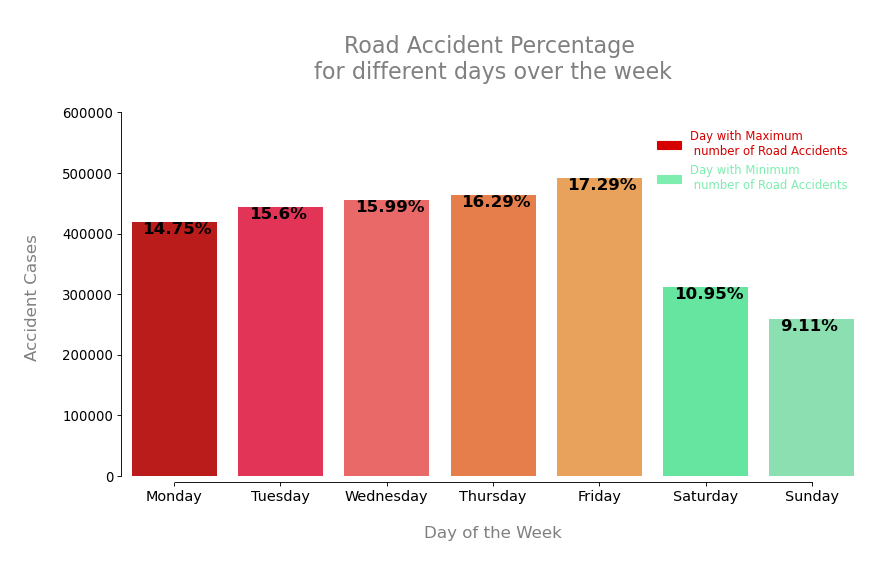

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert Day column to categorical variable with day_order as the ordering
day_acs['Day'] = pd.Categorical(day_acs['Day'], categories=day_order, ordered=True)

# Create plot
fig, ax = plt.subplots(figsize=(12,6), dpi=80)
sns.barplot(y=day_acs['Cases'], x=day_acs['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='black')

plt.ylim(-10000, 600000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 600000)

MA = mpl.patches.Patch(color='#D50000', label='Day with Maximum\n number of Road Accidents')
MI = mpl.patches.Patch(color='#7eedb0', label='Day with Minimum\n number of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);

plt.show()


#### Analysis of the Daily Road Accident

1) From Monday to Friday, There are more accidents occuring within the weekdays in comparison to the weekends

## Hourly Analysis

### Analysis of the Hourly Road Accident

In [31]:
hour_acs = pd.DataFrame(acs.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

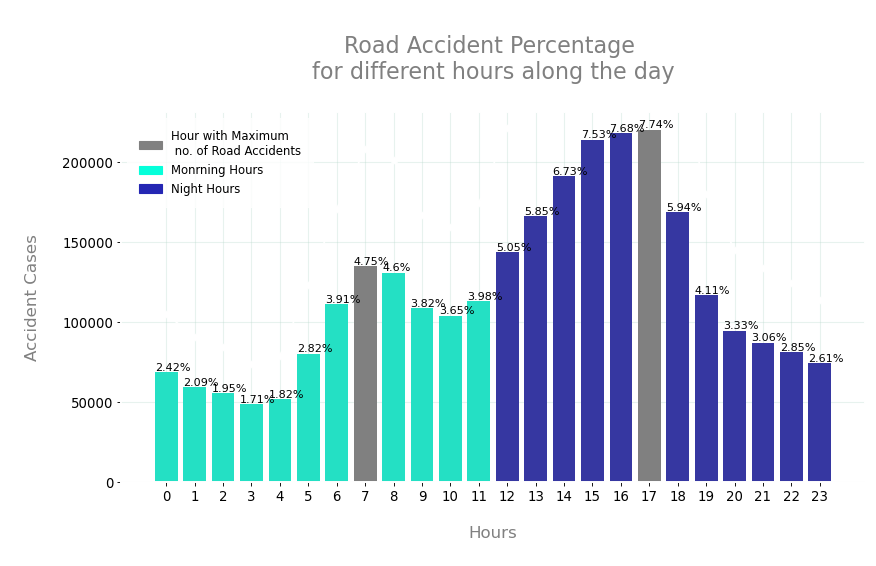

In [32]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_acs['Cases']:
    if int(hour_acs[hour_acs['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_acs['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_acs['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_acs['Cases'], x=hour_acs['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_acs, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = acs.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpl.patches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpl.patches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpl.patches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');


#### Analysis of the Hourly Road Accidents

1) The time of 17:00 has concurred the highest record of road accident, garnering a total of 7.74%.

2) The time of 7:00 has concurred the second highest of record accident, garnering a total of 4.75%.

### Additional Information of Hourly Analysis of Road Accident

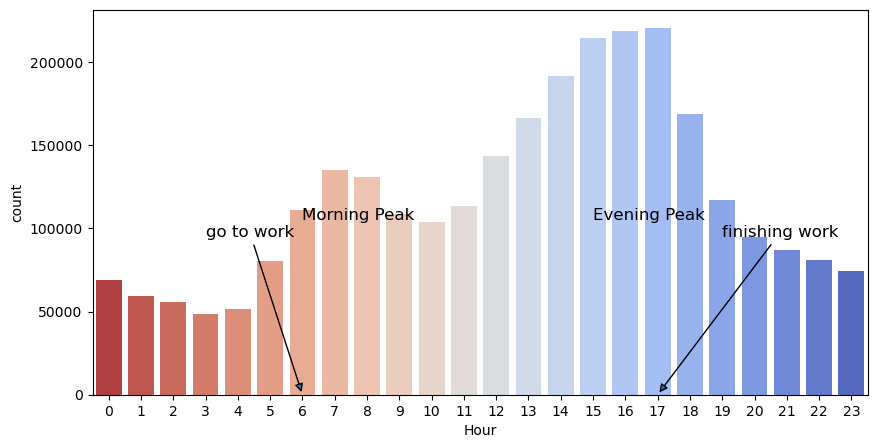

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data = acs, orient = 'v', palette = "coolwarm_r")
plt.annotate('Morning Peak',xy=(6,105000), fontsize=12)
plt.annotate('Evening Peak',xy=(15,105000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,95000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('finishing work',xy=(17,0),xytext=(19,95000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

#### Hourly Analysis of Road Accident

1) The highest record of road accident hourly correlates in regard to people finishing work

2) The second highest record of road accident hourly correlates in regard to people going to work

C:\Users\User\AppData\Local\Temp\ipykernel_22652\4113861591.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


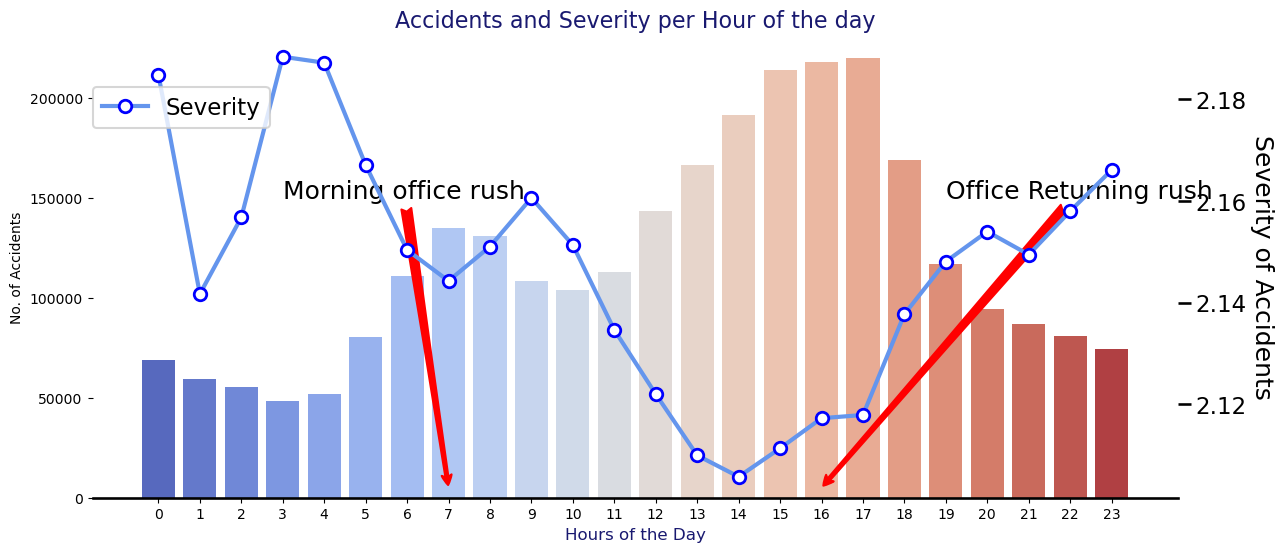

In [34]:
hour_severity = acs[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('talk')

f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='coolwarm')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)

ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,150000) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,150000),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

# Weather Attribute

## Analysis of the Weather Conditions

In [35]:
conditions_acs = pd.DataFrame(acs.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

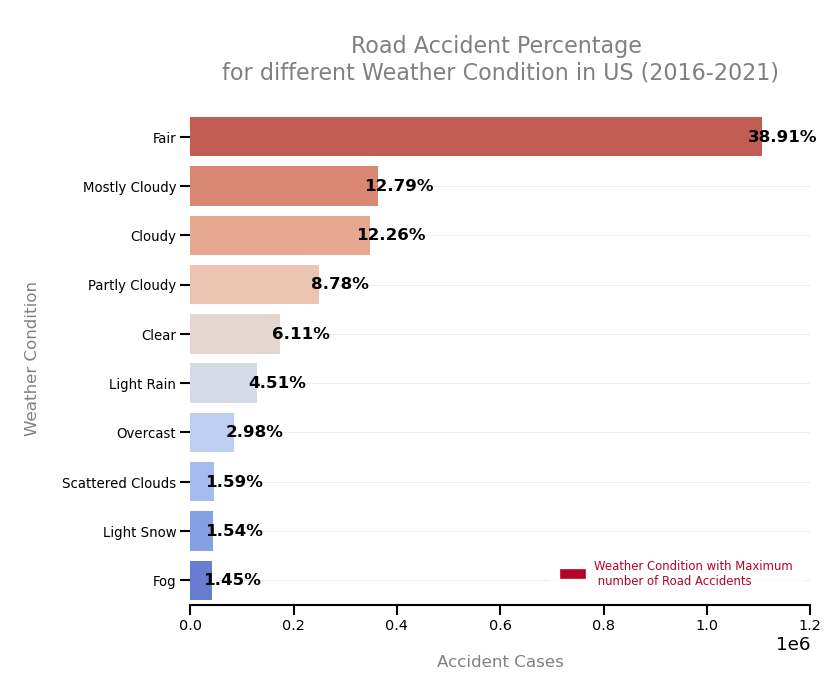

In [36]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = mpl.cm.get_cmap('coolwarm_r', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x = conditions_acs['Cases'], y = conditions_acs['Weather_Condition'], palette='coolwarm_r')

total = acs.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+40000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 1200000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 1200000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpl.patches.Patch(color=clrs[0], label='Weather Condition with Maximum\n number of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0]], edgecolor='white');

#### Analysis of the Weather Conditions

1) Fair attained the highest case in the duration of the accident, garnering at 38.91%

2) Mostly Cloudy attained the second highest case in the duration of the accident, garnering at 12.79%

3) Cloudy attained the third highest case in the duration of the accident, garnering at 12.26% (similar to Mostly Cloudy)

### Most Frequent Conditions by Severity

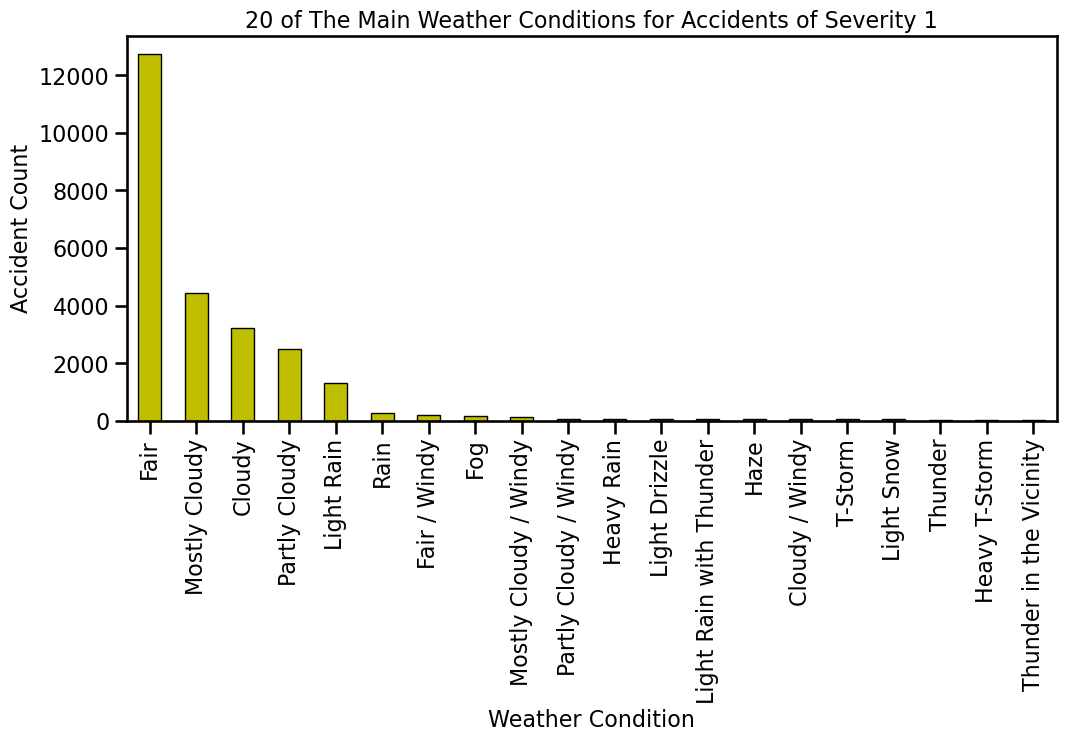

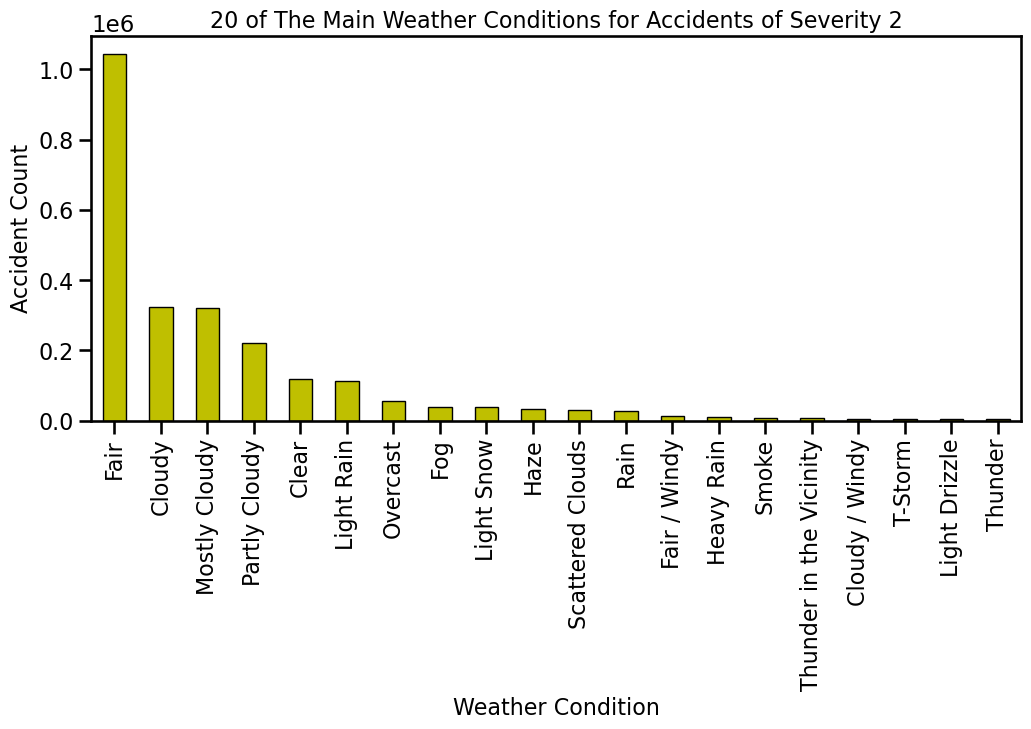

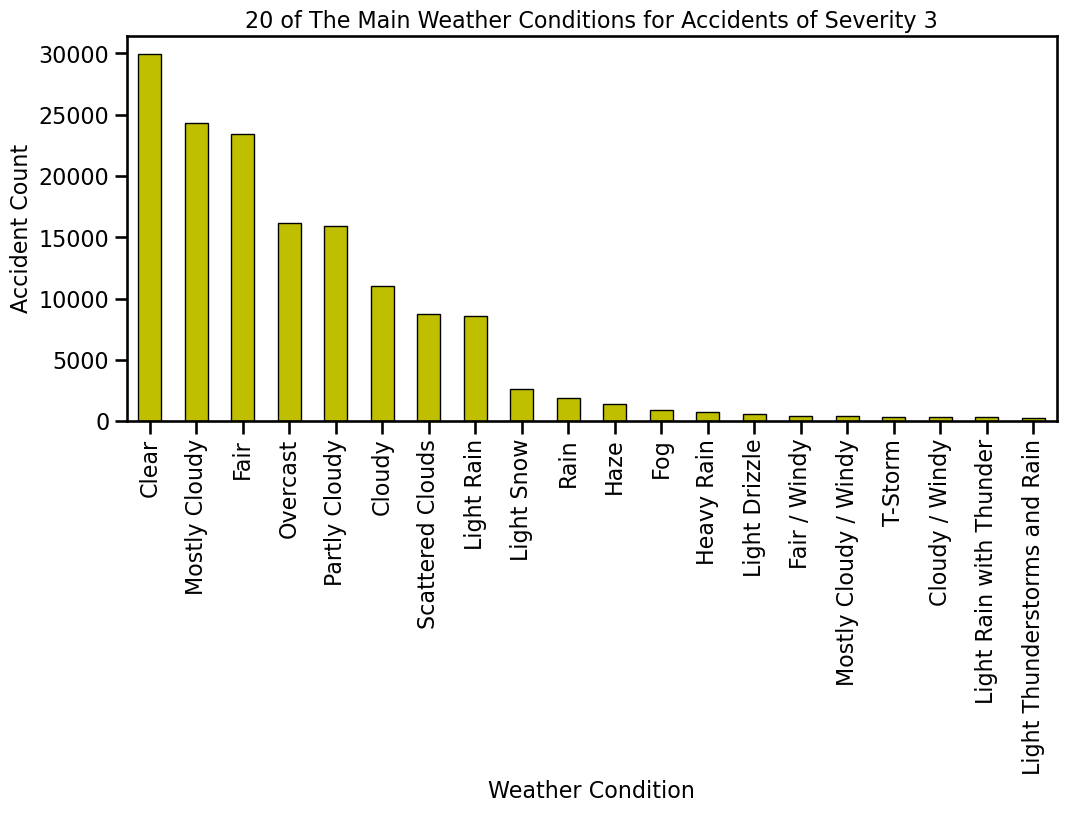

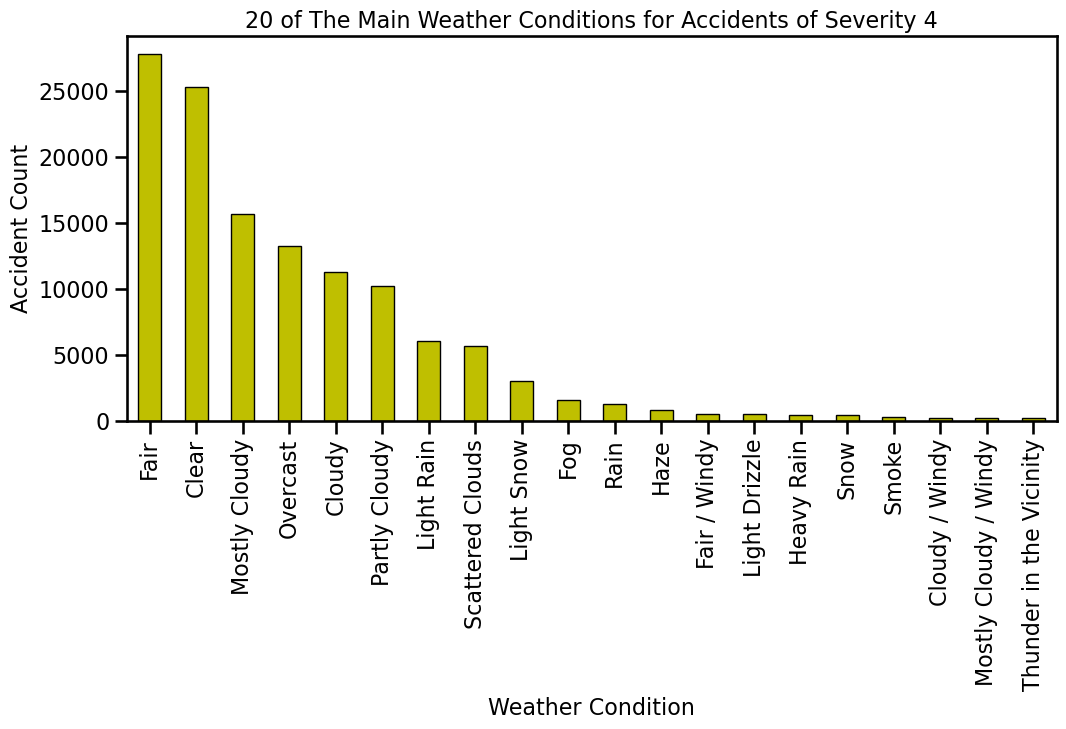

In [37]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    acs.loc[acs["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

### Weather Conditions by Severity

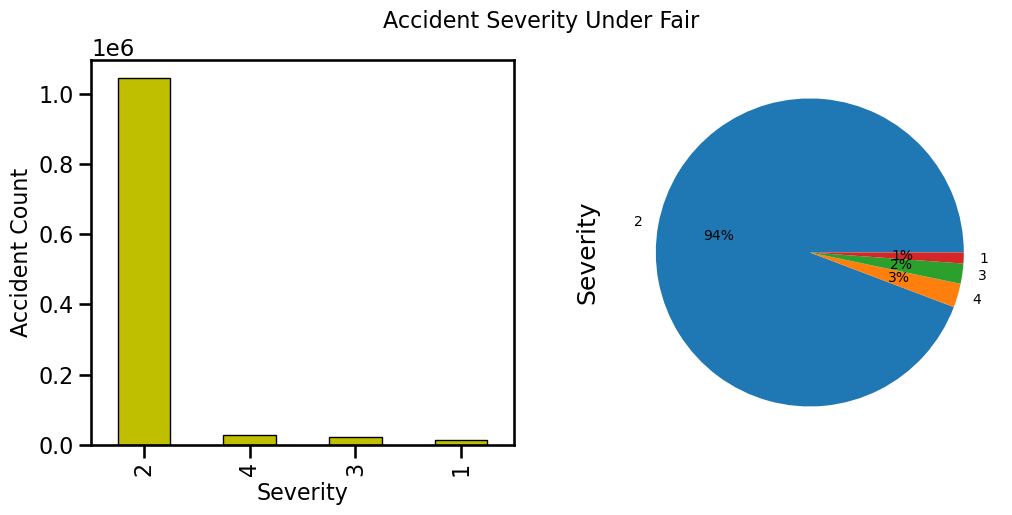

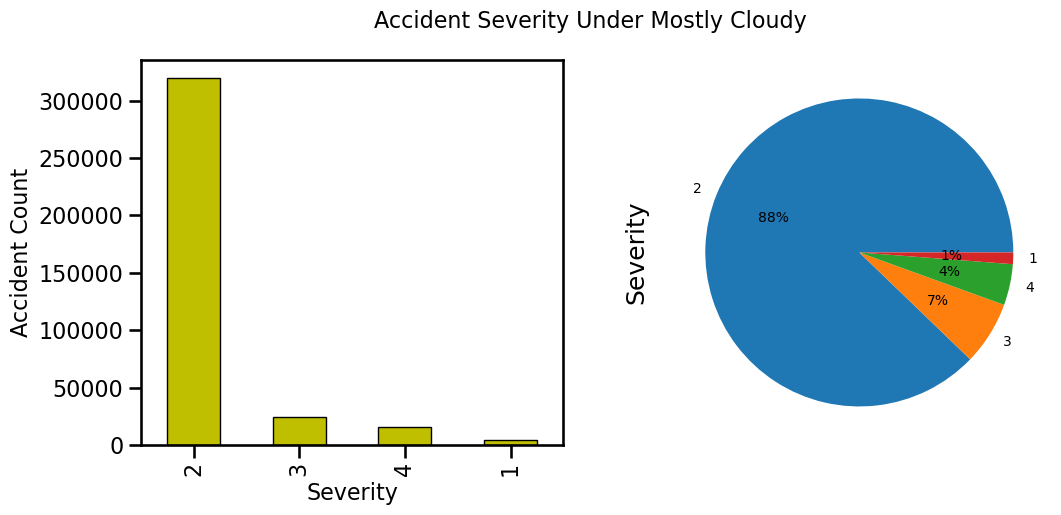

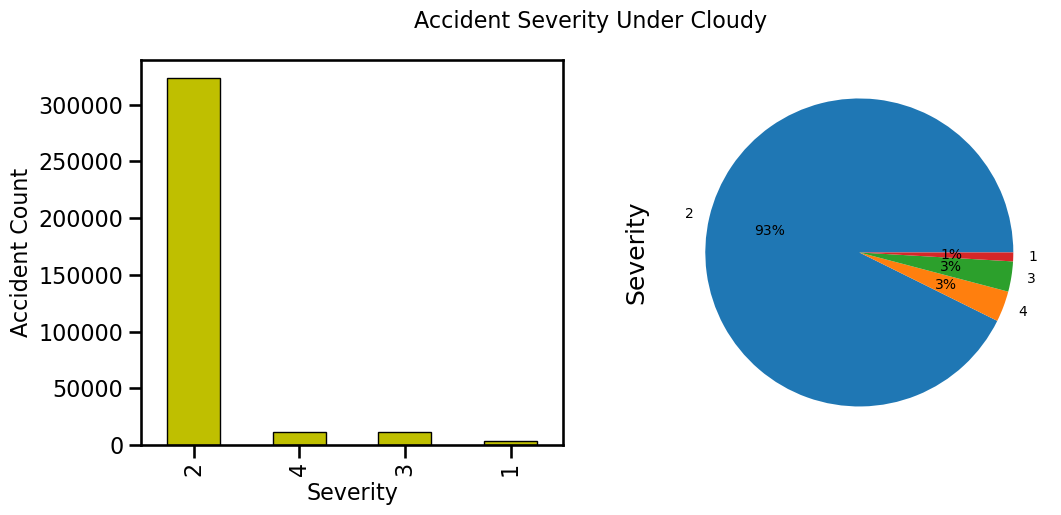

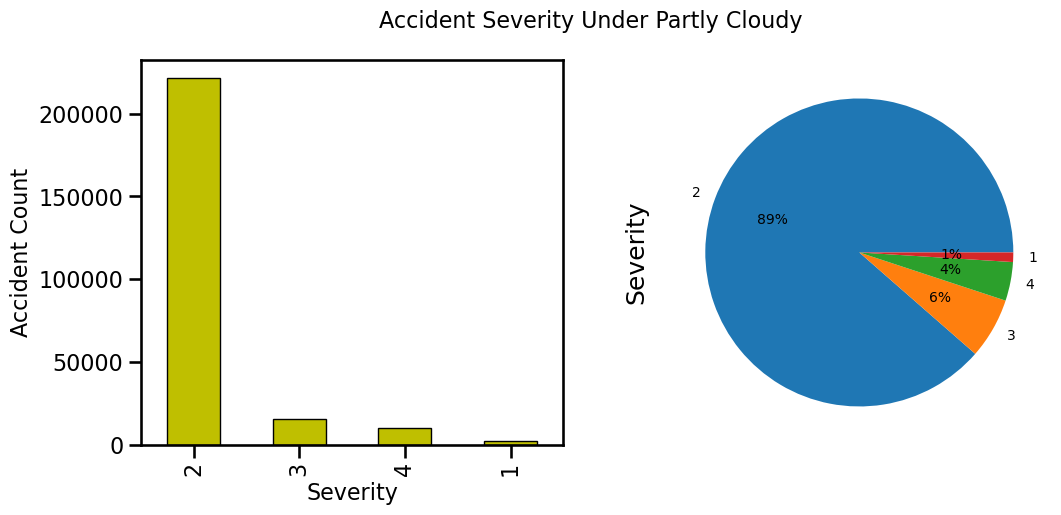

In [38]:
for s in ["Fair","Mostly Cloudy","Cloudy","Partly Cloudy"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    acs.loc[acs["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    acs.loc[acs["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%', fontsize=10)

### Top 5 Weather Conditions

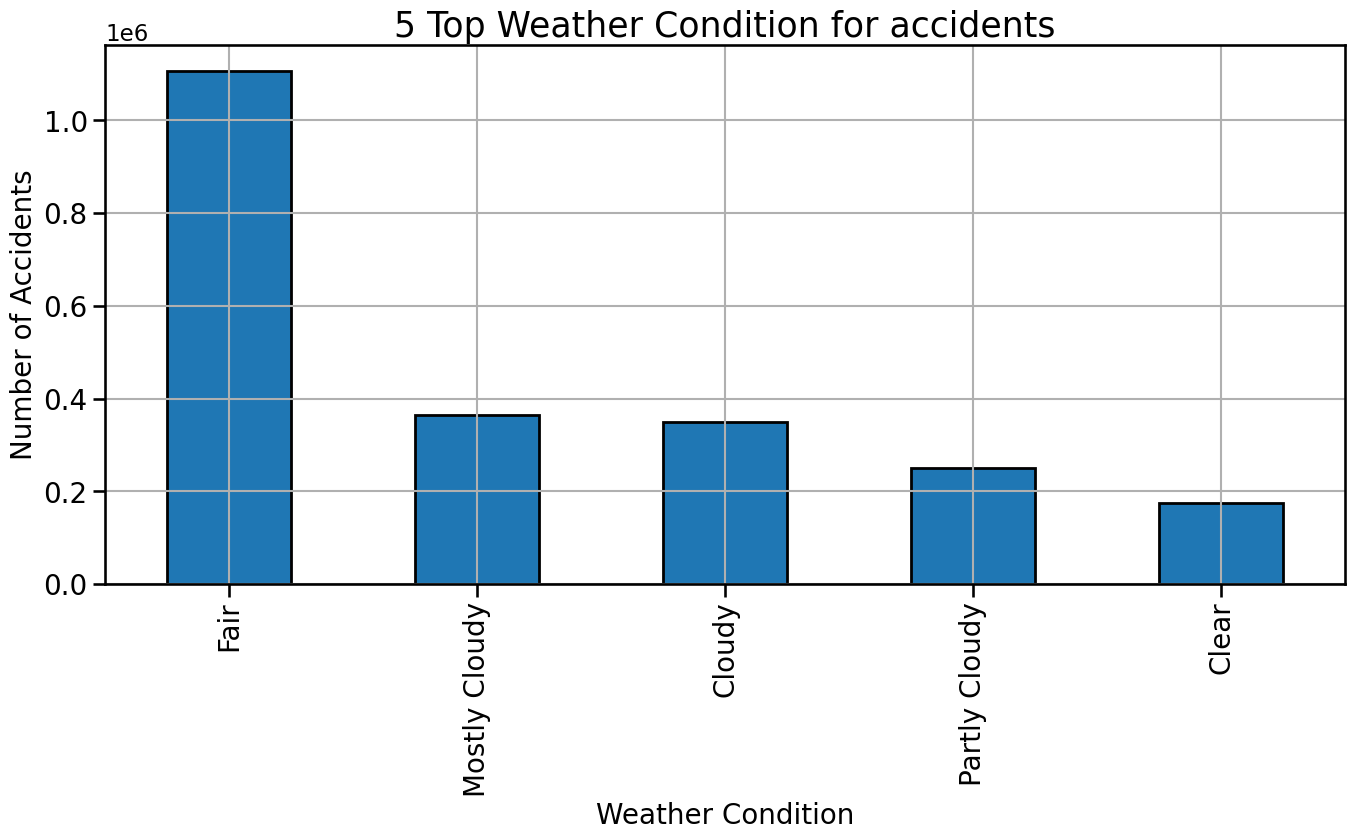

In [39]:
fig, ax=plt.subplots(figsize=(16,7))
acs['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

### Additional Information of Weather Conditions

### Analysis of the Temperature

In [40]:
def weather_int_labels(attribute, split, gap):
    var_min = min(acs[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):
        
        lower_limit = int(var_min+((i-1)*gap))
        
        if i==split:
            upper_limit = int(max(acs[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))
            
        #intervals
        intervals.append(upper_limit)
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [41]:
def Feature_Plot(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_acs = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_acs[xlabel] = pd.cut(x = new_acs[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_acs = pd.DataFrame(new_acs[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    
    count,max_index = 0, 0
    cases_list = list(temp_acs['Cases'])
    for i in cases_list:
        if i == max(temp_acs['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_acs[xlabel])
    plt.figure(figsize=fig_size)
    
    cmap = mpl.cm.get_cmap(clrs, len(intervals))   
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    
    ax=sns.barplot(y=temp_acs['Cases'], x=temp_acs['Bins'], palette=clrs);
    
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
        
    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpl.patches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
              labelcolor=[clrs[max_index]], edgecolor='white');
    
    plt.show()

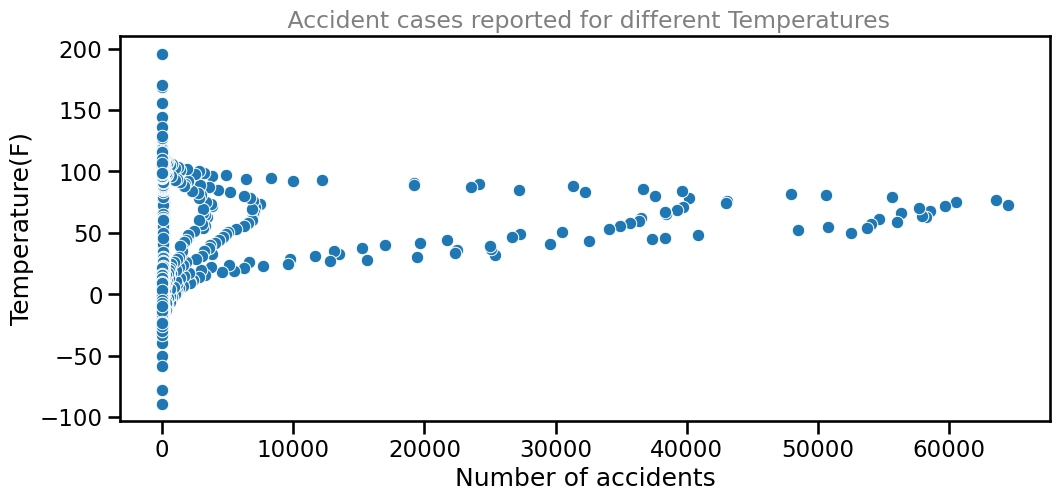

In [42]:
weather_condition = acs["Temperature(F)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Temperatures",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot( y = weather_condition.index, x = weather_condition)
plt.show()

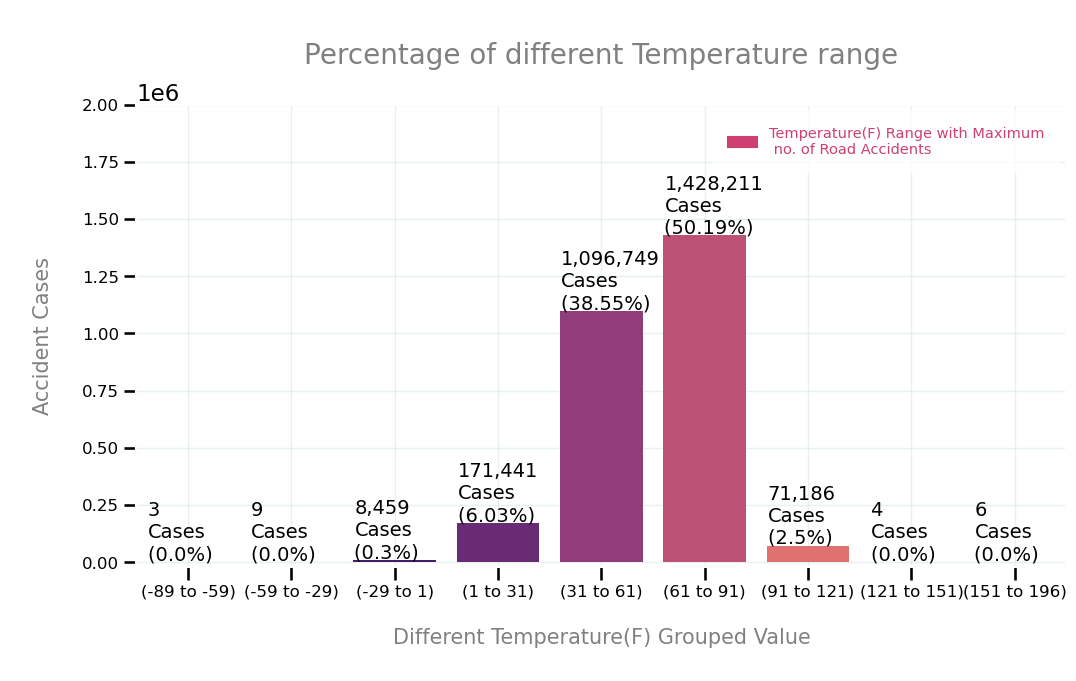

In [43]:
temp_intervals, temp_labels = weather_int_labels('Temperature(F)', 9, 30)

Feature_Plot(acs, 'Temperature(F)', 'magma',temp_intervals, temp_labels, 
                 (12, 6), 14, (-20000, 2000000), [0.01, 10000], '\nPercentage of different Temperature range\n')

#### Analysis of Temperature range

1) 61 to 91 farehnheit has procured the highest cases of road accident, garnering at 50.19% and 1,428,211 cases

2) 31 to 61  farehnheit has procured the second highest cases of road accident, garnering at 38.55% and 1,098,749 cases

### Analysis of the Humidity

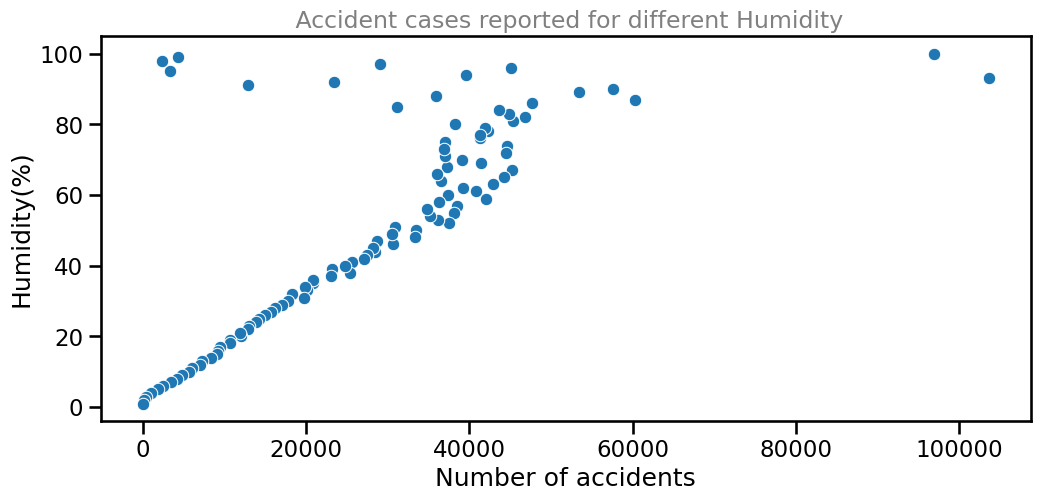

In [44]:
weather_condition1 = acs["Humidity(%)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Humidity",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Humidity(%)')
sns.scatterplot( y = weather_condition1.index, x = weather_condition1)
plt.show()

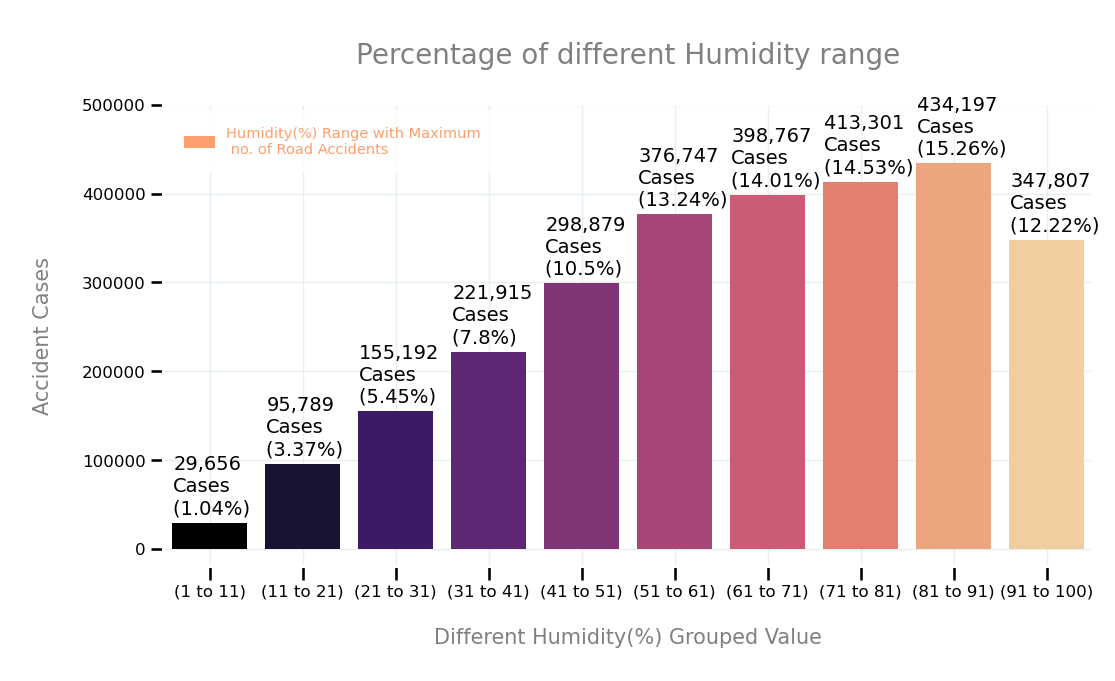

In [45]:
Humidity_intervals, Humidity_labels = weather_int_labels('Humidity(%)', 10, 10)

Feature_Plot(acs, 'Humidity(%)', 'magma', Humidity_intervals, Humidity_labels, 
                 (12, 6), 14, (-20000, 500000), [0.01, 10000], '\nPercentage of different Humidity range\n')

#### Analysis of the Humidity

1) 81% to 91% of humidity has procured the highest cases of road accident, garnering at 15.26% and 434,197 cases

2) 71% to 81% humidity has procured the second highest cases of road accident, garnering at 14.53% and 413,301 cases

### Analysis of the Air Pressure

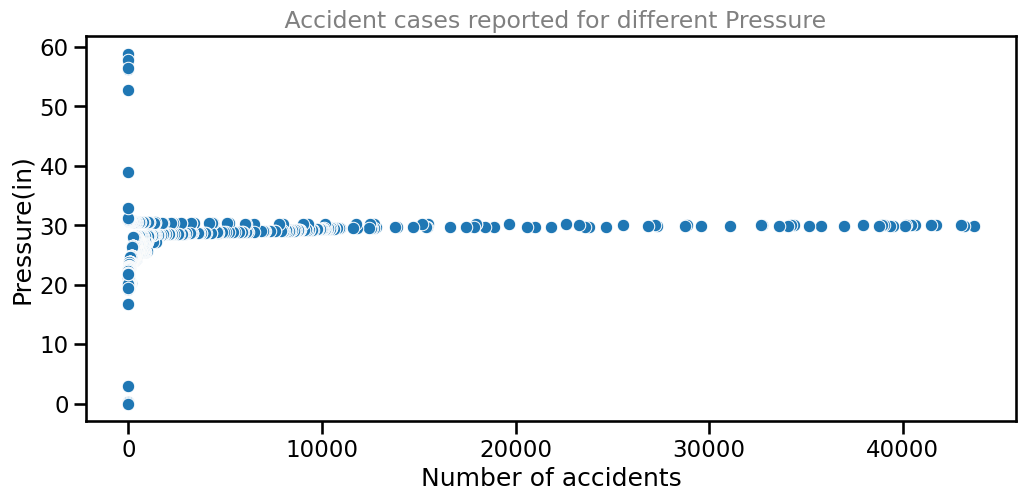

In [46]:
weather_condition2 = acs["Pressure(in)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Pressure",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot( y = weather_condition2.index, x = weather_condition2)
plt.show()

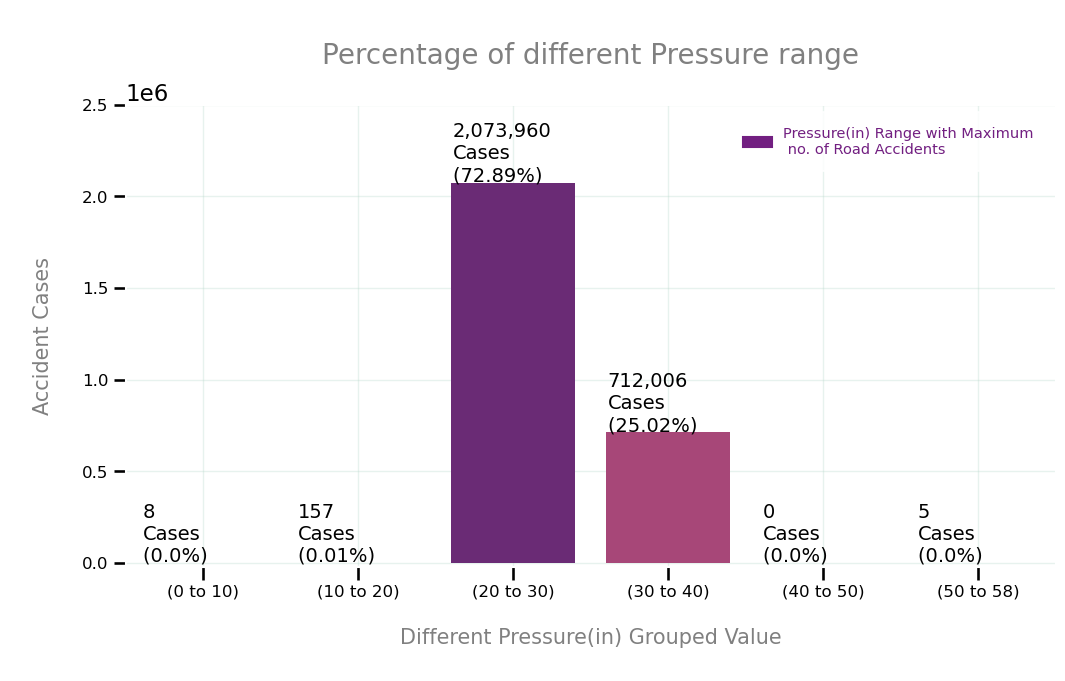

In [47]:
Pressure_intervals, Pressure_labels = weather_int_labels('Pressure(in)', 6, 10)

Feature_Plot(acs, 'Pressure(in)', 'magma', Pressure_intervals, Pressure_labels, 
                 (12, 6), 14, (-20000, 2500000), [0.01, 10000], '\nPercentage of different Pressure range\n')

#### Analysis of the Pressure(in)

1) Pressures between 20 to 30 (in) has procured the highest cases of road accident, garnering at 72.89% and 2,0734,960 cases

2) Pressures between 30 to 40 (in) has procured the highest cases of road accident, garnering at 25.02% and 712,006 cases

### Analysis of the Wind Speed

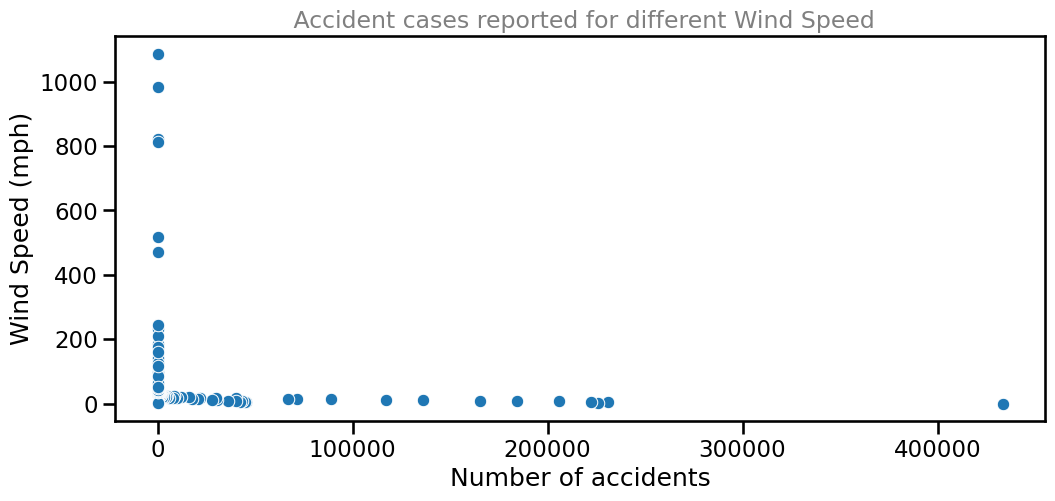

In [48]:
weather_condition3 = acs["Wind_Speed(mph)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Wind Speed",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Wind Speed (mph)')
sns.scatterplot( y = weather_condition3.index, x = weather_condition3)
plt.show()

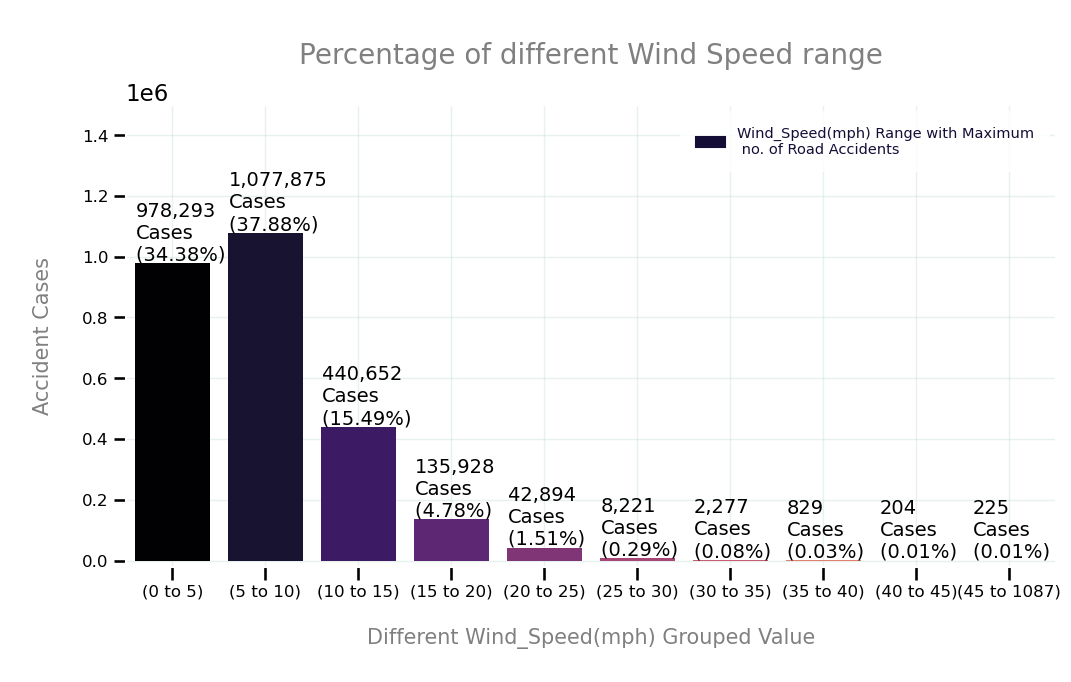

In [49]:
Wind_Speed_intervals, Wind_Speed_labels = weather_int_labels('Wind_Speed(mph)', 10, 5)

Feature_Plot(acs, 'Wind_Speed(mph)', 'magma',Wind_Speed_intervals, Wind_Speed_labels, 
                 (12, 6), 14, (-20000, 1500000), [0.01, 10000], '\nPercentage of different Wind Speed range\n')

#### Analysis of the Wind Speed

1) Wind speed between 5 to 10 (mph) has procured the highest cases of road accident, garnering at 37.88% and 1,077,875 cases

2) Wind speed between 0 to 5 (mph) has procured the highest cases of road accident, garnering at 34.38% and 978,293 cases

### Analysis of the Wind Chill 

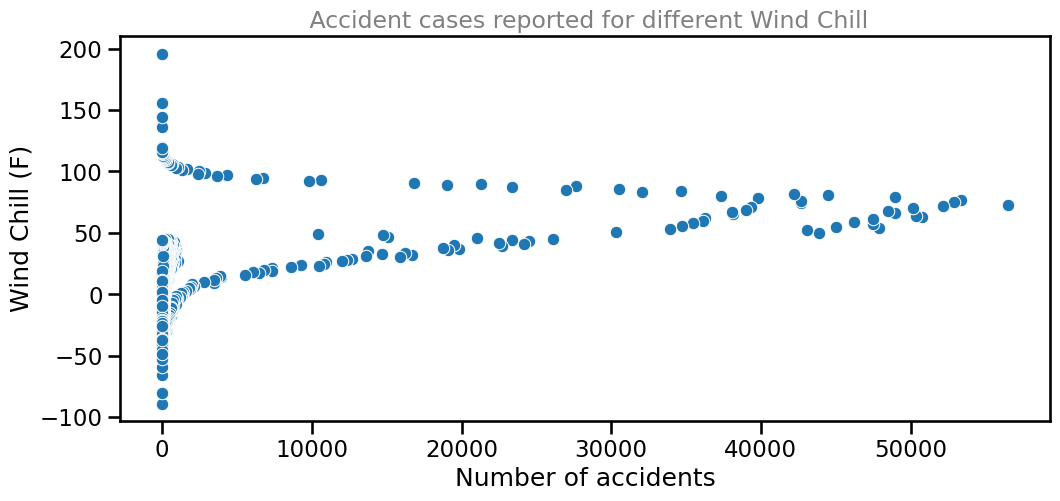

In [50]:
weather_condition4 = acs["Wind_Chill(F)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Wind Chill",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Wind Chill (F)')
sns.scatterplot( y = weather_condition4.index, x = weather_condition4)
plt.show()

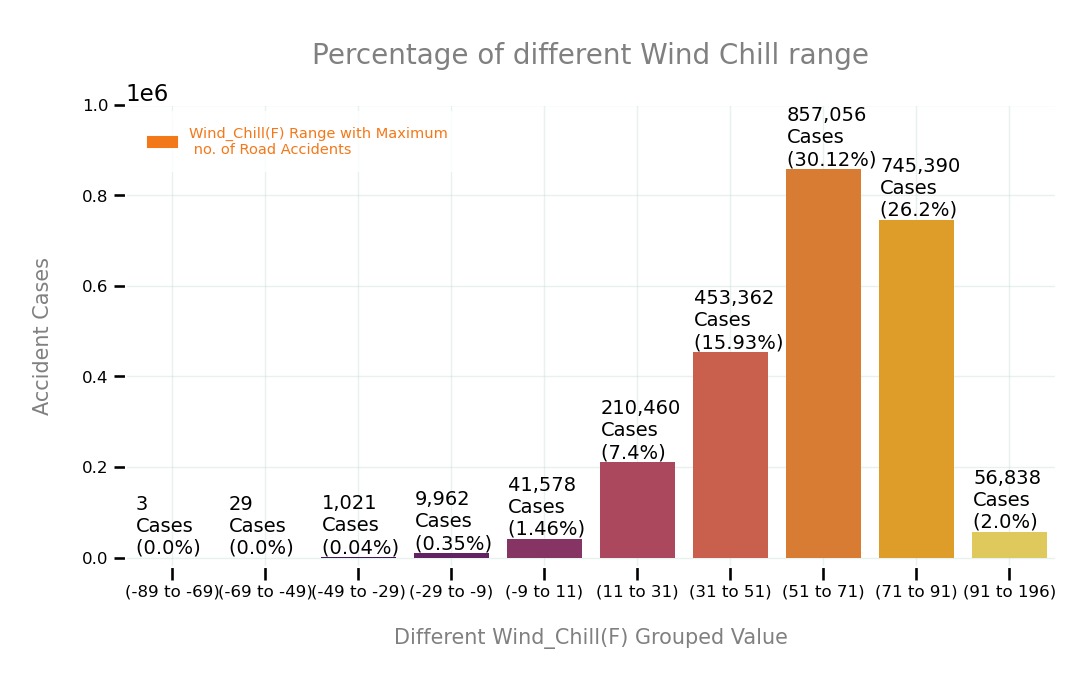

In [51]:
Wind_Chill_intervals, Wind_Chill_labels = weather_int_labels('Wind_Chill(F)', 10, 20)

Feature_Plot(acs, 'Wind_Chill(F)', 'inferno', Wind_Chill_intervals, Wind_Chill_labels, 
                 (12, 6), 14, (-20000, 1000000), [0.01, 10000], '\nPercentage of different Wind Chill range\n')

#### Analysis of the Wind Chill

1) Wind chill between 51 to 71 (F) has procured the highest cases of road accident, garnering at 30.12% and 857,056 cases

2) Wind chill between 71 to 91 (F) has procured the highest cases of road accident, garnering at 26.20% and 743,390 cases

### Analysis of the Visibility

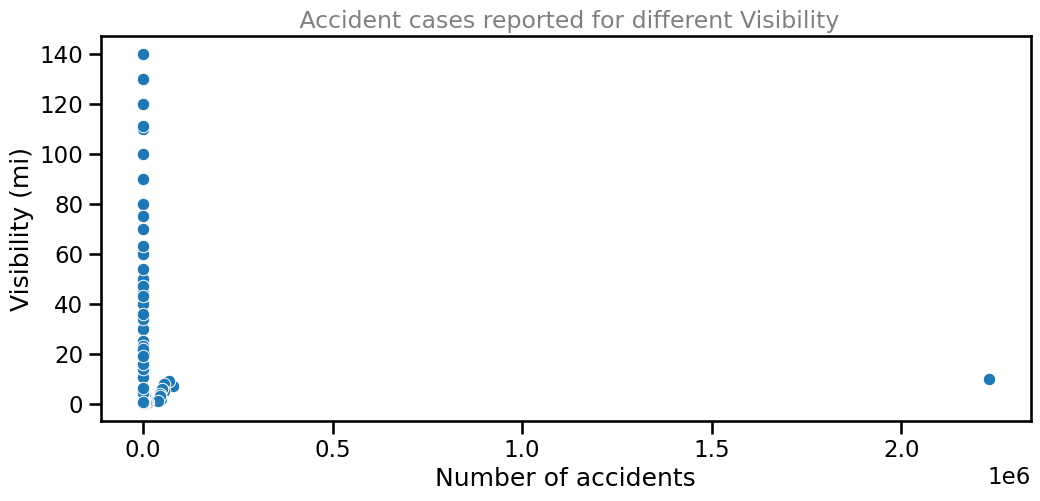

In [52]:
weather_condition5 = acs["Visibility(mi)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Visibility",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Visibility (mi)')
sns.scatterplot( y = weather_condition5.index, x = weather_condition5)
plt.show()

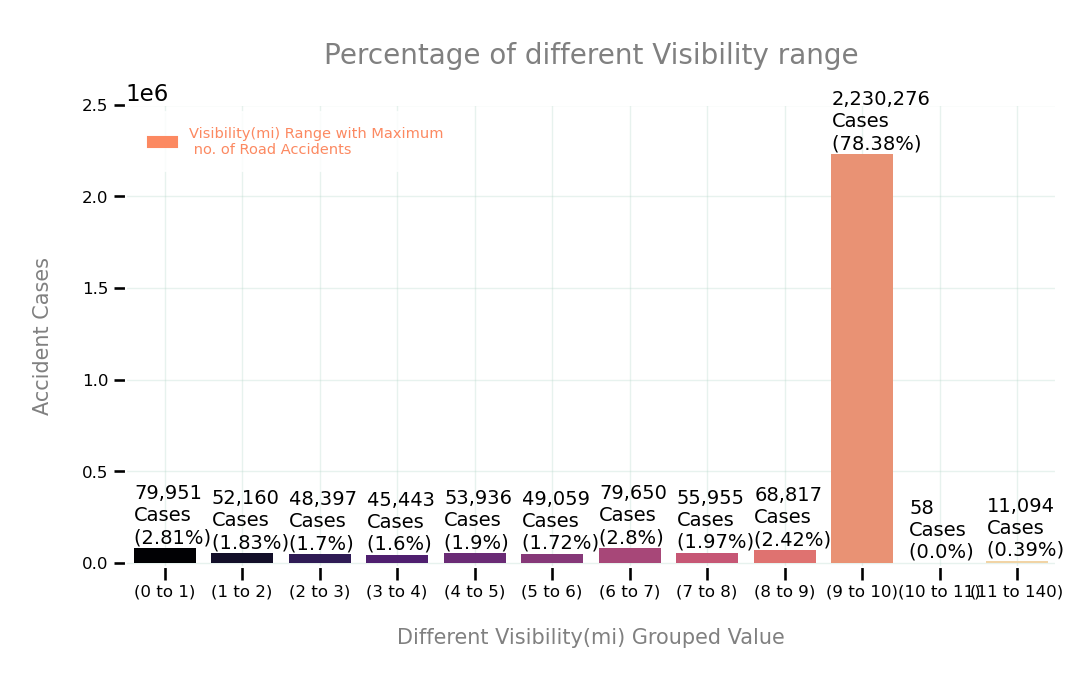

In [53]:
Visibility_intervals, Visibility_labels = weather_int_labels('Visibility(mi)', 12, 1)

Feature_Plot(acs, 'Visibility(mi)', 'magma', Visibility_intervals, Visibility_labels, 
                 (12, 6), 14, (-20000, 2500000), [0.01, 30000], '\nPercentage of different Visibility range\n')

#### Analysis of the Visibility

1) Visbility between 9 to 10 (mi) has procured the highest cases of road accident, garnering at 78.38% and 2,230,276 cases


### Analysis of the Percipitation (in)

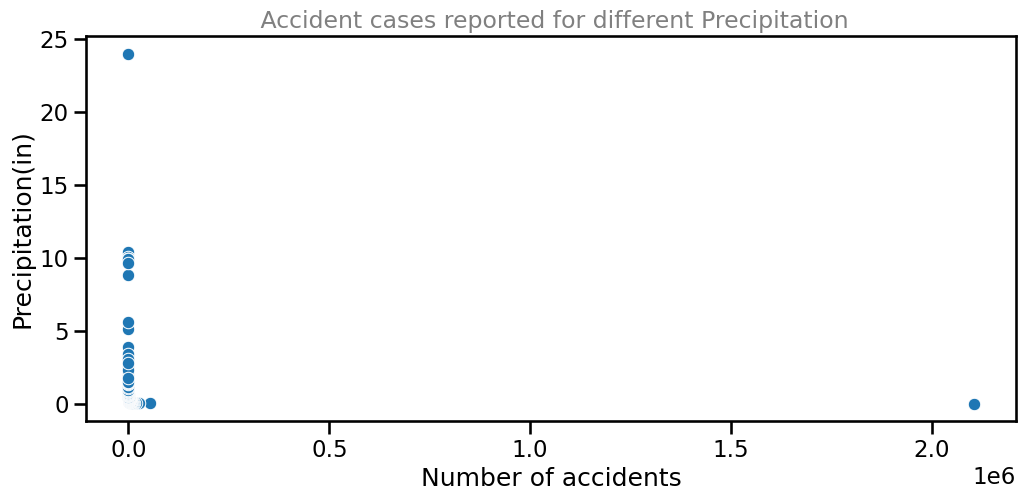

In [54]:
weather_condition6 = acs["Precipitation(in)"].value_counts()

plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Precipitation",size=17,color="grey")
plt.xlabel('Number of accidents')
plt.ylabel('Precipitation(in)')
sns.scatterplot( y = weather_condition6.index, x = weather_condition6)
plt.show()

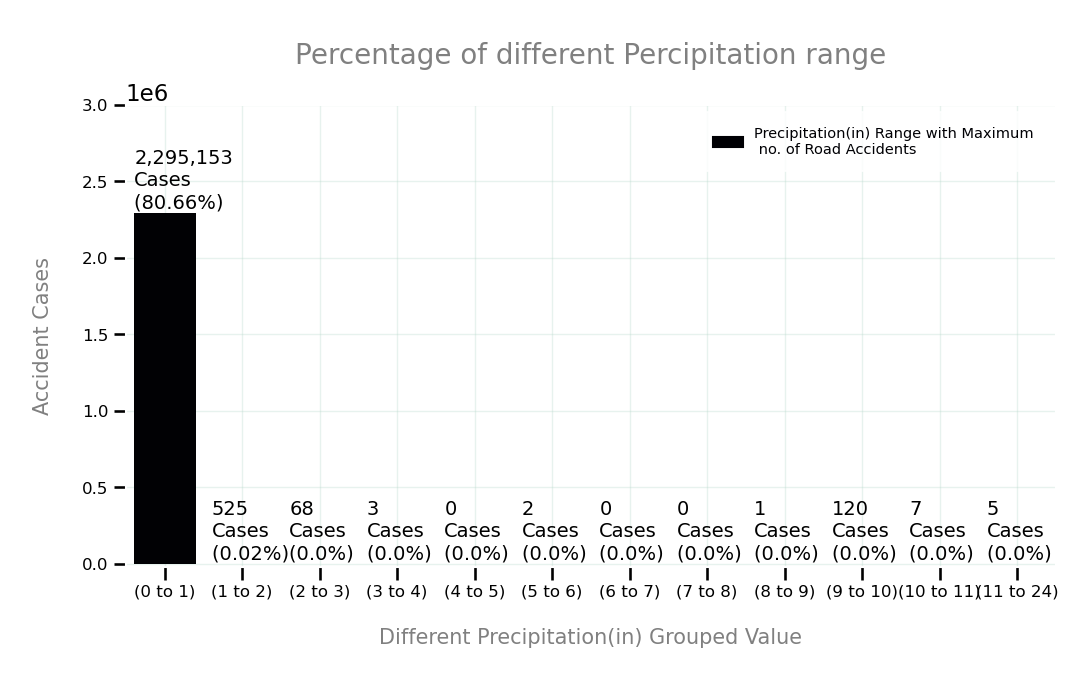

In [55]:
Precipitation_intervals, Precipitation_labels = weather_int_labels ('Precipitation(in)', 12, 1)

Feature_Plot(acs, 'Precipitation(in)', 'magma', Precipitation_intervals, Precipitation_labels, 
                 (12, 6), 14, (-20000, 3000000), [0.01, 30000], '\nPercentage of different Percipitation range\n')

#### Analysis of the Precipitation

1) Precipitation between 9 to 10 (in) has procured the highest cases of road accident, garnering at 80.66% and 2,295,153 cases


# POI Attribute

## Severity

In [56]:
severity_2_mean = acs[acs['Severity'] == 2][['Severity','Year']].groupby('Year').count().mean()
severity_2_mean[0]

422165.1666666667

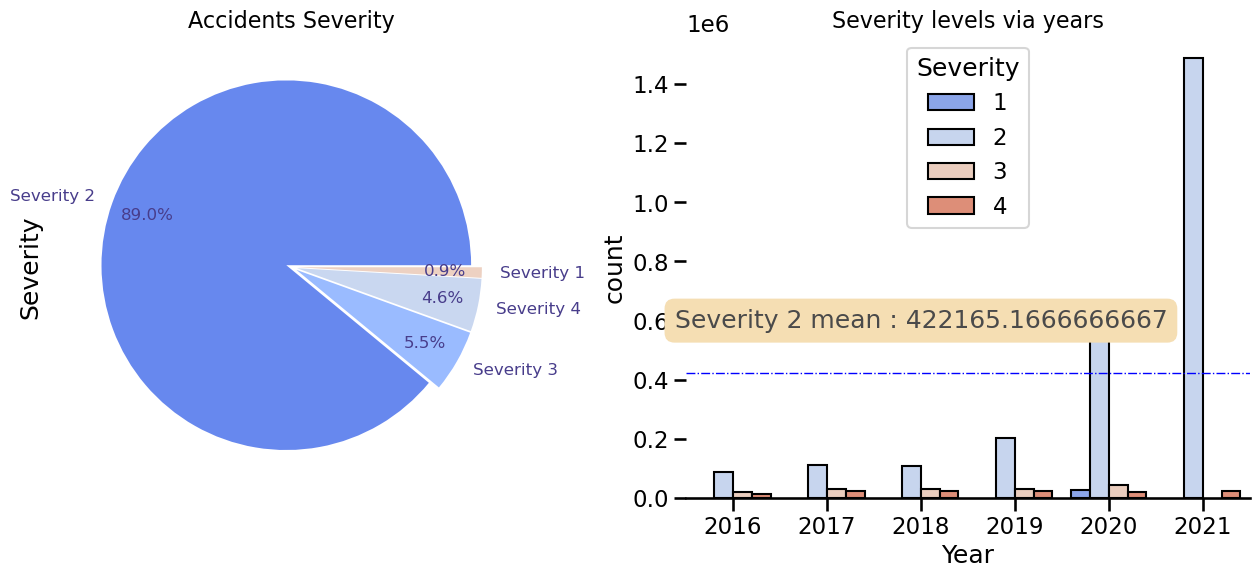

In [57]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

acs['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='coolwarm') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'Black'} )


s = sns.countplot(data=acs[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'coolwarm' 
                  , edgecolor='black')
ax2.axhline(severity_2_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 2 mean : {severity_2_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(2,600000))

ax2.set_title("Severity levels via years", fontdict = {'fontsize':16 , 'color':'Black'} )

sns.despine(left=True)

plt.show()


#### Analysis of Severity

#### The Severity 2 mean is 422, 165

1) Severity 2 acquired 89.0% distrubution of the road accident

2) Severity 3 acquired 5.5% distrubution of the road accident

3) Severity 4 acquired 4.6% distrubution of the road accident

4) Severity 1 acquired 0.9% distrubution of the road accident

### Degree of Severity

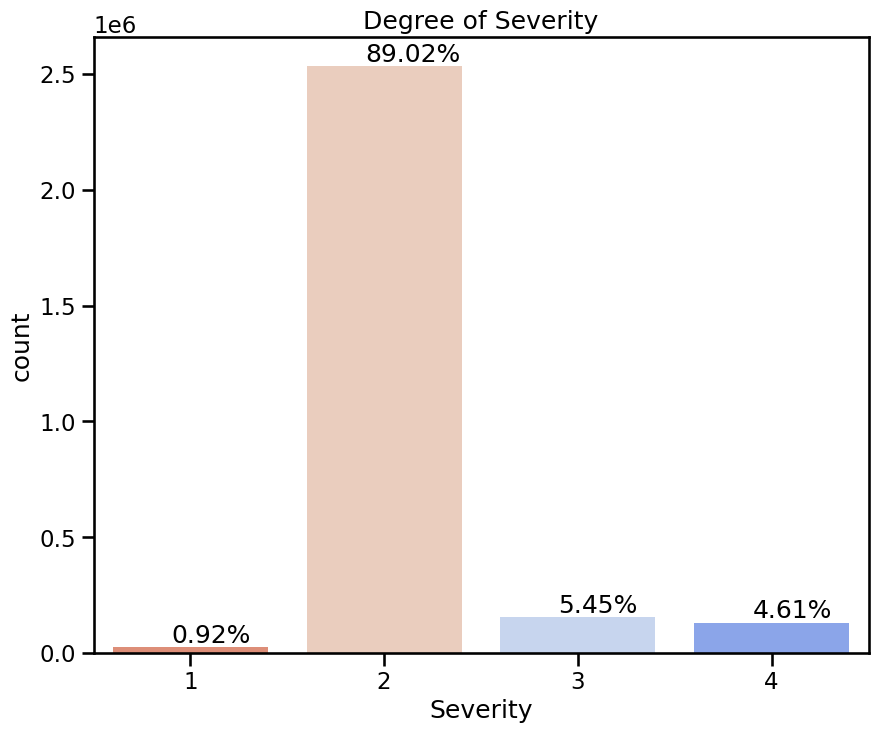

In [58]:
fig, ax = plt.subplots(figsize = (10,8))
c = sns.countplot(x="Severity", data = acs, palette = "coolwarm_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(acs.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

### Analysis of the Road Condition

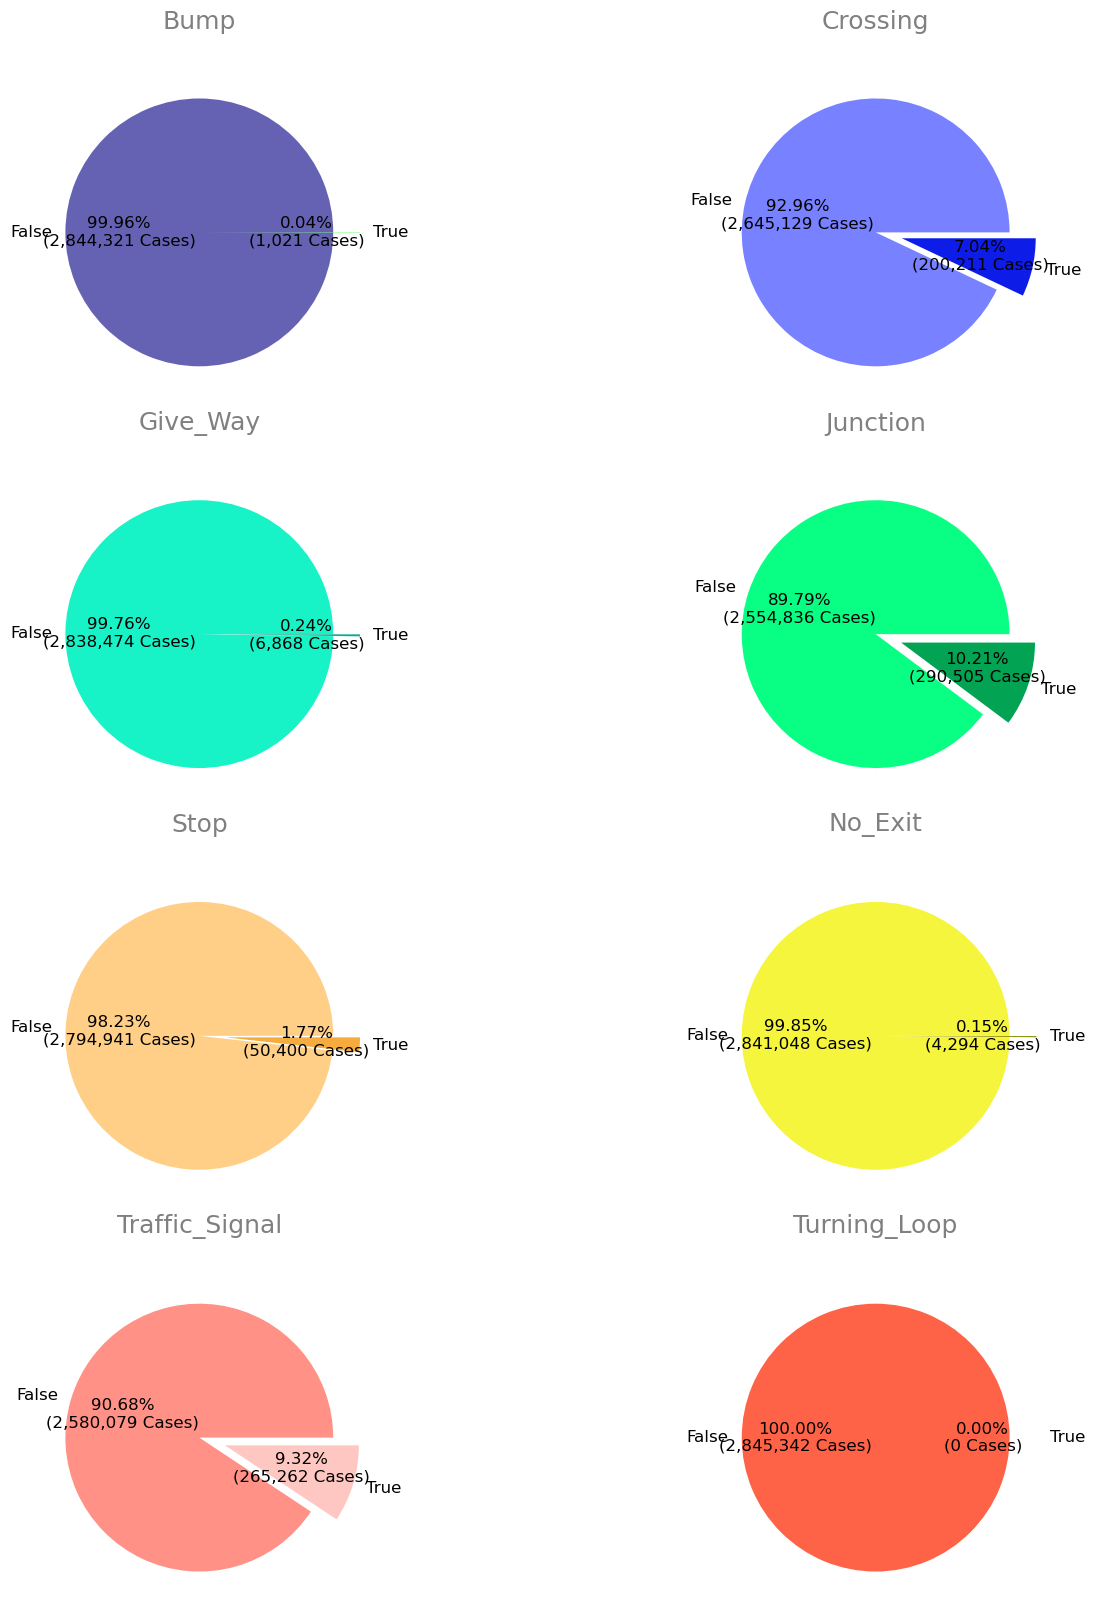

In [59]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(16,20))

road = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(acs[road[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    title = '\n'.join([road[count], ''])

    i.pie(size, labels=labels, colors=colors[count],
          autopct=lambda pct: func(pct, size), labeldistance=1.1,
          textprops={'fontsize': 12}, explode=[0, 0.2])

    i.set_title(title, fontsize=18, color='grey')
    
    count += 1
    
plt.show()

#### Analysis of Road Conditions

1) The highest cases of road condition garnering at a total of 290,505 (10.21%) road accidents cases occurs in Junction

2) The highest cases of road condition garnering at a total of 265,262 (9.32%) road accidents cases occurs in Traffic Signal

3) The highest cases of road condition garnering at a total of 200,211 (7.04%) road accident cases occurs in Crossing

### Road Condtions by Severity

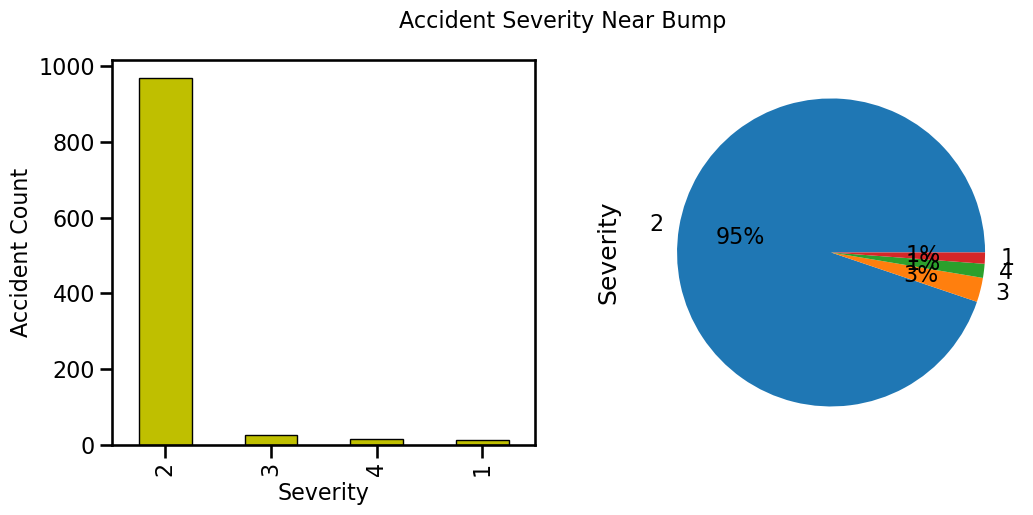

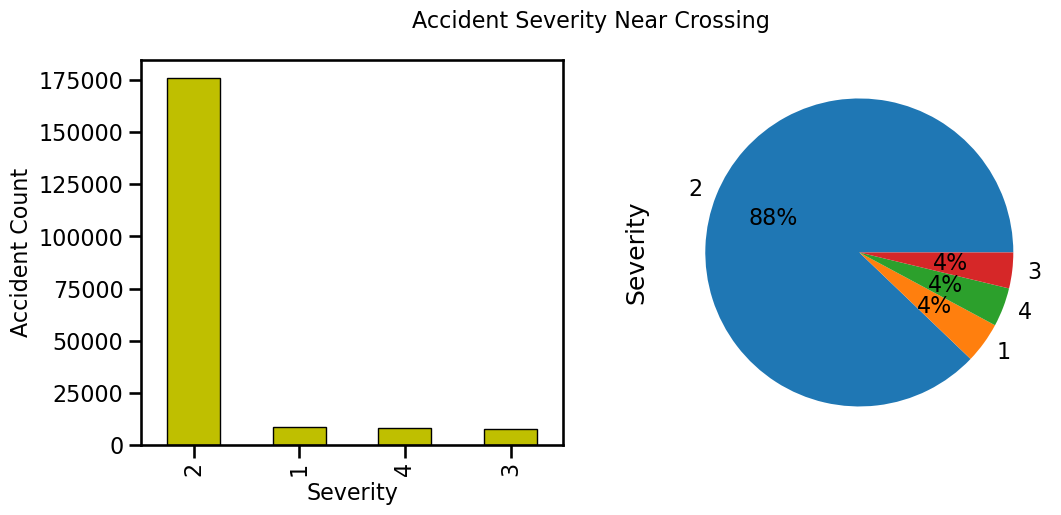

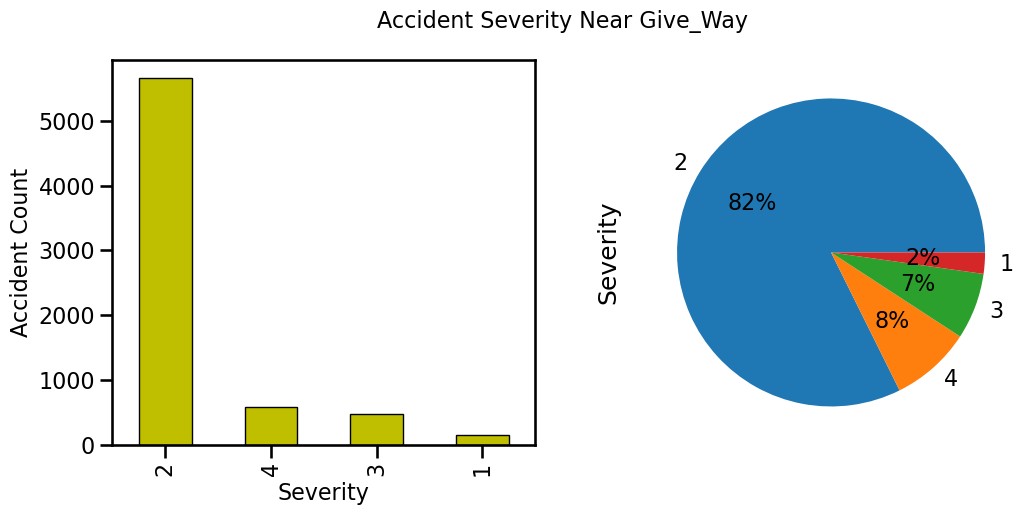

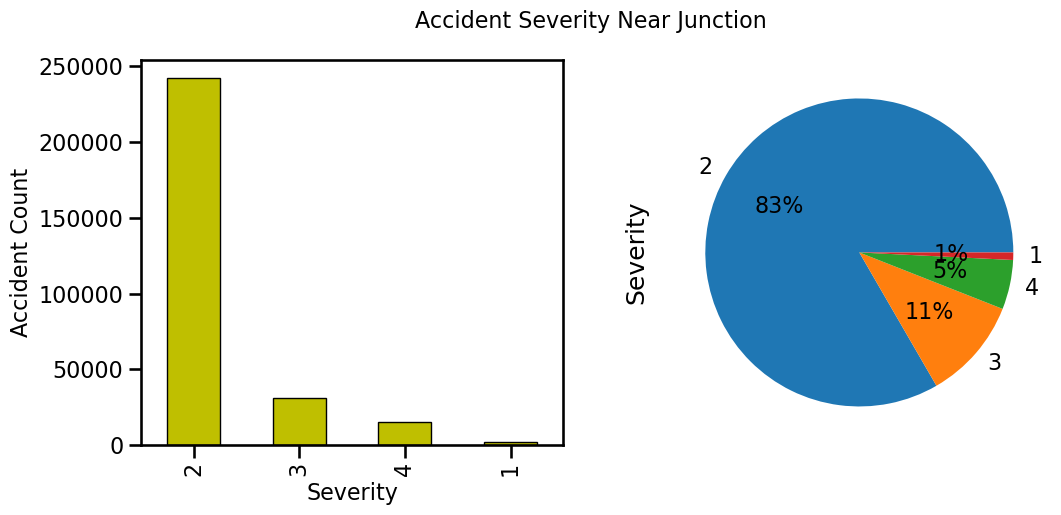

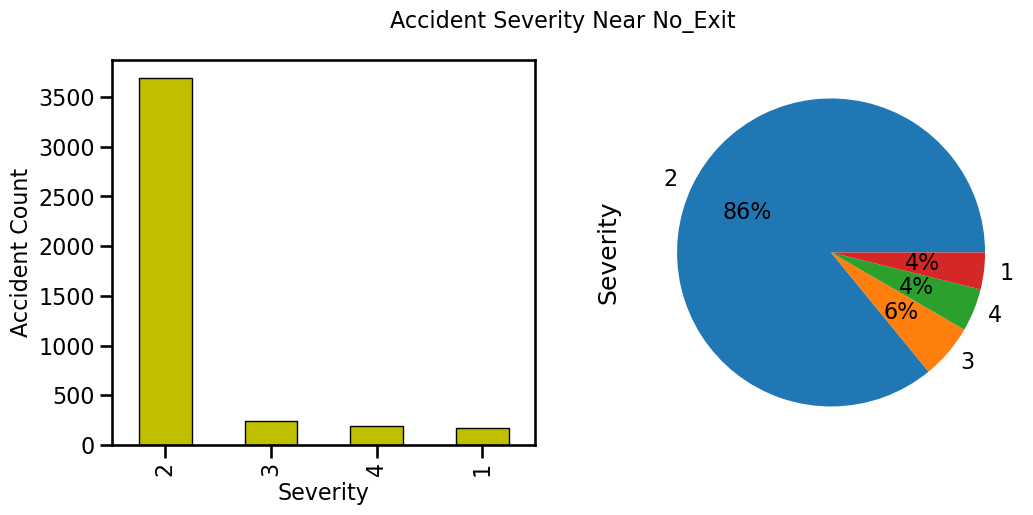

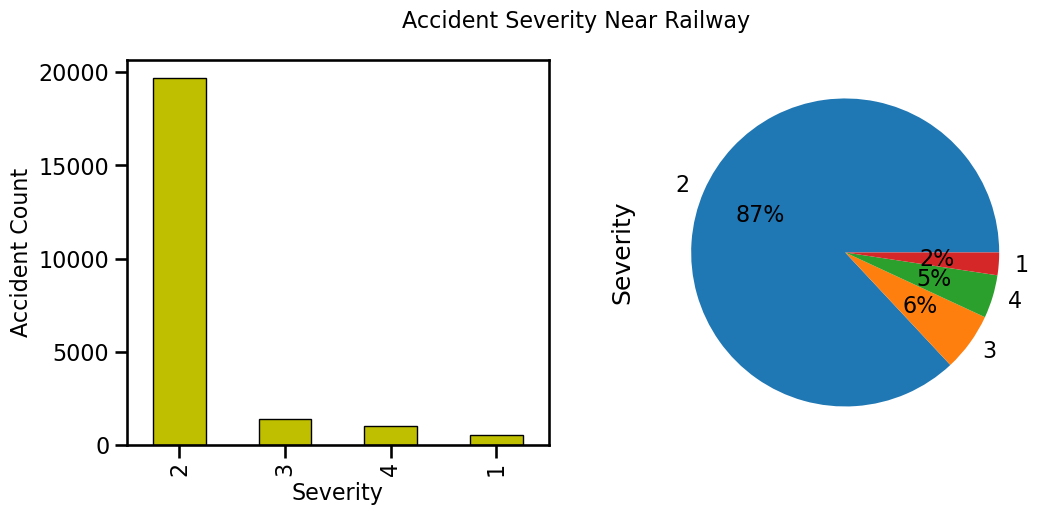

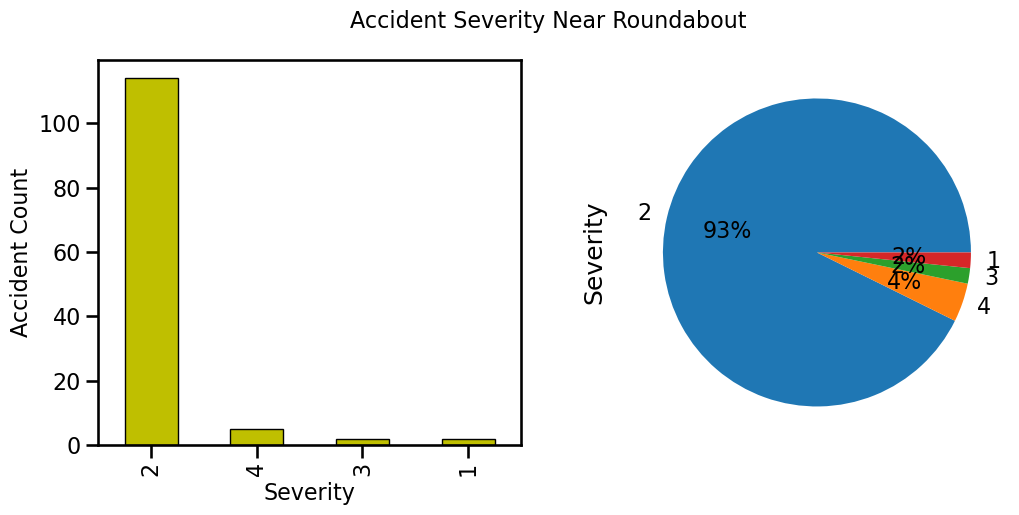

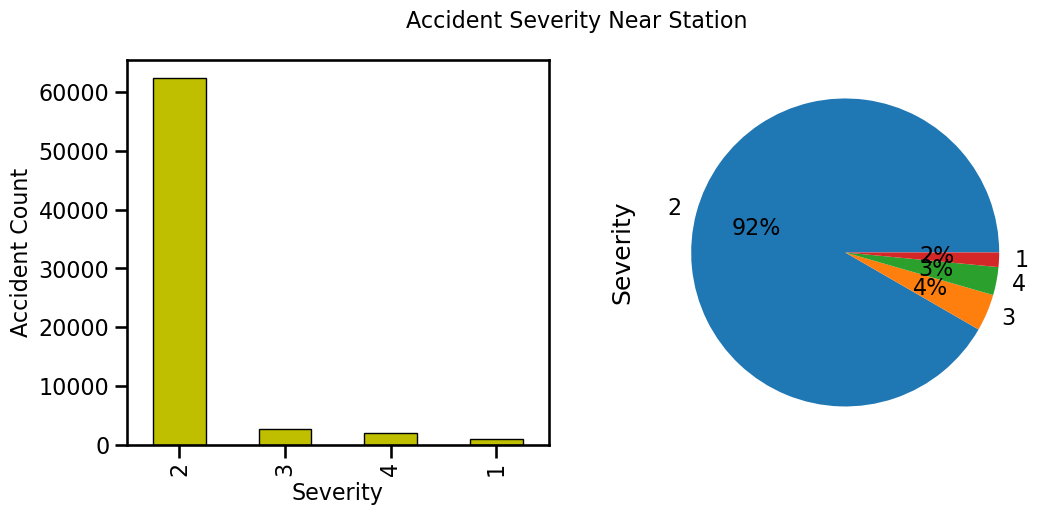

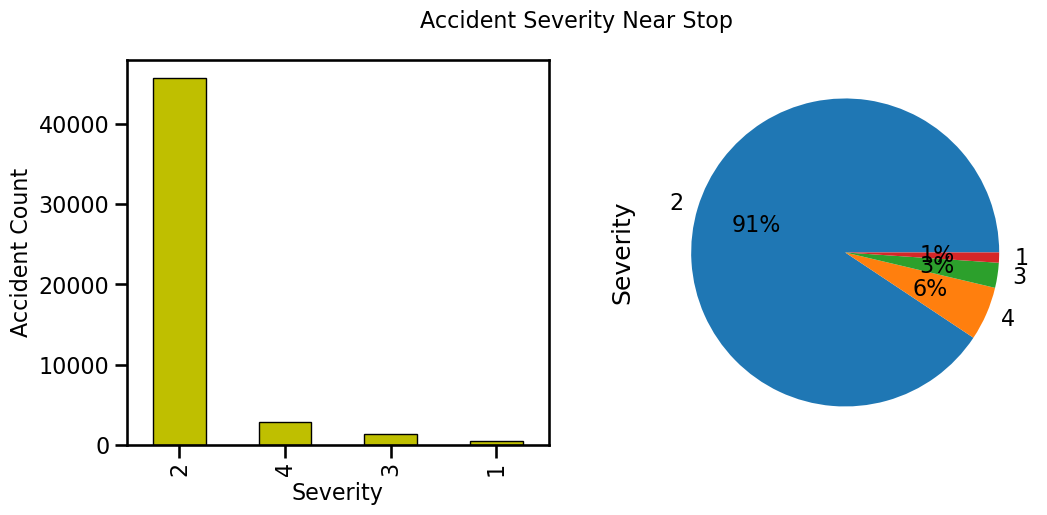

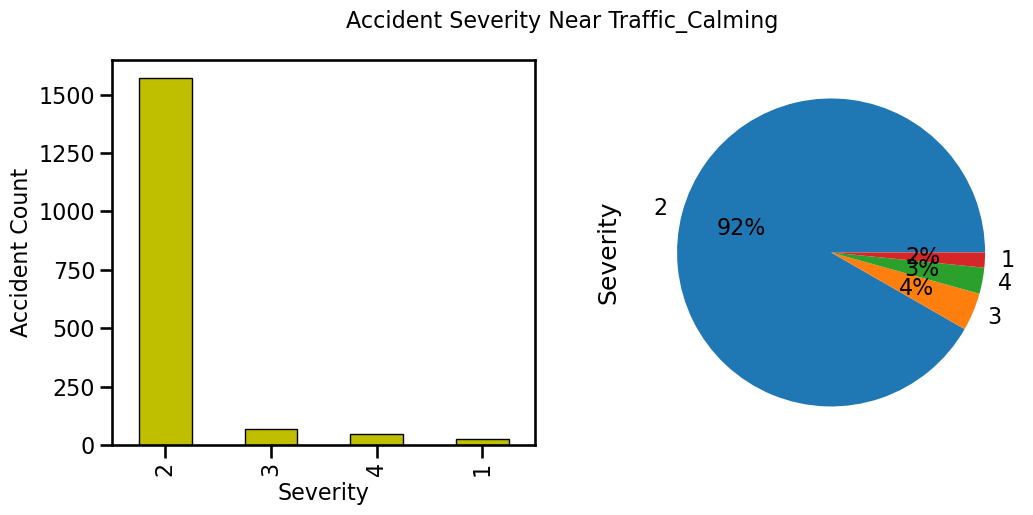

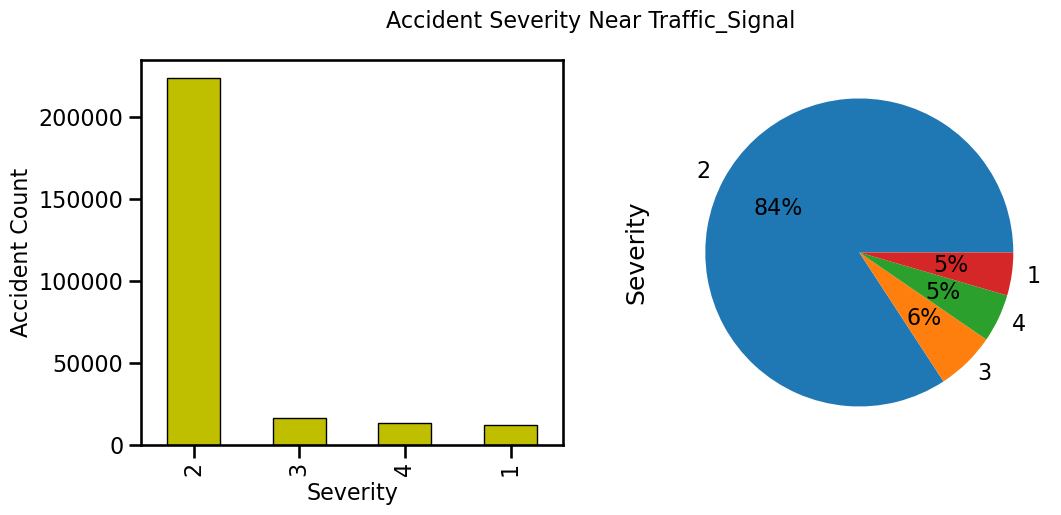

In [60]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (acs[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        acs.loc[acs[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        acs.loc[acs[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)
        
    plt.show()

#### Analysis of Road Condtions by Severity

1) Severity 2 is the major factorial component of road accidents.

### Analysis of which Side of the Road: R or L

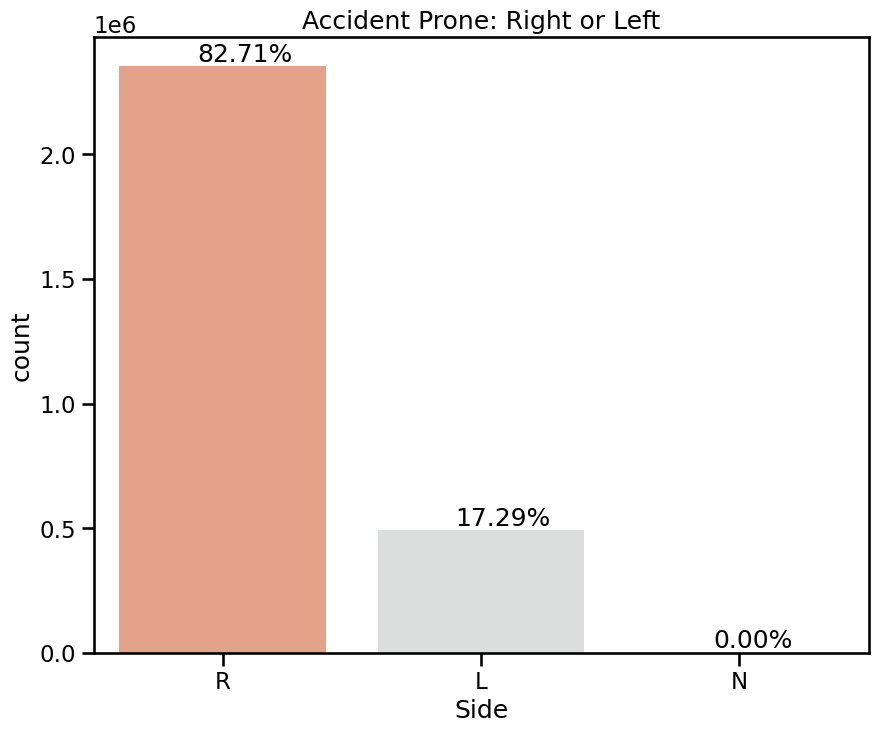

In [61]:
fig, ax = plt.subplots(figsize = (10,8))
c1 = sns.countplot(x="Side", data = acs, palette = "coolwarm_r")
c1.set_title("Accident Prone: Right or Left")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(acs.Side))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

#### Analysis of which Side of the Road: R or L

1) There are more accidents occurring within the right side of the road, garnering at 82.71% which is 5,030,523 cases.

2) The left side of the road caused 17.29% of the road accident which is 1,051,598 cases.

## Correlation of the Variables

In [62]:
correlation = acs.corr().unstack().sort_values(kind="quicksort", ascending=False)

correlation = correlation[correlation!=1]
print("Top 20 with highest positive correlation")
print(correlation[:20])
print("Top 20 with highest negative correlation")
print(correlation[-20:][::-1])

Top 20 with highest positive correlation
End_Lng          Start_Lng          0.999999
Start_Lng        End_Lng            0.999999
Start_Lat        End_Lat            0.999995
End_Lat          Start_Lat          0.999995
Wind_Chill(F)    Temperature(F)     0.993857
Temperature(F)   Wind_Chill(F)      0.993857
Traffic_Calming  Bump               0.772162
Bump             Traffic_Calming    0.772162
Crossing         Traffic_Signal     0.422232
Traffic_Signal   Crossing           0.422232
Year             Wind_Chill(F)      0.237869
Wind_Chill(F)    Year               0.237869
                 Visibility(mi)     0.217573
Visibility(mi)   Wind_Chill(F)      0.217573
Temperature(F)   Visibility(mi)     0.211134
Visibility(mi)   Temperature(F)     0.211134
Pressure(in)     End_Lng            0.208830
End_Lng          Pressure(in)       0.208830
Pressure(in)     Start_Lng          0.208828
Start_Lng        Pressure(in)       0.208828
dtype: float64
Top 20 with highest negative correlation
Dur

## Correlation Matrix

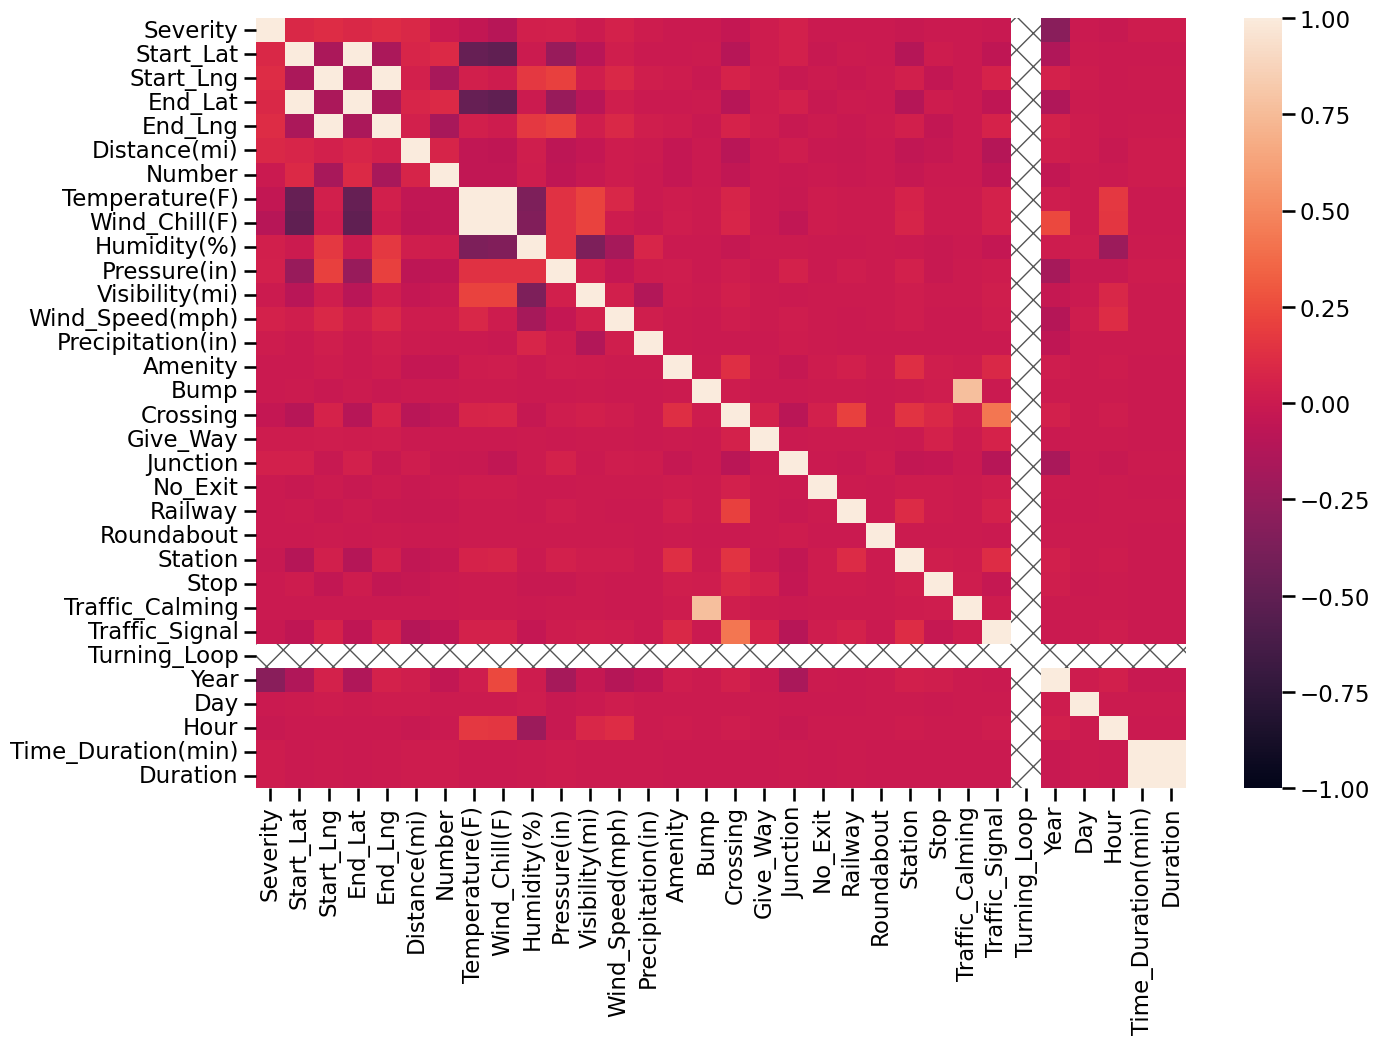

In [63]:
corr_matrix = acs.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.gca().patch.set(hatch="X", edgecolor="#555")
plt.show()

# Data Pre-processing

In [64]:
# Import libraries

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

### Categorical Values

In [65]:
categorical_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Time', 'End_Time', 
              'End_Lat', 'End_Lng']

print("Unique count of categorical features:")

for i in categorical_names:
    
    print(i,acs[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3
Start_Time 1807311
End_Time 2239983
End_Lat 1080811
End_Lng 1105404


#### Country and Turning Loop only have one categorical Value

In [66]:
# Dropping Categorical Value
acs = acs.drop(['Country','Turning_Loop'], axis=1)

#### Dropping Country and Turning Loop as it only has one categorical value. 

Having one categorical value, provides no useful information for the model as it does not contribute to any variation within the data. When including one categorical features can possibly degrade the model's performance due to the additional noise to the dataset and an increase of the complexity of the model.

Therefore, by dropping one categorical feature such as Country and Turning Loop would enable to reduce the dimensionality of the dataset and avoid potential problems during the model training process. 

#### Cleaning up Categorical Features

#### Weather Conditions

Wind_Direction needs to be simplified

In [67]:
print("Wind Direction: ", acs['Wind_Direction'].unique())

Wind Direction:  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


In [68]:
acs.loc[acs['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
acs.loc[(acs['Wind_Direction']=='West')|(acs['Wind_Direction']=='WSW')|(acs['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
acs.loc[(acs['Wind_Direction']=='South')|(acs['Wind_Direction']=='SSW')|(acs['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
acs.loc[(acs['Wind_Direction']=='North')|(acs['Wind_Direction']=='NNW')|(acs['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
acs.loc[(acs['Wind_Direction']=='East')|(acs['Wind_Direction']=='ESE')|(acs['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
acs.loc[acs['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", acs['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


#### Distinct Weather Conditions

In [69]:
weather ='!'.join(acs['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic

Weather Conditions has too many description, therefore, common weather conditions will be created.

In [70]:
acs['Clear'] = np.where(acs['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
acs['Cloud'] = np.where(acs['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
acs['Rain'] = np.where(acs['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
acs['Heavy_Rain'] = np.where(acs['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
acs['Snow'] = np.where(acs['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
acs['Heavy_Snow'] = np.where(acs['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
acs['Fog'] = np.where(acs['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [71]:
weather_condi = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather_condi:
    acs.loc[acs['Weather_Condition'].isnull(),i] = acs.loc[acs['Weather_Condition'].isnull(),'Weather_Condition']
    acs[i] = acs[i].astype('bool')

acs.loc[:,['Weather_Condition'] + weather_condi]

# Dropping Weather_Condition
#acs = acs.drop(['Weather_Condition'], axis=1)

Weather_Condition  Clear  Cloud   Rain  Heavy_Rain   Snow  Heavy_Snow  \
0              Light Rain  False  False   True       False  False       False   
1              Light Rain  False  False   True       False  False       False   
2                Overcast  False   True  False       False  False       False   
3                Overcast  False   True  False       False  False       False   
4              Light Rain  False  False   True       False  False       False   
...                   ...    ...    ...    ...         ...    ...         ...   
2845337              Fair  False  False  False       False  False       False   
2845338              Fair  False  False  False       False  False       False   
2845339     Partly Cloudy  False   True  False       False  False       False   
2845340              Fair  False  False  False       False  False       False   
2845341              Fair  False  False  False       False  False       False   

           Fog  
0        False  
1        False  
2        False  
3        False  
4        False  
...        ...  
2845337  False  
2845338  False  
2845339  False  
2845340  False  
2845341  False  

[2845342 rows x 8 columns]

### Time

Investigating the average difference between time and start time

In [72]:
acs['Weather_Timestamp'] = pd.to_datetime(acs['Weather_Timestamp'])
acs['Start_Time'] = pd.to_datetime(acs['Start_Time'])

print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(acs['Weather_Timestamp'] - acs['Start_Time']).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:01:11.643297838


The mean difference of the Start_Time and Weather_Timestamp is small.

In [73]:
# Dropping Weather_Timestamp
#acs.drop(["Weather_Timestamp"], axis=1)

# Convert Start_Time and End_Time to datetypes
acs['Start_Time'] = pd.to_datetime(acs['Start_Time'], errors='coerce')
acs['End_Time'] = pd.to_datetime(acs['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
acs['Year'] = acs['Start_Time'].dt.year
acs['Month'] = acs['Start_Time'].dt.strftime('%b')
acs['Day'] = acs['Start_Time'].dt.day
acs['Hour'] = acs['Start_Time'].dt.hour
acs['Minute'] = acs['Hour']*60.0 + acs['Start_Time'].dt.hour
acs['Weekday'] = acs['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
time_d='Time_Duration(min)'
acs[time_d]=round((acs['End_Time'] - acs['Start_Time'])/np.timedelta64(1,'m'))
acs.info()

acs.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 60 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Timezone               object        
 18  Airport_Code          

Start_Time  Year Month Weekday  Day  Hour  Minute
0 2016-02-08 00:37:08  2016   Feb     Mon    8     0     0.0
1 2016-02-08 05:56:20  2016   Feb     Mon    8     5   305.0
2 2016-02-08 06:15:39  2016   Feb     Mon    8     6   366.0
3 2016-02-08 06:51:45  2016   Feb     Mon    8     6   366.0
4 2016-02-08 07:53:43  2016   Feb     Mon    8     7   427.0

### Handling Outliers

#### Time

Dropping rows with negative duration of time

In [74]:
acs[time_d][acs[time_d]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

#### Information of duration of time

In [75]:
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident duration: {} minutes.'.format(acs[time_d].max(),round(acs[time_d].max()/60), round(acs[time_d].max()/60/24), acs[time_d].min()))

Max time to clear an accident: 1682579.0 minutes or 28043 hours or 1168 days; Min to clear an accident duration: 2.0 minutes.


In [76]:
ws = 'Wind_Speed(mph)'

#### Wind_Speed(mph)

In [77]:
acs[ws][acs[ws]<=0]

613        0.0
837        0.0
2082       0.0
3481       0.0
5823       0.0
          ... 
2845306    0.0
2845309    0.0
2845312    0.0
2845323    0.0
2845329    0.0
Name: Wind_Speed(mph), Length: 433636, dtype: float64

In [78]:
# Dropping rows when duration of Wind Speed is < 0

negative_outliers = acs[ws]<=0

# Set outliers to NAN
acs[negative_outliers] = np.nan

# Dropping rows with negative
acs.dropna(subset=[ws],axis=0,inplace=True)
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253762 entries, 0 to 2845341
Data columns (total 60 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               float64       
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Timezone               object        
 18  Airport_Code          

In [79]:
acs[ws][acs[ws]<=0]

Series([], Name: Wind_Speed(mph), dtype: float64)

#### Filling Outliers with Median Values

In [80]:
n=3

median = acs[ws].median()
std = acs[ws].std()
outliers = (acs[ws] - median).abs() > std*n

# Set outliers to NAN
acs[outliers] = np.nan

# Filling in NAN with median values
acs[ws].fillna(median, inplace=True)

acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253762 entries, 0 to 2845341
Data columns (total 60 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               float64       
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Timezone               object        
 18  Airport_Code          

#### Percipitation(in)

In [81]:
p = 'Precipitation(in)'

In [82]:
acs[p][acs[p]<=0]

0          0.0
12         0.0
18         0.0
20         0.0
21         0.0
          ... 
2845337    0.0
2845338    0.0
2845339    0.0
2845340    0.0
2845341    0.0
Name: Precipitation(in), Length: 1662924, dtype: float64

In [83]:
# Dropping rows when duration of time is < 0

negative_outliers1 = acs[p]<=0

# Set outliers to NAN
acs[negative_outliers1] = np.nan

# Dropping rows with negative td
acs.dropna(subset=[p],axis=0,inplace=True)
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165532 entries, 4 to 2845148
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     165532 non-null  object        
 1   Severity               165532 non-null  float64       
 2   Start_Time             165532 non-null  datetime64[ns]
 3   End_Time               165532 non-null  datetime64[ns]
 4   Start_Lat              165532 non-null  float64       
 5   Start_Lng              165532 non-null  float64       
 6   End_Lat                165532 non-null  float64       
 7   End_Lng                165532 non-null  float64       
 8   Distance(mi)           165532 non-null  float64       
 9   Description            165532 non-null  object        
 10  Number                 52093 non-null   float64       
 11  Street                 165532 non-null  object        
 12  Side                   165532 non-null  obj

In [84]:
acs[p][acs[p]<=0]

Series([], Name: Precipitation(in), dtype: float64)

#### Filling Outliers with Median Values

In [85]:
n1=3

median1 = acs[p].median()
std1 = acs[p].std()
outliers1 = (acs[p] - median1).abs() > std1*n1

# Set outliers to NAN
acs[outliers1] = np.nan

# Filling in NAN with median values
acs[p].fillna(median1, inplace=True)

acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165532 entries, 4 to 2845148
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     164769 non-null  object        
 1   Severity               164769 non-null  float64       
 2   Start_Time             164769 non-null  datetime64[ns]
 3   End_Time               164769 non-null  datetime64[ns]
 4   Start_Lat              164769 non-null  float64       
 5   Start_Lng              164769 non-null  float64       
 6   End_Lat                164769 non-null  float64       
 7   End_Lng                164769 non-null  float64       
 8   Distance(mi)           164769 non-null  float64       
 9   Description            164769 non-null  object        
 10  Number                 51829 non-null   float64       
 11  Street                 164769 non-null  object        
 12  Side                   164769 non-null  obj

#### Number

In [86]:
n = 'Number'

In [87]:
acs[n][acs[n]<=0]

Series([], Name: Number, dtype: float64)

In [88]:
# Dropping rows when duration of time is < 0

negative_outliers2 = acs[n]<=0

# Set outliers to NAN
acs[negative_outliers2] = np.nan

# Dropping rows with negative td
acs.dropna(subset=[n],axis=0,inplace=True)
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51829 entries, 47 to 2844756
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     51829 non-null  object        
 1   Severity               51829 non-null  float64       
 2   Start_Time             51829 non-null  datetime64[ns]
 3   End_Time               51829 non-null  datetime64[ns]
 4   Start_Lat              51829 non-null  float64       
 5   Start_Lng              51829 non-null  float64       
 6   End_Lat                51829 non-null  float64       
 7   End_Lng                51829 non-null  float64       
 8   Distance(mi)           51829 non-null  float64       
 9   Description            51829 non-null  object        
 10  Number                 51829 non-null  float64       
 11  Street                 51829 non-null  object        
 12  Side                   51829 non-null  object        
 13

In [89]:
acs[n][acs[n]<=0]

Series([], Name: Number, dtype: float64)

#### Filling Outliers with Median Values

In [90]:
n2=3

median2 = acs[n].median()
std2 = acs[n].std()
outliers2 = (acs[n] - median2).abs() > std2*n2

# Set outliers to NAN
acs[outliers2] = np.nan

# Filling in NAN with median values
acs[n].fillna(median2, inplace=True)

acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51829 entries, 47 to 2844756
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     50856 non-null  object        
 1   Severity               50856 non-null  float64       
 2   Start_Time             50856 non-null  datetime64[ns]
 3   End_Time               50856 non-null  datetime64[ns]
 4   Start_Lat              50856 non-null  float64       
 5   Start_Lng              50856 non-null  float64       
 6   End_Lat                50856 non-null  float64       
 7   End_Lng                50856 non-null  float64       
 8   Distance(mi)           50856 non-null  float64       
 9   Description            50856 non-null  object        
 10  Number                 51829 non-null  float64       
 11  Street                 50856 non-null  object        
 12  Side                   50856 non-null  object        
 13

#### Wind_Chill(F)


In [91]:
wc = 'Wind_Chill(F)'

In [92]:
acs[wc][acs[wc]<=0]

12710      -3.4
15175     -10.6
227481    -15.0
263434    -19.0
323340     -8.0
340109     -5.0
352931    -18.0
357881     -2.0
381731     -7.0
397149     -5.0
424501     -9.0
452866     -9.0
452898     -9.0
501447    -16.0
534232     -1.0
646364    -21.0
696970    -19.0
705102     -3.0
736181    -18.0
775552     -8.0
783469      0.0
811432    -21.0
827617     -9.0
839734    -12.0
848474     -9.0
853865      0.0
873646     -5.0
893765     -8.0
941012     -5.0
941620     -1.0
948060     -6.0
973546     -3.0
1024414    -7.0
1028471    -3.0
1113071     0.0
1142975    -8.0
1148119   -14.0
1201071   -16.0
1209345    -2.0
1216272    -3.0
1219962    -2.0
1224899    -3.0
1309210   -21.0
1315818    -7.0
1364253    -1.0
1392312    -7.0
1397701     0.0
1424094    -7.0
1444700    -2.0
1463654   -16.0
1478867     0.0
1482328    -5.0
1516165    -2.0
1519217    -3.0
1522036    -6.0
1524783    -2.0
1526791    -8.0
1534110   -20.0
1537929   -13.0
1541552   -22.0
1544437    -2.0
1546345    -8.0
1555969 

In [93]:
# Dropping rows when duration of time is < 0

negative_outliers3 = acs[wc]<=0

# Set outliers to NAN
acs[negative_outliers3] = np.nan

# Dropping rows with negative td
acs.dropna(subset=[wc],axis=0,inplace=True)
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47461 entries, 47 to 2844756
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     47461 non-null  object        
 1   Severity               47461 non-null  float64       
 2   Start_Time             47461 non-null  datetime64[ns]
 3   End_Time               47461 non-null  datetime64[ns]
 4   Start_Lat              47461 non-null  float64       
 5   Start_Lng              47461 non-null  float64       
 6   End_Lat                47461 non-null  float64       
 7   End_Lng                47461 non-null  float64       
 8   Distance(mi)           47461 non-null  float64       
 9   Description            47461 non-null  object        
 10  Number                 47461 non-null  float64       
 11  Street                 47461 non-null  object        
 12  Side                   47461 non-null  object        
 13

In [94]:
acs[wc][acs[wc]<=0]

Series([], Name: Wind_Chill(F), dtype: float64)

#### Filling Outliers with Median Values

In [95]:
n3=3

median3 = acs[wc].median()
std3 = acs[wc].std()
outliers3 = (acs[wc] - median3).abs() > std3*n3

# Set outliers to NAN
acs[outliers3] = np.nan

# Filling in NAN with median values
acs[wc].fillna(median3, inplace=True)

acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47461 entries, 47 to 2844756
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     47434 non-null  object        
 1   Severity               47434 non-null  float64       
 2   Start_Time             47434 non-null  datetime64[ns]
 3   End_Time               47434 non-null  datetime64[ns]
 4   Start_Lat              47434 non-null  float64       
 5   Start_Lng              47434 non-null  float64       
 6   End_Lat                47434 non-null  float64       
 7   End_Lng                47434 non-null  float64       
 8   Distance(mi)           47434 non-null  float64       
 9   Description            47434 non-null  object        
 10  Number                 47434 non-null  float64       
 11  Street                 47434 non-null  object        
 12  Side                   47434 non-null  object        
 13

## Missing Values/Data

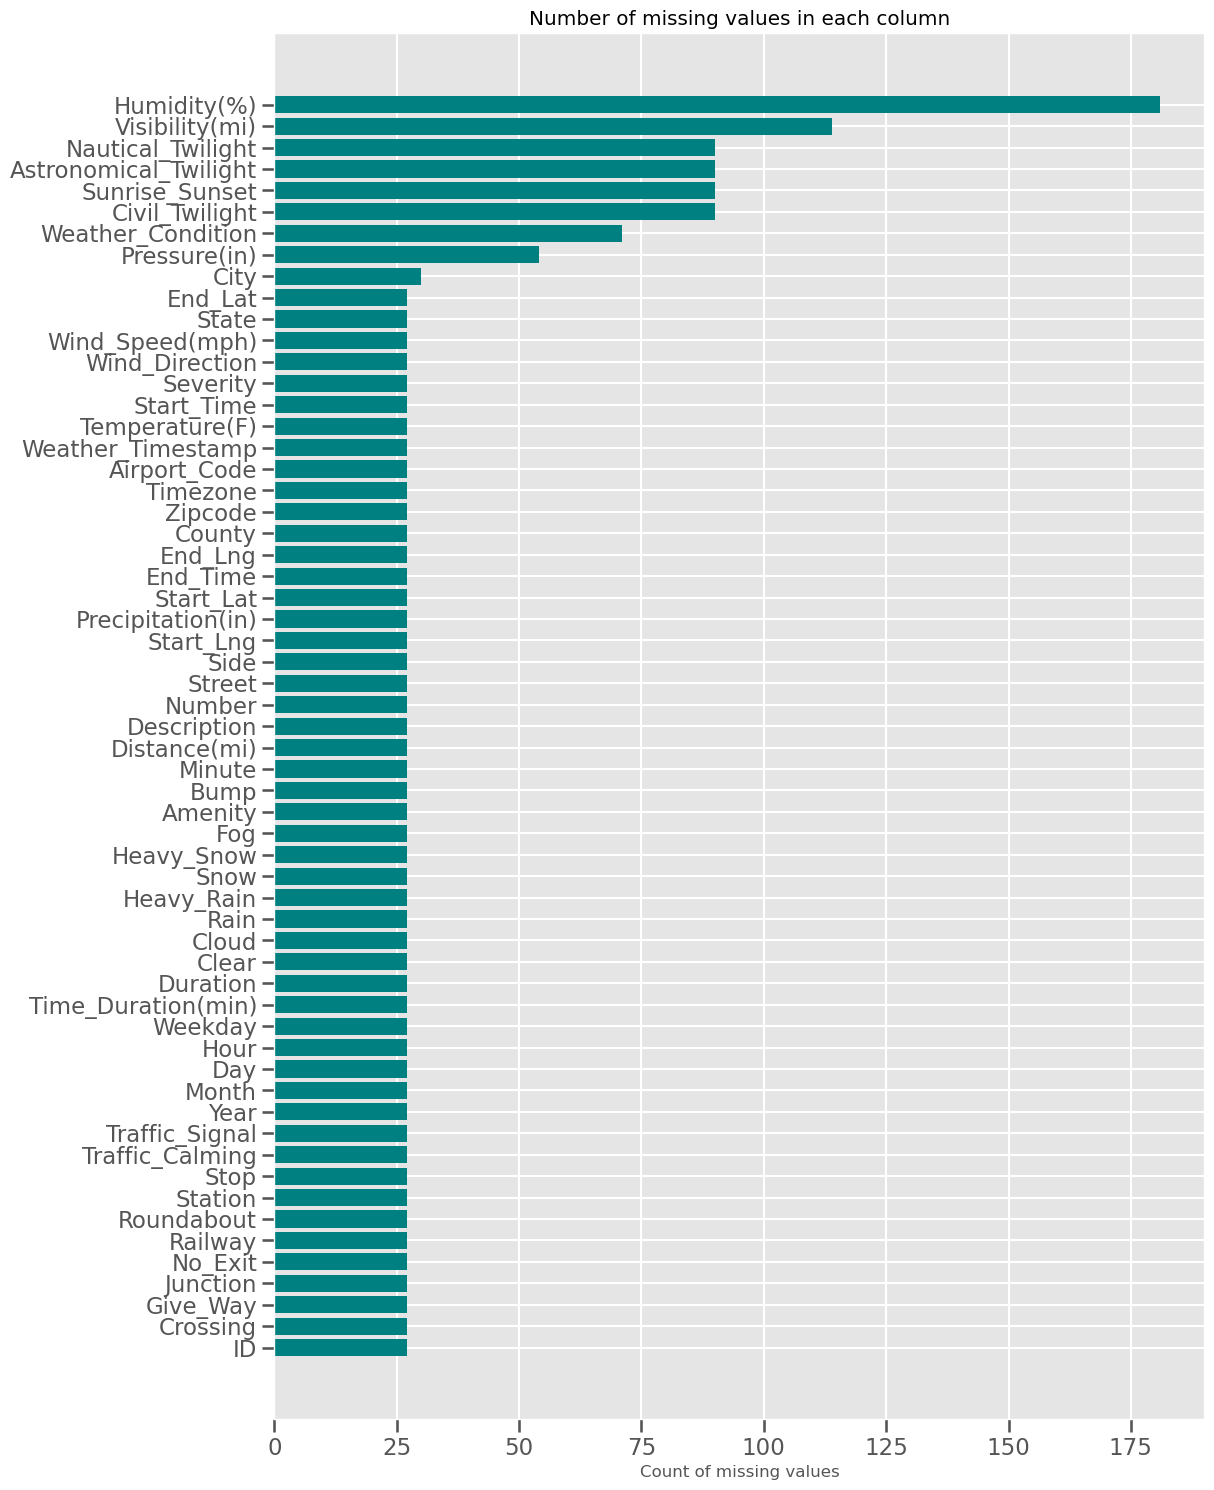

In [96]:
missing_acs = acs.isnull().sum(axis=0).reset_index()
missing_acs.columns = ['column_name','missing_count']
missing_acs = missing_acs.loc[missing_acs['missing_count']>0]
missing_acs = missing_acs.sort_values(by='missing_count')

ind = np.arange(missing_acs.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_acs.missing_count.values,color='teal')
ax.set_yticks(ind)
ax.set_yticklabels(missing_acs.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Dropping data

Dropped values due to missing data/irrelavant data: 

1) Number

2) Wind_Chill(F)

3) Humidity(%)

4) Temperature(F)

5) ID

In [97]:
acs = acs.drop(['Number','Wind_Chill(F)','Humidity(%)','Temperature(F)','ID'], axis=1)

#### Display of missing values

In [98]:
missingv = pd.DataFrame(acs.isnull().sum()).reset_index()
missingv.columns = ['Feature', 'Missing_Percent(%)']
missingv['Missing_Percent(%)'] = missingv['Missing_Percent(%)'].apply(lambda x: x / acs.shape[0] * 100)
missingv.loc[missingv['Missing_Percent(%)']>0,:]

Feature  Missing_Percent(%)
0                Severity            0.056889
1              Start_Time            0.056889
2                End_Time            0.056889
3               Start_Lat            0.056889
4               Start_Lng            0.056889
5                 End_Lat            0.056889
6                 End_Lng            0.056889
7            Distance(mi)            0.056889
8             Description            0.056889
9                  Street            0.056889
10                   Side            0.056889
11                   City            0.063210
12                 County            0.056889
13                  State            0.056889
14                Zipcode            0.056889
15               Timezone            0.056889
16           Airport_Code            0.056889
17      Weather_Timestamp            0.056889
18           Pressure(in)            0.113778
19         Visibility(mi)            0.240197
20         Wind_Direction            0.056889
21        Wind_Speed(mph)            0.056889
22      Precipitation(in)            0.056889
23      Weather_Condition            0.149597
24                Amenity            0.056889
25                   Bump            0.056889
26               Crossing            0.056889
27               Give_Way            0.056889
28               Junction            0.056889
29                No_Exit            0.056889
30                Railway            0.056889
31             Roundabout            0.056889
32                Station            0.056889
33                   Stop            0.056889
34        Traffic_Calming            0.056889
35         Traffic_Signal            0.056889
36         Sunrise_Sunset            0.189629
37         Civil_Twilight            0.189629
38      Nautical_Twilight            0.189629
39  Astronomical_Twilight            0.189629
40                   Year            0.056889
41                  Month            0.056889
42                    Day            0.056889
43                   Hour            0.056889
44                Weekday            0.056889
45     Time_Duration(min)            0.056889
46               Duration            0.056889
47                  Clear            0.056889
48                  Cloud            0.056889
49                   Rain            0.056889
50             Heavy_Rain            0.056889
51                   Snow            0.056889
52             Heavy_Snow            0.056889
53                    Fog            0.056889
54                 Minute            0.056889

#### Dropping values that are smaller in comparison to the total sample

In [99]:
acs = acs.dropna(subset=['Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [100]:
# check of missing values again
missingv = pd.DataFrame(acs.isnull().sum()).reset_index()
missingv.columns = ['Feature', 'Missing_Percent(%)']
missingv['Missing_Percent(%)'] = missingv['Missing_Percent(%)'].apply(lambda x: x / acs.shape[0] * 100)
missingv.loc[missingv['Missing_Percent(%)']>0,:]

Feature  Missing_Percent(%)
18       Pressure(in)            0.056997
19     Visibility(mi)            0.183657
23  Weather_Condition            0.092884

### Imputation of Value

The majority of the columns contains missing parts.

#### Continuing Weather Data

Data is grouped by 'Airport_Code and 'Month', accordingly will be filled with median value.

In [101]:
Weather_d=['Pressure(in)','Visibility(mi)']
print("The number of remaining missing values: ")
for i in Weather_d:
    acs[i] = acs.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
    print( i + " : " + acs[i].isnull().sum().astype(str))

The number of remaining missing values: 
Pressure(in) : 3
Visibility(mi) : 45


In [102]:
acs = acs.dropna(subset=Weather_d)

#### Weather Features

In [103]:
weather_category = Weather_d
print("Count of missing values that will be dropped:\n ")
for i in weather_category:
    if i in acs.columns:
        acs[i] = acs.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.mode()[0]) if all(x.isnull())==False else x)
        print(i + " : " + acs[i].isnull().sum().astype(str))
    else:
        print(i + " column not found.")

# dropping na
acs = acs.dropna(subset=weather_category)

Count of missing values that will be dropped:
 
Pressure(in) : 0
Visibility(mi) : 0


In [104]:
weather_category = weather_condi
print("Count of missing values that will be dropped:\n ")
for i in weather_category:
    if i in acs.columns:
        acs[i] = acs.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.mode()[0]) if all(x.isnull())==False else x)
        print(i + " : " + acs[i].isnull().sum().astype(str))
    else:
        print(i + " column not found.")

# dropping na
acs = acs.dropna(subset=weather_category)

Count of missing values that will be dropped:
 
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


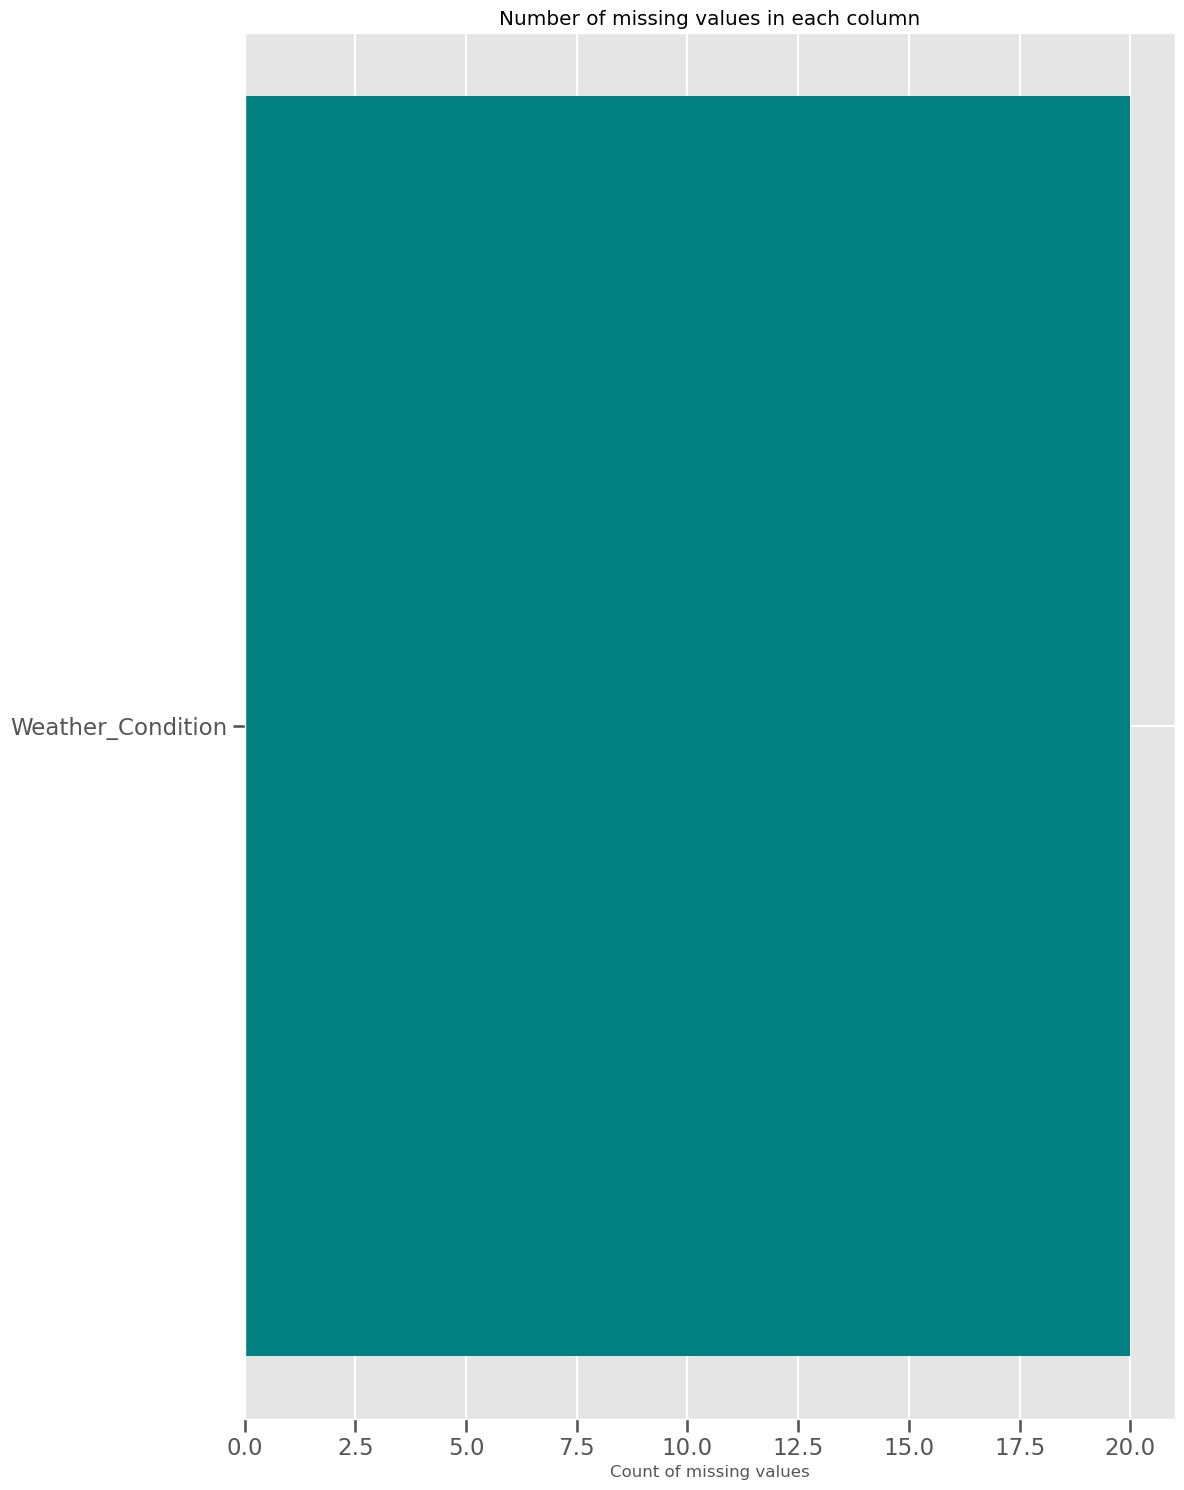

In [105]:
missing_acs1 = acs.isnull().sum(axis=0).reset_index()
missing_acs1.columns = ['column_name','missing_count']
missing_acs1 = missing_acs1.loc[missing_acs1['missing_count']>0]
missing_acs1 = missing_acs1.sort_values(by='missing_count')

ind = np.arange(missing_acs1.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_acs1.missing_count.values,color='teal')
ax.set_yticks(ind)
ax.set_yticklabels(missing_acs1.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [106]:
acs = acs.dropna(subset=['Weather_Condition'])

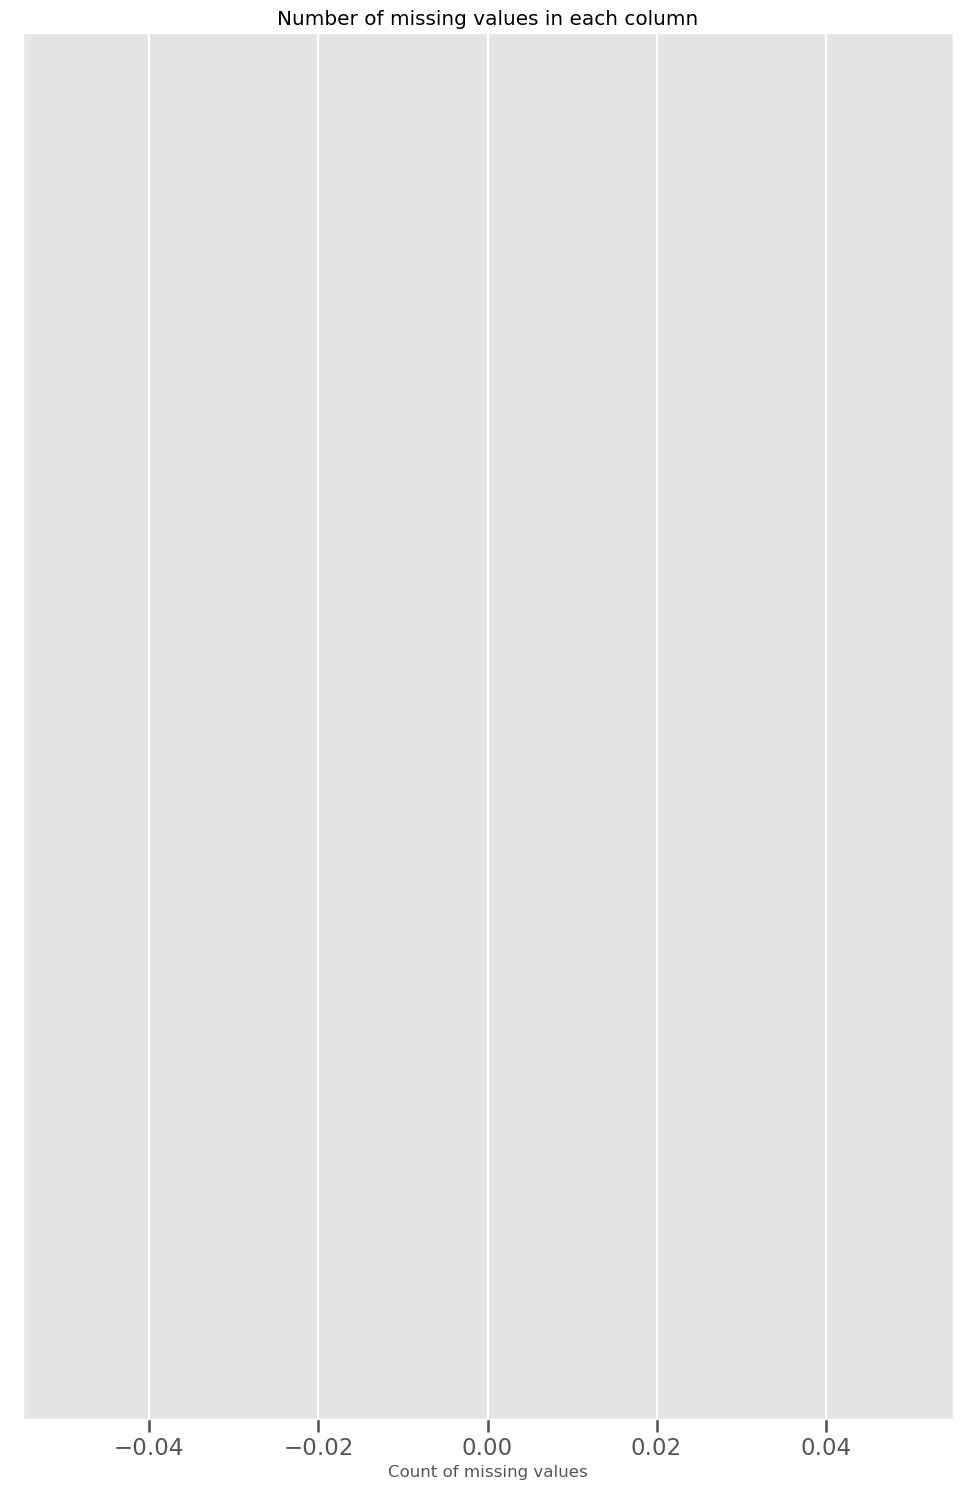

In [107]:
missing_acs1 = acs.isnull().sum(axis=0).reset_index()
missing_acs1.columns = ['column_name','missing_count']
missing_acs1 = missing_acs1.loc[missing_acs1['missing_count']>0]
missing_acs1 = missing_acs1.sort_values(by='missing_count')

ind = np.arange(missing_acs1.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_acs1.missing_count.values,color='teal')
ax.set_yticks(ind)
ax.set_yticklabels(missing_acs1.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [108]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47303 entries, 203 to 2844756
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Severity               47303 non-null  float64       
 1   Start_Time             47303 non-null  datetime64[ns]
 2   End_Time               47303 non-null  datetime64[ns]
 3   Start_Lat              47303 non-null  float64       
 4   Start_Lng              47303 non-null  float64       
 5   End_Lat                47303 non-null  float64       
 6   End_Lng                47303 non-null  float64       
 7   Distance(mi)           47303 non-null  float64       
 8   Description            47303 non-null  object        
 9   Street                 47303 non-null  object        
 10  Side                   47303 non-null  object        
 11  City                   47303 non-null  object        
 12  County                 47303 non-null  object        
 1

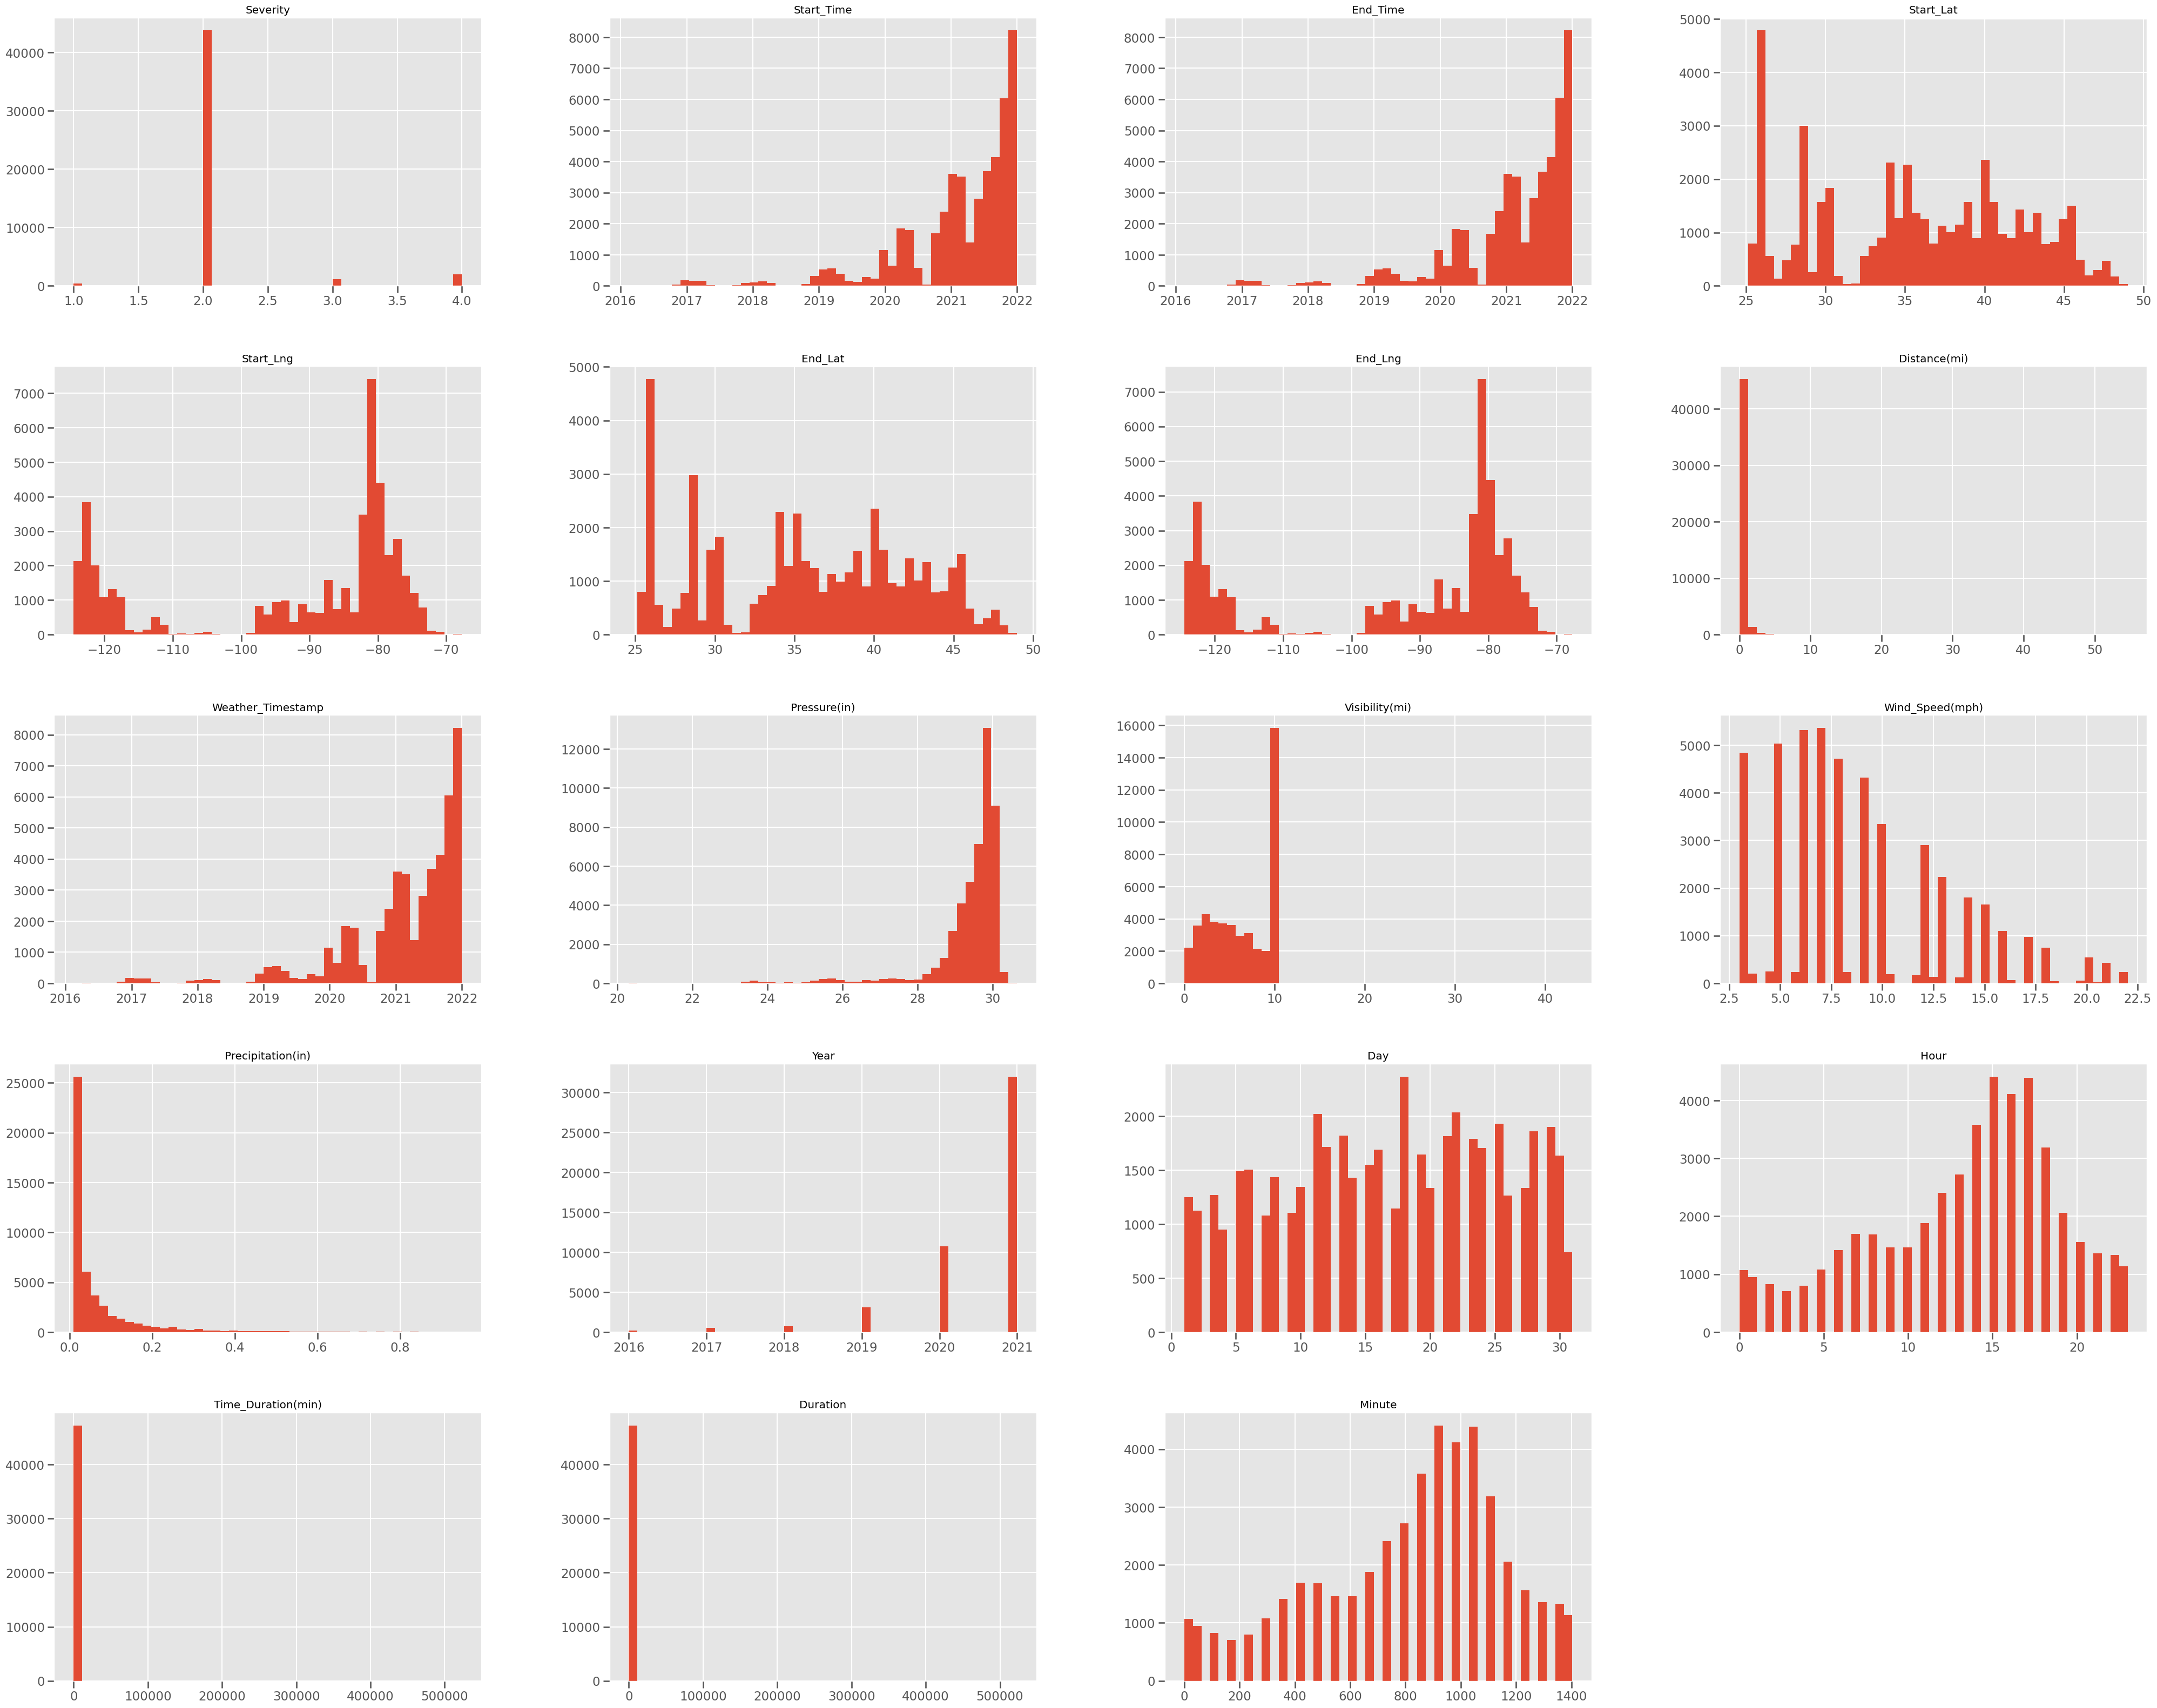

In [109]:
acs.hist(bins=45, figsize=(50,40))
plt.show()

#### Data cleaning: Dropping 0 value 

In [110]:
acs[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

Pressure(in)  Visibility(mi)
count      47303.00        47303.00
mean          29.41            6.15
std            0.98            3.44
min           20.31            0.00
25%           29.26            3.00
50%           29.71            6.00
75%           29.94           10.00
max           30.65           43.00

In [111]:
acs = acs[acs["Pressure(in)"] != 0]
acs = acs[acs["Visibility(mi)"] != 0]
acs[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

Pressure(in)  Visibility(mi)
count      47209.00        47209.00
mean          29.42            6.16
std            0.98            3.44
min           20.31            0.10
25%           29.26            3.00
50%           29.71            6.00
75%           29.94           10.00
max           30.65           43.00

#### Checking if any missing values left

In [112]:
acs.isnull().mean()

Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calmin

#### Drop remaining missing values

In [113]:
acs = acs.dropna(subset=['Weather_Condition','Wind_Direction'])

print('Count of missing value after dropping\n')
acs.isnull().mean()

Count of missing value after dropping



Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calmin

In [114]:
acs.shape

(47209, 55)

#### Dropping duplicates

In [115]:
print("Number of rows:", len(acs.index))
acs.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(acs.index))

Number of rows: 47209
Number of rows after drop of duplicates: 47004


In [116]:
acs.shape

(47004, 55)

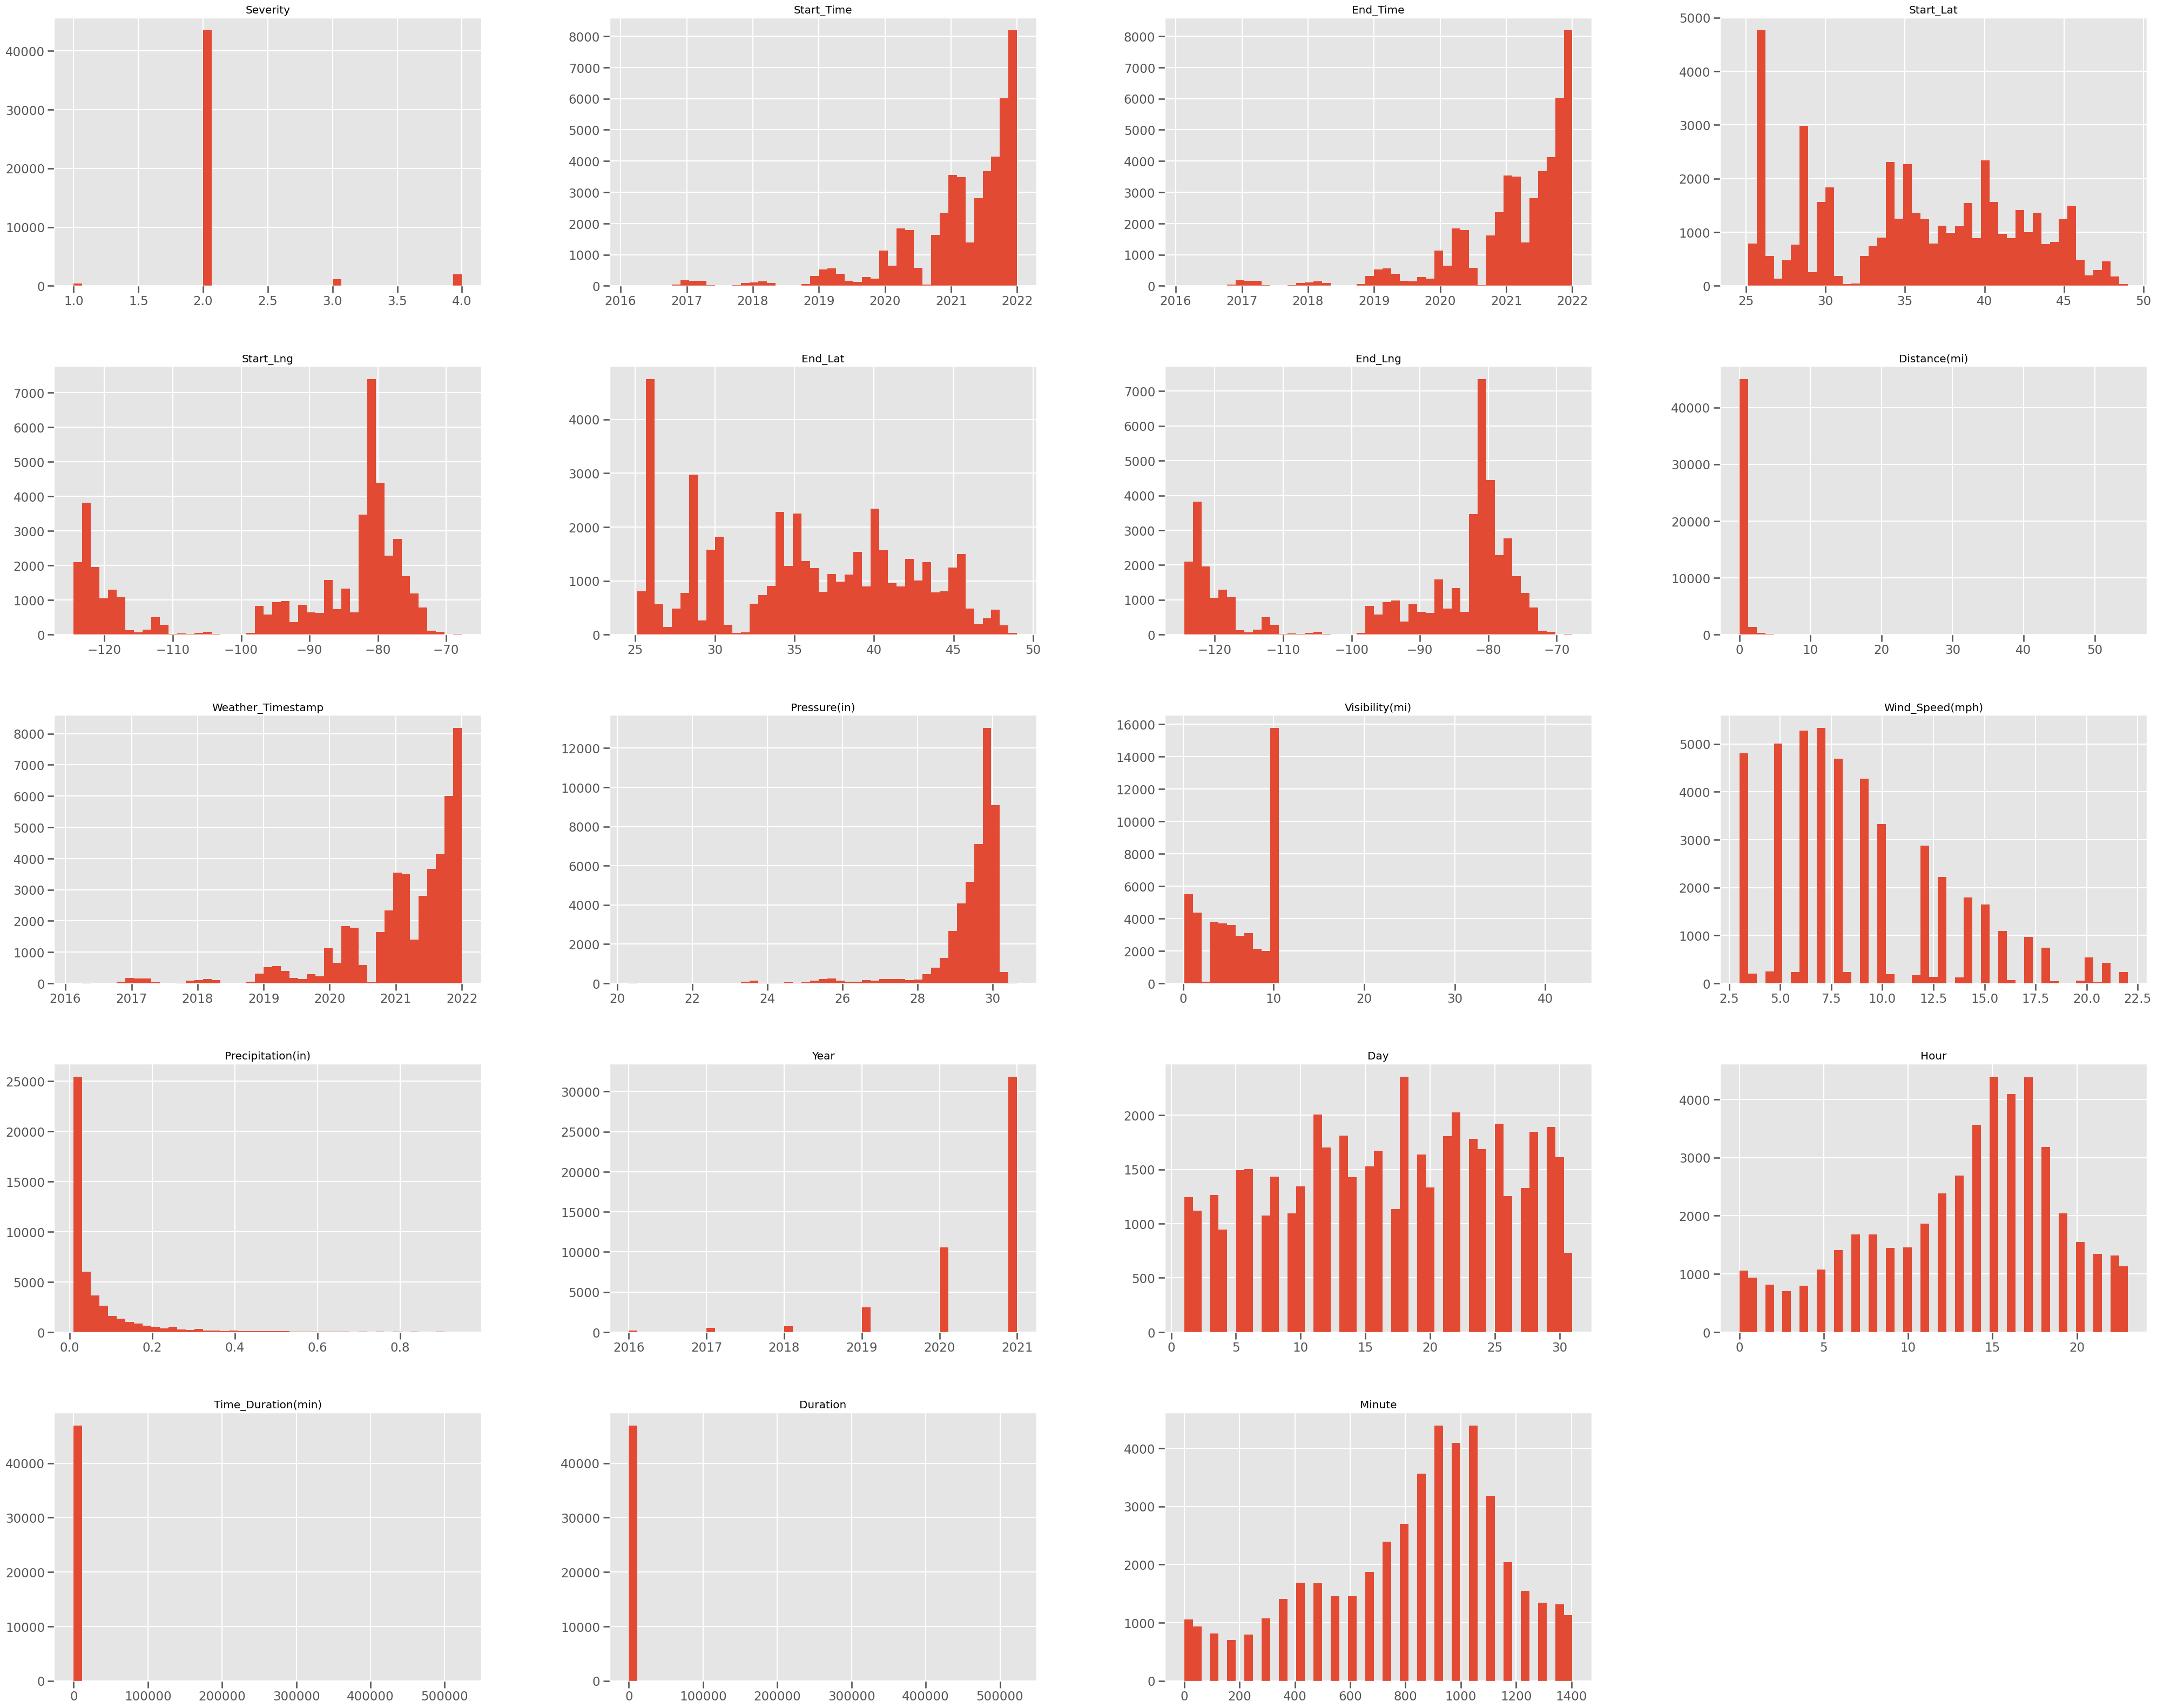

In [117]:
acs.hist(bins=45, figsize=(50,40))
plt.show()

In [118]:
categorical_names = ['Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Time', 'End_Time', 
              'End_Lat', 'End_Lng']

print("Unique count of categorical features:")

for i in categorical_names:
    
    print(i,acs[i].unique().size)

Unique count of categorical features:
Timezone 4
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2
Start_Time 34958
End_Time 42072
End_Lat 34531
End_Lng 34554


In [119]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47004 entries, 203 to 2844756
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Severity               47004 non-null  float64       
 1   Start_Time             47004 non-null  datetime64[ns]
 2   End_Time               47004 non-null  datetime64[ns]
 3   Start_Lat              47004 non-null  float64       
 4   Start_Lng              47004 non-null  float64       
 5   End_Lat                47004 non-null  float64       
 6   End_Lng                47004 non-null  float64       
 7   Distance(mi)           47004 non-null  float64       
 8   Description            47004 non-null  object        
 9   Street                 47004 non-null  object        
 10  Side                   47004 non-null  object        
 11  City                   47004 non-null  object        
 12  County                 47004 non-null  object        
 1

In [120]:
acs.isna().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
C

## Feature Selection

#### Feature Selection and Handling Imbalanced data

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


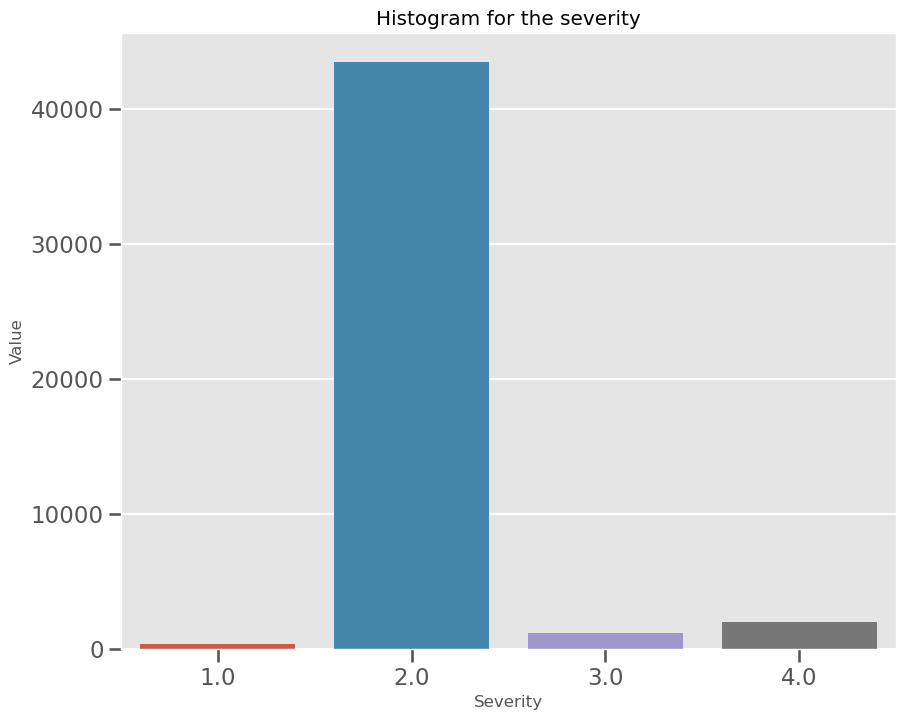

C:\Users\User\AppData\Local\Temp\ipykernel_22652\2943567010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acsdf = acsdf.append(S.sample(size, random_state=42))
C:\Users\User\AppData\Local\Temp\ipykernel_22652\2943567010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acsdf = acsdf.append(S.sample(size, random_state=42))
C:\Users\User\AppData\Local\Temp\ipykernel_22652\2943567010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acsdf = acsdf.append(S.sample(size, random_state=42))
C:\Users\User\AppData\Local\Temp\ipykernel_22652\2943567010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acsdf = acsdf.append(S.sample(

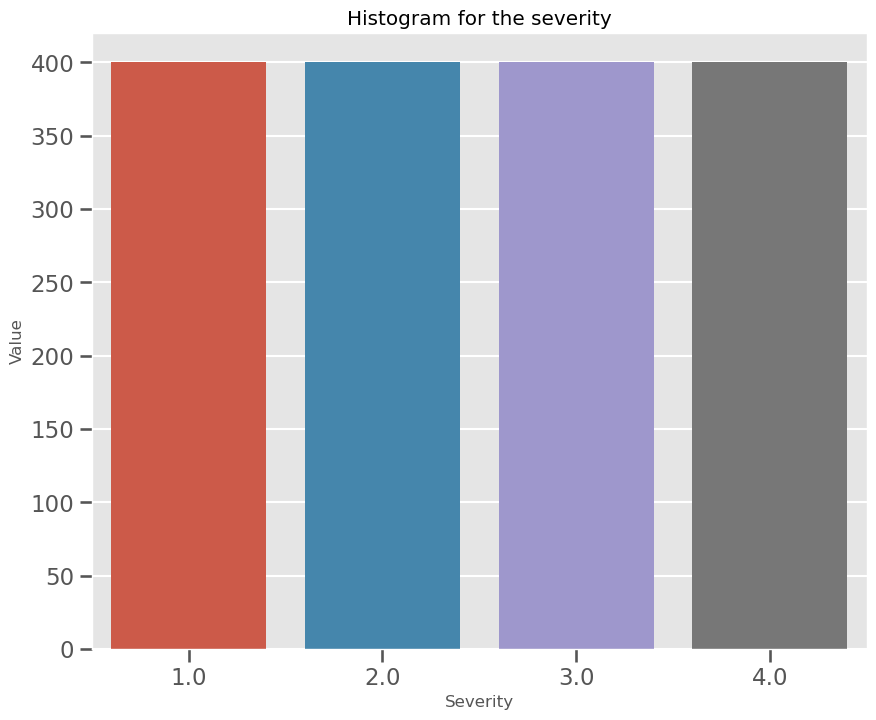

In [121]:
# note: some of the features have already been dropped

featureslist = ['Start_Time', 'End_Time', 'Distance(mi)', 'Description', 'Street','Side', 'Zipcode','Timezone','Airport_Code', 'Weather_Timestamp', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']
acs = acs.drop(featureslist, axis=1)
acs.head()

if 'Severity' in acs.columns:
    severity_counts = acs["Severity"].value_counts()

    plt.figure(figsize=(10, 8))
    plt.title("Histogram for the severity")
    sns.barplot(severity_counts.index, severity_counts.values)
    plt.xlabel("Severity")
    plt.ylabel("Value")
    plt.show()

    size = len(acs[acs['Severity']==1].index)
    acsdf= pd.DataFrame()
    for i in range(1,5):
        S = acs[acs['Severity']==i]
        acsdf = acsdf.append(S.sample(size, random_state=42))
    acs = acsdf

    severity_counts1 = acs["Severity"].value_counts()
    plt.figure(figsize=(10, 8))
    plt.title("Histogram for the severity")
    sns.barplot(severity_counts1.index, severity_counts1.values)
    plt.xlabel("Severity")
    plt.ylabel("Value")
    plt.show()
else:
    print("Error: Column 'Severity' not found in dataframe 'acs'")


In [122]:
acs.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'City',
       'County', 'State', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)',
       'Duration', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog', 'Minute'],
      dtype='object')

### Normalising values

In [123]:
scaler = MinMaxScaler()
features = ['Start_Lat', 'Start_Lng','End_Lat', 'End_Lng','Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

# Convert non-numeric string values to NaN and fill with mean
#for feature in features:
#    if acs[feature].dtype == 'object':
#        acs[feature] = pd.to_numeric(acs[feature], errors='coerce')
#        acs[feature].fillna(acs[feature].mean(), inplace=True)

acs[features] = scaler.fit_transform(acs[features])
acs.head()


Severity  Start_Lat  Start_Lng   End_Lat   End_Lng       City  \
2205241       1.0   0.471441   0.673022  0.471258  0.673170  Nashville   
2225630       1.0   0.543392   0.038519  0.543234  0.038529    Oakland   
2082126       1.0   0.860598   0.034190  0.860551  0.034200   Portland   
2205242       1.0   0.475447   0.675149  0.475266  0.675297  Nashville   
2122578       1.0   0.518441   0.043477  0.518274  0.043489  Los Gatos   

              County State  Pressure(in)  Visibility(mi) Wind_Direction  \
2205241     Davidson    TN      0.879377        0.897959              S   
2225630      Alameda    CA      0.957198        0.591837              E   
2082126    Multnomah    OR      0.928016        0.183673              W   
2205242     Davidson    TN      0.879377        0.897959              S   
2122578  Santa Clara    CA      0.915370        1.000000             SE   

         Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity  Bump  \
2205241         0.578947           0.000000        Light Rain      0.0   0.0   
2225630         0.157895           0.021505        Light Rain      0.0   0.0   
2082126         0.473684           0.107527           T-Storm      0.0   0.0   
2205242         0.578947           0.000000        Light Rain      0.0   0.0   
2122578         0.263158           0.000000     Mostly Cloudy      0.0   0.0   

         Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
2205241       0.0       0.0       0.0      0.0      0.0         0.0      0.0   
2225630       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2082126       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2205242       0.0       0.0       0.0      0.0      0.0         0.0      1.0   
2122578       0.0       0.0       1.0      0.0      0.0         0.0      0.0   

         Stop  Traffic_Calming  Traffic_Signal    Year Month   Day  Hour  \
2205241   0.0              0.0             0.0  2020.0   Mar  18.0  17.0   
2225630   0.0              0.0             1.0  2020.0   Mar  28.0   7.0   
2082126   0.0              0.0             1.0  2020.0   May  30.0  15.0   
2205242   0.0              0.0             1.0  2020.0   Mar  18.0  17.0   
2122578   0.0              0.0             0.0  2020.0   May  17.0   8.0   

        Weekday  Time_Duration(min)  Duration  Clear  Cloud   Rain  \
2205241     Wed                45.0      45.0  False  False   True   
2225630     Sat               374.0     374.0  False  False   True   
2082126     Sat                30.0      30.0  False  False   True   
2205242     Wed                65.0      65.0  False  False   True   
2122578     Sun                15.0      15.0  False   True  False   

         Heavy_Rain   Snow  Heavy_Snow    Fog  Minute  
2205241       False  False       False  False  1037.0  
2225630       False  False       False  False   427.0  
2082126       False  False       False  False   915.0  
2205242       False  False       False  False  1037.0  
2122578       False  False       False  False   488.0

## Feature encoding

Encode categorical features and show unique classes

In [124]:
categorical_features = set(["County","State","Wind_Direction", "Weather_Condition", "Month","Weekday"])

for cat in categorical_features:
    acs[cat] = acs[cat].astype("object")

acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 2205241 to 1197210
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Severity            1600 non-null   float64
 1   Start_Lat           1600 non-null   float64
 2   Start_Lng           1600 non-null   float64
 3   End_Lat             1600 non-null   float64
 4   End_Lng             1600 non-null   float64
 5   City                1600 non-null   object 
 6   County              1600 non-null   object 
 7   State               1600 non-null   object 
 8   Pressure(in)        1600 non-null   float64
 9   Visibility(mi)      1600 non-null   float64
 10  Wind_Direction      1600 non-null   object 
 11  Wind_Speed(mph)     1600 non-null   float64
 12  Precipitation(in)   1600 non-null   float64
 13  Weather_Condition   1600 non-null   object 
 14  Amenity             1600 non-null   float64
 15  Bump                1600 non-null   float64
 1

In [125]:
print("Unique classes for each object feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(acs[cat].unique()))

Unique classes for each object feature:
County          	 364
Weekday         	 7
State           	 42
Wind_Direction  	 9
Weather_Condition 	 34
Month           	 12


encode boolean values in numerical form

In [126]:
acs = acs.replace([True, False], [1, 0])

acs.head()

Severity  Start_Lat  Start_Lng   End_Lat   End_Lng       City  \
2205241       1.0   0.471441   0.673022  0.471258  0.673170  Nashville   
2225630       1.0   0.543392   0.038519  0.543234  0.038529    Oakland   
2082126       1.0   0.860598   0.034190  0.860551  0.034200   Portland   
2205242       1.0   0.475447   0.675149  0.475266  0.675297  Nashville   
2122578       1.0   0.518441   0.043477  0.518274  0.043489  Los Gatos   

              County State  Pressure(in)  Visibility(mi) Wind_Direction  \
2205241     Davidson    TN      0.879377        0.897959              S   
2225630      Alameda    CA      0.957198        0.591837              E   
2082126    Multnomah    OR      0.928016        0.183673              W   
2205242     Davidson    TN      0.879377        0.897959              S   
2122578  Santa Clara    CA      0.915370        1.000000             SE   

         Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity  Bump  \
2205241         0.578947           0.000000        Light Rain      0.0   0.0   
2225630         0.157895           0.021505        Light Rain      0.0   0.0   
2082126         0.473684           0.107527           T-Storm      0.0   0.0   
2205242         0.578947           0.000000        Light Rain      0.0   0.0   
2122578         0.263158           0.000000     Mostly Cloudy      0.0   0.0   

         Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
2205241       0.0       0.0       0.0      0.0      0.0         0.0      0.0   
2225630       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2082126       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2205242       0.0       0.0       0.0      0.0      0.0         0.0      1.0   
2122578       0.0       0.0       1.0      0.0      0.0         0.0      0.0   

         Stop  Traffic_Calming  Traffic_Signal    Year Month   Day  Hour  \
2205241   0.0              0.0             0.0  2020.0   Mar  18.0  17.0   
2225630   0.0              0.0             1.0  2020.0   Mar  28.0   7.0   
2082126   0.0              0.0             1.0  2020.0   May  30.0  15.0   
2205242   0.0              0.0             1.0  2020.0   Mar  18.0  17.0   
2122578   0.0              0.0             0.0  2020.0   May  17.0   8.0   

        Weekday  Time_Duration(min)  Duration  Clear  Cloud  Rain  Heavy_Rain  \
2205241     Wed                45.0      45.0      0      0     1           0   
2225630     Sat               374.0     374.0      0      0     1           0   
2082126     Sat                30.0      30.0      0      0     1           0   
2205242     Wed                65.0      65.0      0      0     1           0   
2122578     Sun                15.0      15.0      0      1     0           0   

         Snow  Heavy_Snow  Fog  Minute  
2205241     0           0    0  1037.0  
2225630     0           0    0   427.0  
2082126     0           0    0   915.0  
2205242     0           0    0  1037.0  
2122578     0           0    0   488.0

encode feature by one-hot encoding

In [127]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

# Turning categorical data into dummies
acs = pd.get_dummies(acs, columns=onehot_cols, drop_first=True)

acs.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22652\2332873784.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  acs = pd.get_dummies(acs, columns=onehot_cols, drop_first=True)


Severity  Start_Lat  Start_Lng   End_Lat   End_Lng       City  \
2205241       1.0   0.471441   0.673022  0.471258  0.673170  Nashville   
2225630       1.0   0.543392   0.038519  0.543234  0.038529    Oakland   
2082126       1.0   0.860598   0.034190  0.860551  0.034200   Portland   
2205242       1.0   0.475447   0.675149  0.475266  0.675297  Nashville   
2122578       1.0   0.518441   0.043477  0.518274  0.043489  Los Gatos   

         Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
2205241      0.879377        0.897959         0.578947           0.000000   
2225630      0.957198        0.591837         0.157895           0.021505   
2082126      0.928016        0.183673         0.473684           0.107527   
2205242      0.879377        0.897959         0.578947           0.000000   
2122578      0.915370        1.000000         0.263158           0.000000   

         Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
2205241      0.0   0.0       0.0       0.0       0.0      0.0      0.0   
2225630      0.0   0.0       1.0       0.0       0.0      0.0      0.0   
2082126      0.0   0.0       1.0       0.0       0.0      0.0      0.0   
2205242      0.0   0.0       0.0       0.0       0.0      0.0      0.0   
2122578      0.0   0.0       0.0       0.0       1.0      0.0      0.0   

         Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal    Year  \
2205241         0.0      0.0   0.0              0.0             0.0  2020.0   
2225630         0.0      0.0   0.0              0.0             1.0  2020.0   
2082126         0.0      0.0   0.0              0.0             1.0  2020.0   
2205242         0.0      1.0   0.0              0.0             1.0  2020.0   
2122578         0.0      0.0   0.0              0.0             0.0  2020.0   

          Day  Hour  Time_Duration(min)  Duration  Clear  Cloud  Rain  \
2205241  18.0  17.0                45.0      45.0      0      0     1   
2225630  28.0   7.0               374.0     374.0      0      0     1   
2082126  30.0  15.0                30.0      30.0      0      0     1   
2205242  18.0  17.0                65.0      65.0      0      0     1   
2122578  17.0   8.0                15.0      15.0      0      1     0   

         Heavy_Rain  Snow  Heavy_Snow  Fog  Minute  County_Adams  \
2205241           0     0           0    0  1037.0             0   
2225630           0     0           0    0   427.0             0   
2082126           0     0           0    0   915.0             0   
2205242           0     0           0    0  1037.0             0   
2122578           0     0           0    0   488.0             0   

         County_Aiken  County_Aitkin  County_Alameda  County_Albany  \
2205241             0              0               0              0   
2225630             0              0               1              0   
2082126             0              0               0              0   
2205242             0              0               0              0   
2122578             0              0               0              0   

         County_Albemarle  County_Alexander  County_Allegany  \
2205241                 0                 0                0   
2225630                 0                 0                0   
2082126                 0                 0                0   
2205242                 0                 0                0   
2122578                 0                 0                0   

         County_Allegheny  County_Allen  County_Alpena  County_Alpine  \
2205241                 0             0              0              0   
2225630                 0             0              0              0   
2082126                 0             0              0              0   
2205242                 0             0              0              0   
2122578                 0             0              0              0   

         County_Anderson  County_Anne Arundel  County_Arlington  \
2205241        

In [128]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(acs["City"])
city_binary_enc

City_0  City_1  City_2  City_3  City_4  City_5  City_6  City_7  \
2205241       0       0       0       0       0       0       0       0   
2225630       0       0       0       0       0       0       0       0   
2082126       0       0       0       0       0       0       0       0   
2205242       0       0       0       0       0       0       0       0   
2122578       0       0       0       0       0       0       0       1   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2358064       1       0       1       1       0       1       0       1   
1283433       0       0       1       0       0       1       1       0   
1674913       1       0       1       1       0       1       0       1   
934534        0       1       1       0       1       0       0       0   
1197210       1       0       1       1       0       1       1       0   

         City_8  City_9  
2205241       0       1  
2225630       1       0  
2082126       1       1  
2205242       0       1  
2122578       0       0  
...         ...     ...  
2358064       1       0  
1283433       0       1  
1674913       1       1  
934534        0       1  
1197210       0       0  

[1600 rows x 10 columns]

In [129]:
acs = pd.concat([acs, city_binary_enc], axis=1).drop("City", axis=1)

acs.head()

Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  Pressure(in)  \
2205241       1.0   0.471441   0.673022  0.471258  0.673170      0.879377   
2225630       1.0   0.543392   0.038519  0.543234  0.038529      0.957198   
2082126       1.0   0.860598   0.034190  0.860551  0.034200      0.928016   
2205242       1.0   0.475447   0.675149  0.475266  0.675297      0.879377   
2122578       1.0   0.518441   0.043477  0.518274  0.043489      0.915370   

         Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  \
2205241        0.897959         0.578947           0.000000      0.0   0.0   
2225630        0.591837         0.157895           0.021505      0.0   0.0   
2082126        0.183673         0.473684           0.107527      0.0   0.0   
2205242        0.897959         0.578947           0.000000      0.0   0.0   
2122578        1.000000         0.263158           0.000000      0.0   0.0   

         Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
2205241       0.0       0.0       0.0      0.0      0.0         0.0      0.0   
2225630       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2082126       1.0       0.0       0.0      0.0      0.0         0.0      0.0   
2205242       0.0       0.0       0.0      0.0      0.0         0.0      1.0   
2122578       0.0       0.0       1.0      0.0      0.0         0.0      0.0   

         Stop  Traffic_Calming  Traffic_Signal    Year   Day  Hour  \
2205241   0.0              0.0             0.0  2020.0  18.0  17.0   
2225630   0.0              0.0             1.0  2020.0  28.0   7.0   
2082126   0.0              0.0             1.0  2020.0  30.0  15.0   
2205242   0.0              0.0             1.0  2020.0  18.0  17.0   
2122578   0.0              0.0             0.0  2020.0  17.0   8.0   

         Time_Duration(min)  Duration  Clear  Cloud  Rain  Heavy_Rain  Snow  \
2205241                45.0      45.0      0      0     1           0     0   
2225630               374.0     374.0      0      0     1           0     0   
2082126                30.0      30.0      0      0     1           0     0   
2205242                65.0      65.0      0      0     1           0     0   
2122578                15.0      15.0      0      1     0           0     0   

         Heavy_Snow  Fog  Minute  County_Adams  County_Aiken  County_Aitkin  \
2205241           0    0  1037.0             0             0              0   
2225630           0    0   427.0             0             0              0   
2082126           0    0   915.0             0             0              0   
2205242           0    0  1037.0             0             0              0   
2122578           0    0   488.0             0             0              0   

         County_Alameda  County_Albany  County_Albemarle  County_Alexander  \
2205241               0              0                 0                 0   
2225630               1              0                 0                 0   
2082126               0              0                 0                 0   
2205242               0              0                 0                 0   
2122578               0              0                 0                 0   

         County_Allegany  County_Allegheny  County_Allen  County_Alpena  \
2205241                0                 0             0              0   
2225630                0                 0             0              0   
2082126                0                 0             0              0   
2205242                0                 0             0              0   
2122578                0                 0             0              0   

         County_Alpine  County_Anderson  County_Anne Arundel  \
2205241              0                0                    0   
2225630              0                0                    0   
2082126              0                0                    0   
2205242              0                0          

Due to continous layer error. "Severity" is rounded to the nearest float

In [130]:
acs['Severity'] = acs['Severity'].round().astype(float)

In [131]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 2205241 to 1197210
Columns: 506 entries, Severity to City_9
dtypes: float64(27), int64(17), uint8(462)
memory usage: 1.3 MB


# Modelling

## train_test_split

In [132]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [133]:
X, X_test = train_test_split(acs, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(1280, 506) (320, 506)


In [134]:
sample = acs

target = 'Severity'

y_sample = sample[target]
X_sample = sample.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 505) (1200,)
(400, 505) (400,)


## Algorithms

### Logistic Regression

In [135]:
%%time

lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'newton-cg'}
Train score: 0.925
Validation score: 0.8
Wall time: 13.6 s


In [136]:
%%time

print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_test, y_test))

Default scores:
Train score: 0.39166666666666666
Validation score: 0.3825
Wall time: 1.22 s


In [137]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0       4.672431      0.196456         0.025047        0.027148    newton-cg   
1       2.345768      0.192465         0.032065        0.036054          sag   
2       2.065586      0.416702         0.005205        0.001162         saga   

                    params  split0_test_score  split1_test_score  \
0  {'solver': 'newton-cg'}           0.850000           0.825000   
1        {'solver': 'sag'}           0.366667           0.404167   
2       {'solver': 'saga'}           0.366667           0.408333   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.791667           0.816667             0.8125         0.819167   
1           0.379167           0.395833             0.3125         0.371667   
2           0.379167           0.383333             0.3250         0.372500   

   std_test_score  rank_test_score  
0        0.018930                1  
1        0.032318                3  
2        0.027335                2

In [138]:
%%time

y_pred = lr.predict(X_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.42      0.79      0.55       301
         2.0       0.51      0.34      0.40       293
         3.0       0.17      0.09      0.12       305
         4.0       0.39      0.35      0.37       301

    accuracy                           0.39      1200
   macro avg       0.37      0.39      0.36      1200
weighted avg       0.37      0.39      0.36      1200

              precision    recall  f1-score   support

         1.0       0.44      0.82      0.57        99
         2.0       0.41      0.28      0.33       107
         3.0       0.19      0.09      0.13        95
         4.0       0.35      0.33      0.34        99

    accuracy                           0.38       400
   macro avg       0.35      0.38      0.34       400
weighted avg       0.35      0.38      0.34       400

Wall time: 22.3 ms


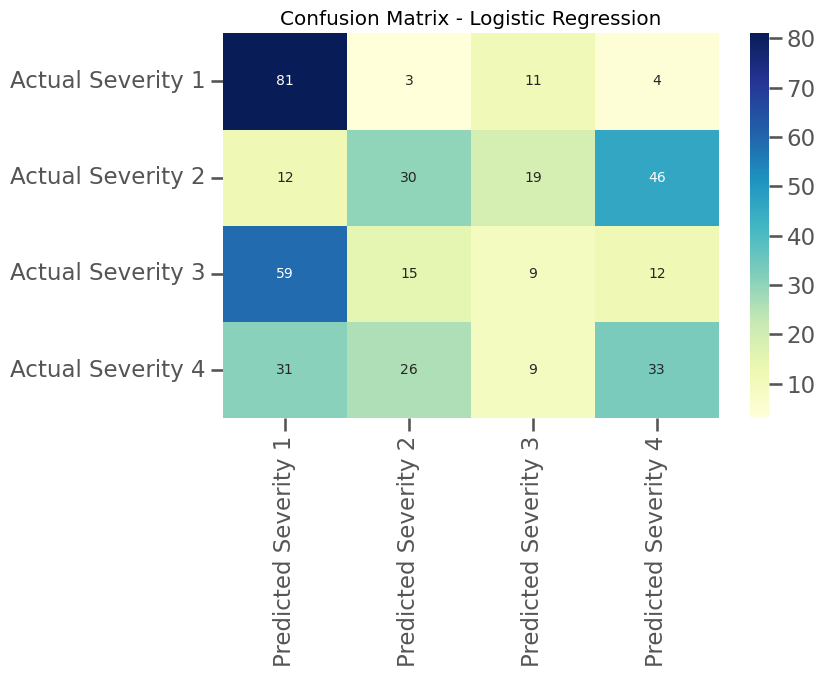

In [139]:
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

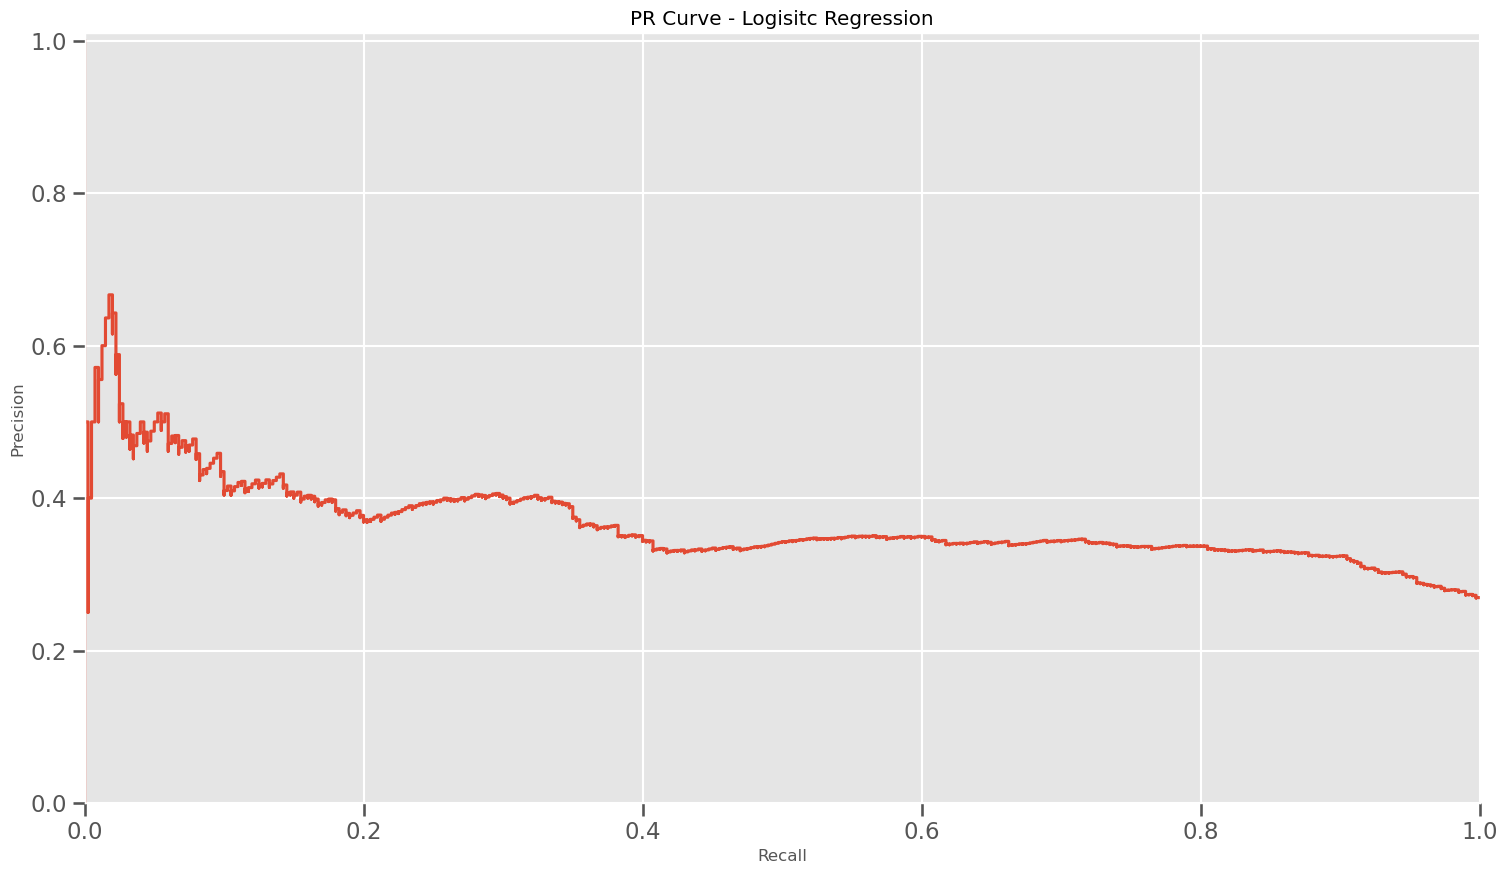

In [140]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_test)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

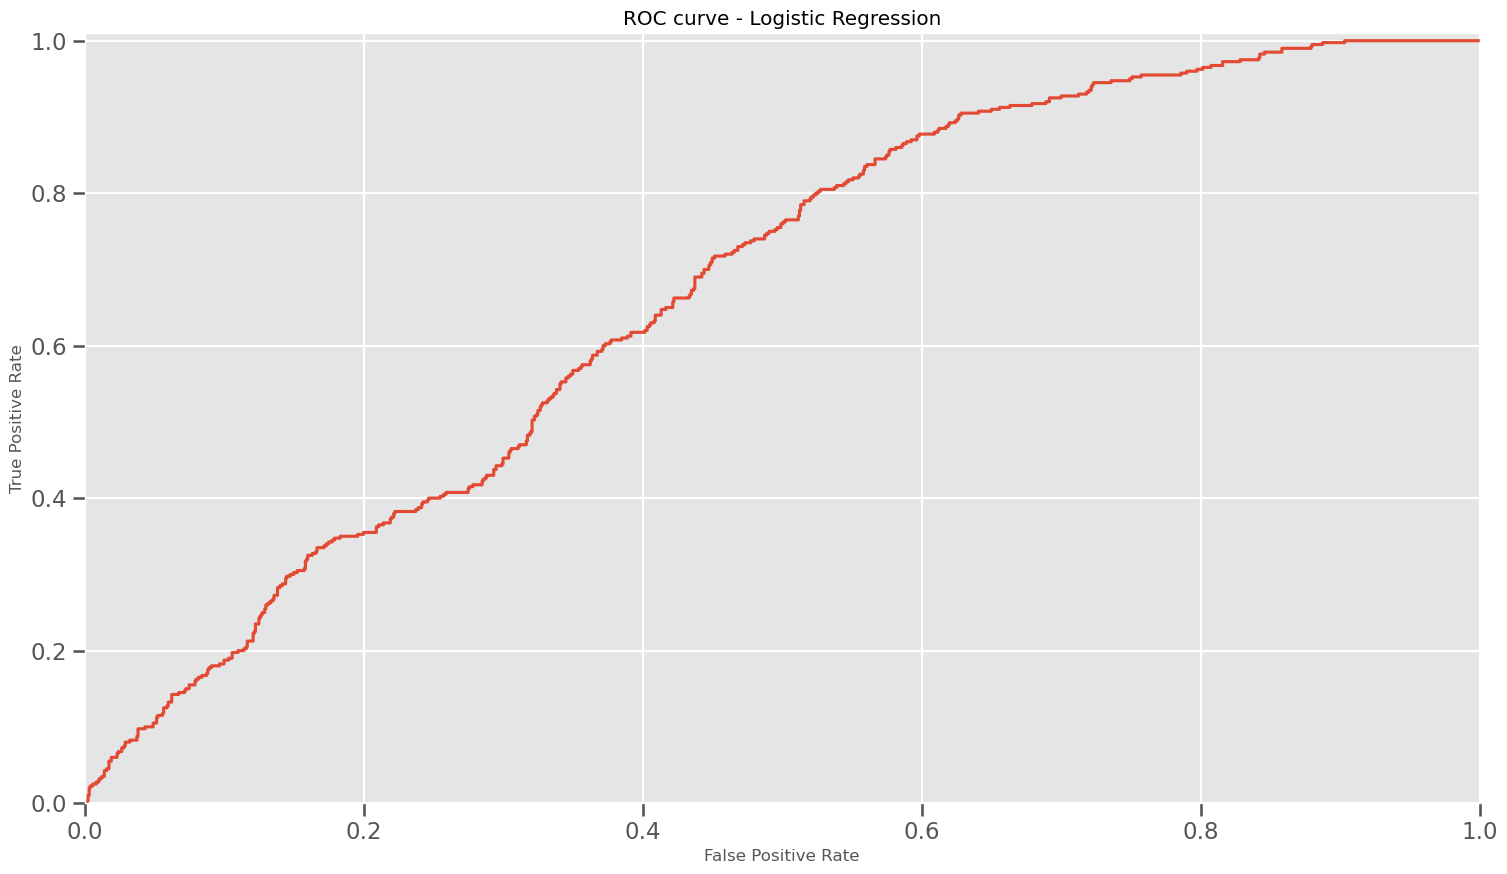

In [141]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

### Support Vector Machine

In [142]:
%%time

parameters = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]
svc = svm.SVC(verbose=5, random_state=42)
grid = GridSearchCV(svc, parameters, verbose=5, n_jobs=-1)

sample = acs.sample(min(5_000, len(acs)),replace = False, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)
grid.fit(X_sample, y_sample)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_sample, y_sample))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LibSVM]Best parameters scores:
{'C': 0.2, 'kernel': 'linear'}
Train score: 0.890625
Wall time: 14min 30s


In [143]:

print("Default scores:")
svc.fit(X_sample, y_sample)
print("Train score:", svc.score(X_sample, y_sample))

Default scores:
[LibSVM]Train score: 0.320625


In [144]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      230.820232     72.712875         0.043379        0.003844     0.2   
3      306.588211    143.112386         0.040481        0.001997     0.5   
6      271.941947     69.739257         0.040172        0.004418     0.8   
9      243.775032     52.497707         0.030353        0.005144     1.0   
23       0.533219      0.033714         0.096157        0.009125     1.0   
10       0.519043      0.006232         0.893939        0.012240     1.0   
21       0.561984      0.025264         0.104060        0.007426     1.0   
20       0.545713      0.033959         0.108256        0.010202     0.8   
7        0.556413      0.024041         0.386709        0.280534     0.8   
22       0.569285      0.011997         0.111179        0.009998     1.0   
11       0.626341      0.037666         0.105252        0.010536     1.0   
18       0.592085      0.020216         0.099840        0.010236     0.8   
19       0.577013      0.013738         0.108376        0.004808     0.8   
17       0.576564      0.008890         0.101903        0.011813     0.5   
4        0.524683      0.007407         0.888282        0.010113     0.5   
16       0.571956      0.010514         0.105395        0.005581     0.5   
8        0.648875      0.035189         0.110638        0.009558     0.8   
1        0.579191      0.062322         0.360456        0.268013     0.2   
15       0.593316      0.012349         0.110360        0.007066     0.5   
12       0.598134      0.018991         0.097916        0.010283     0.2   
14       0.574996      0.009388         0.100022        0.007301     0.2   
13       0.576776      0.014433         0.098182        0.009573     0.2   
5        0.561162      0.010612         0.091583        0.003088     0.5   
2        0.673566      0.039750         0.139720        0.013877     0.2   

   param_kernel param_degree                                     params  \
0        linear          NaN             {'C': 0.2, 'kernel': 'linear'}   
3        linear          NaN             {'C': 0.5, 'kernel': 'linear'}   
6        linear          NaN             {'C': 0.8, 'kernel': 'linear'}   
9        linear          NaN             {'C': 1.0, 'kernel': 'linear'}   
23         poly            4  {'C': 1.0, 'degree': 4, 'kernel': 'poly'}   
10          rbf          NaN                {'C': 1.0, 'kernel': 'rbf'}   
21         poly            2  {'C': 1.0, 'degree': 2, 'kernel': 'poly'}   
20         poly            4  {'C': 0.8, 'degree': 4, 'kernel': 'poly'}   
7           rbf          NaN                {'C': 0.8, 'kernel': 'rbf'}   
22         poly            3  {'C': 1.0, 'degree': 3, 'kernel': 'poly'}   
11      sigmoid          NaN            {'C': 1.0, 'kernel': 'sigmoid'}   
18         poly            2  {'C': 0.8, 'degree': 2, 'kernel': 'poly'}   
19         poly            3  {'C': 0.8, 'degree': 3, 'kernel': 'poly'}   
17         poly            4  {'C': 0.5, 'degree': 4, 'kernel': 'poly'}   
4           rbf          NaN                {'C': 0.5, 'kernel': 'rbf'}   
16         poly            3  {'C': 0.5, 'degree': 3, 'kernel': 'poly'}   
8       sigmoid          NaN            {'C': 0.8, 'kernel': 'sigmoid'}   
1           rbf          NaN                {'C': 0.2, 'kernel': 'rbf'}   
15         poly            2  {'C': 0.5, 'degree': 2, 'kernel': 'poly'}   
12         poly            2  {'C': 0.2, 'degree': 2, 'kernel': 'poly'}   
14         poly            4  {'C': 0.2, 'degree': 4, 'kernel': 'poly'}   
13         poly            3  {'C': 0.2, 'degree': 3, 'kernel': 'poly'}   
5       sigmoid          NaN            {'C': 0.5, 'kernel': 'sigmoid'}   
2       sigmoid          NaN            {'C': 0.2, 'kernel': 'sigmoid'}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.840625           0.853125           0.871875   
3            0.828125           0.843750           0.859375   
6            0.825000           0.8343

In [145]:
sample = acs.sample(min(10_000, len(acs)),  replace = False, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1280, 505) (1280,)
(320, 505) (320,)


In [146]:
%%time

svc = svm.SVC(**grid.best_params_, random_state=42)
svc.fit(X_train, y_train)

print("Train score:", svc.score(X_train, y_train))
print("Validation score:", svc.score(X_test, y_test))

Train score: 0.8875
Validation score: 0.859375
Wall time: 45.9 s


In [147]:
y_pred = svc.predict(X_test)

accuracy["SVM"] = accuracy_score(y_test, y_pred)
f1["SVM"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, svc.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.90      0.98      0.94       309
         2.0       0.88      0.91      0.90       335
         3.0       0.83      0.89      0.86       318
         4.0       0.96      0.77      0.86       318

    accuracy                           0.89      1280
   macro avg       0.89      0.89      0.89      1280
weighted avg       0.89      0.89      0.89      1280

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95        91
         2.0       0.85      0.89      0.87        65
         3.0       0.77      0.88      0.82        82
         4.0       0.89      0.71      0.79        82

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



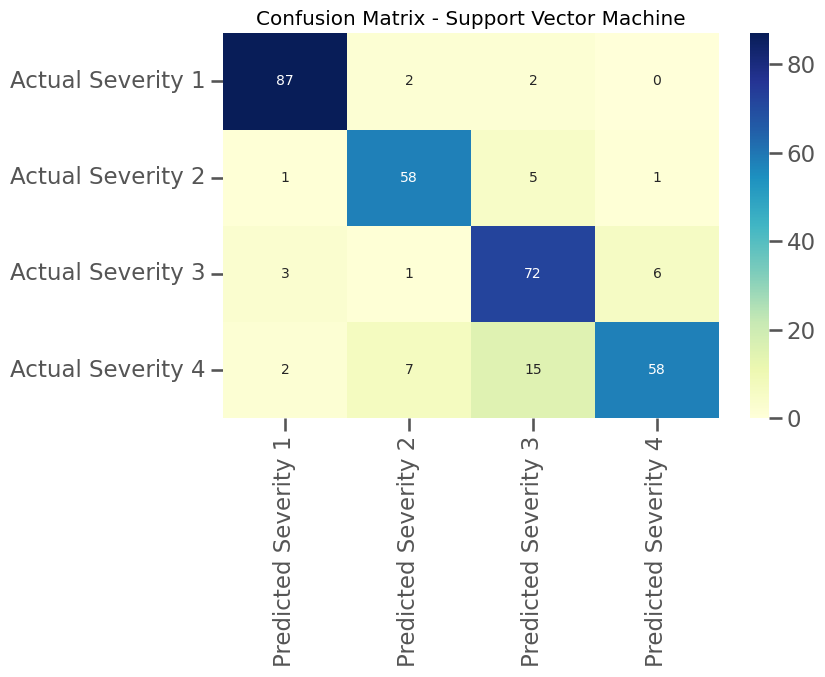

In [148]:
y_pred = svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

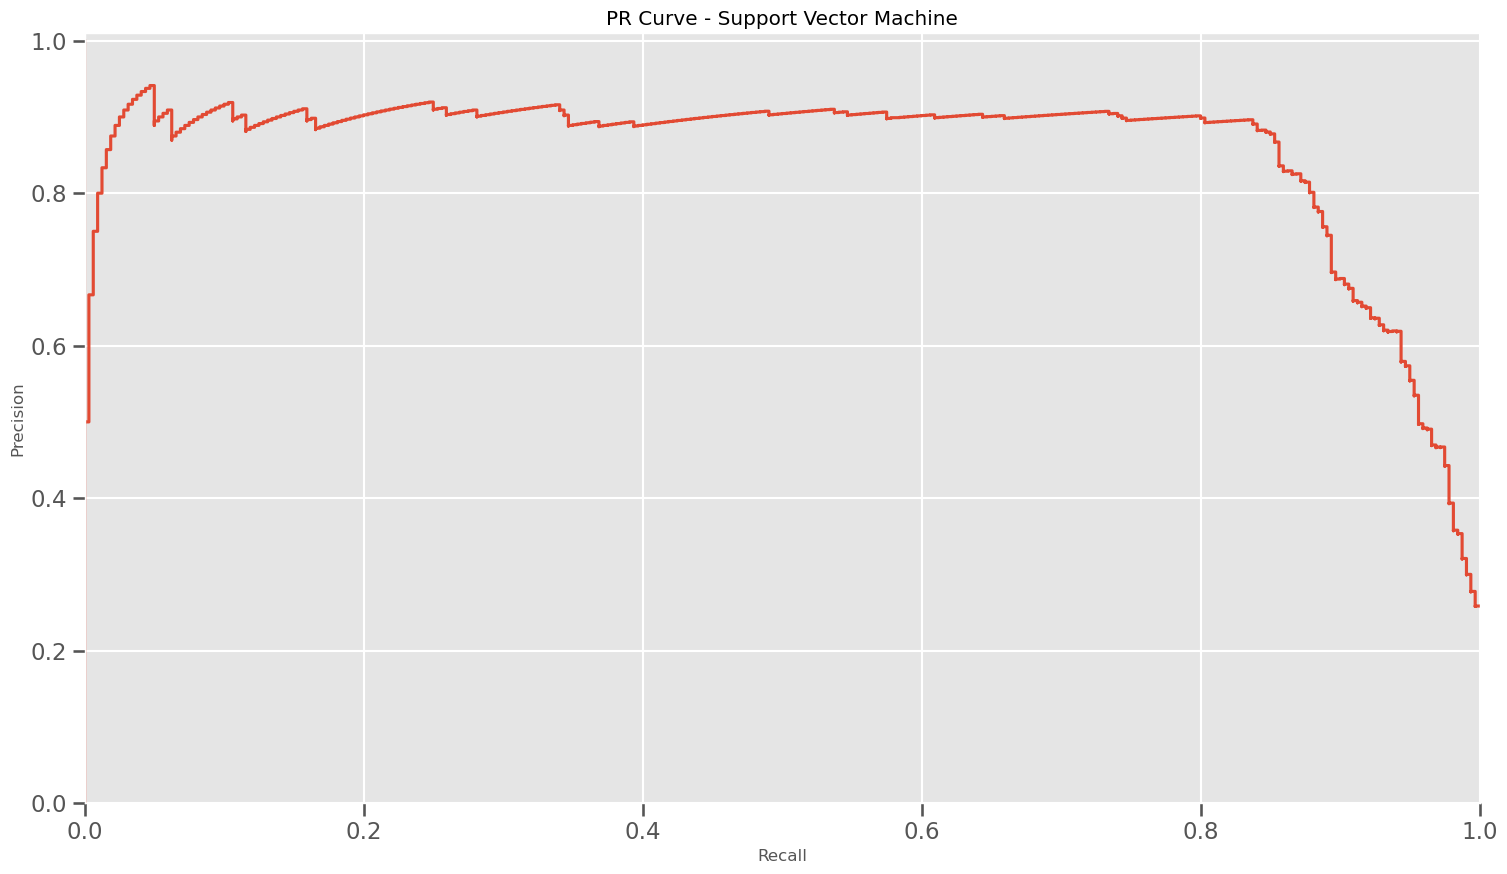

In [149]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = svc.decision_function(X_test)

precision["SVM"], recall["SVM"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["SVM"], tpr["SVM"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["SVM"], precision["SVM"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Support Vector Machine")
plt.show()

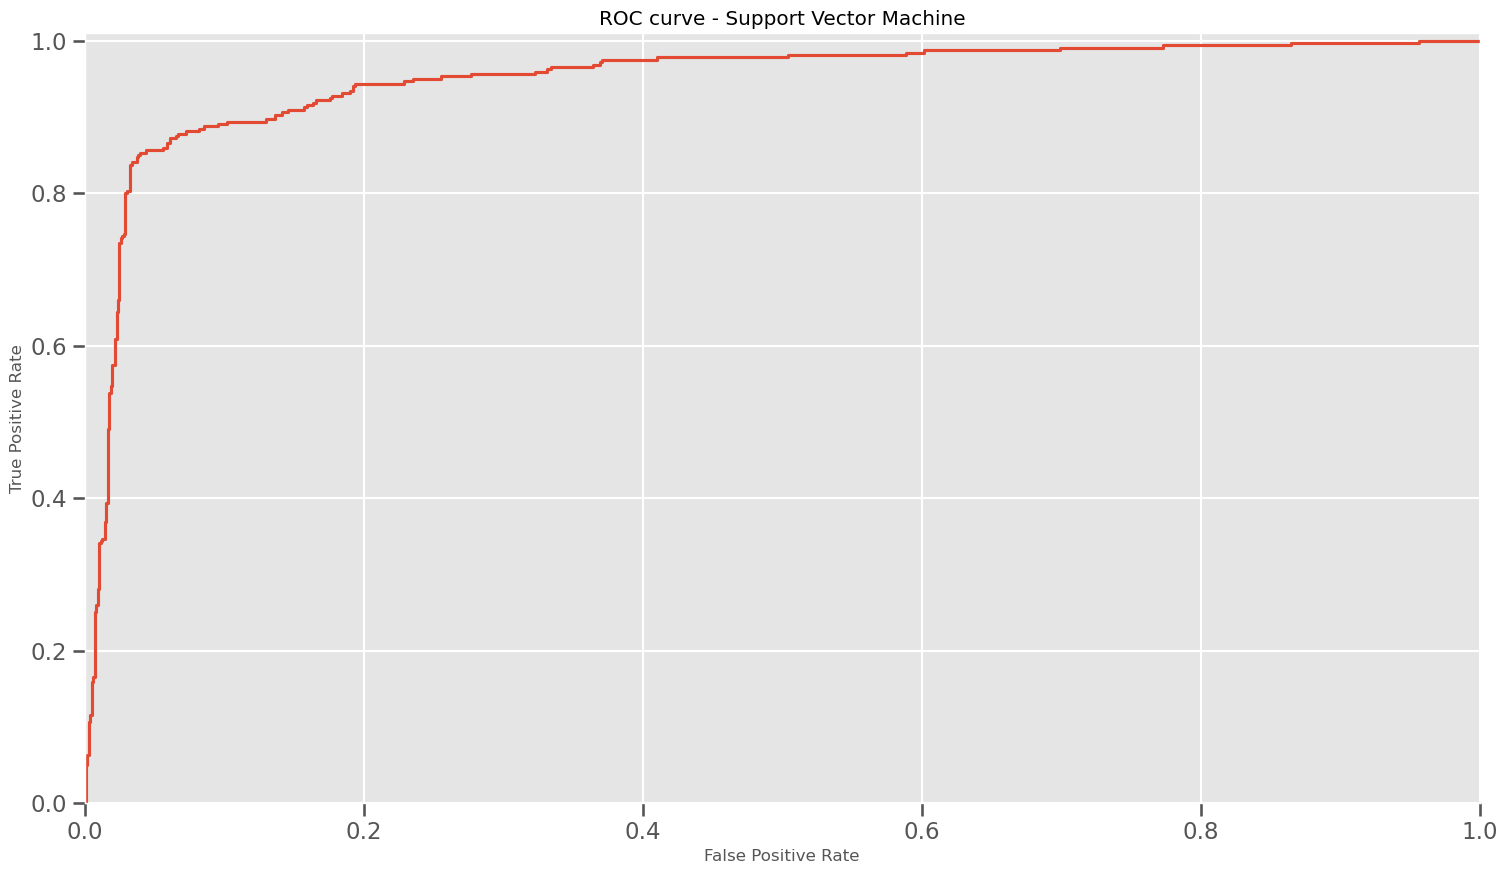

In [150]:
plt.figure(figsize=(18, 10))
plt.step(fpr["SVM"], tpr["SVM"], where="post")

plt.title("ROC curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

### Decision Tree

In [151]:
sample = acs
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 505) (1200,)
(400, 505) (400,)


In [152]:
%%time

dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'gini', 'max_depth': 10}
Train score: 0.9583333333333334
Validation score: 0.8325
Wall time: 779 ms


In [153]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.044608      0.007030         0.008676        0.001298   
2       0.049412      0.005229         0.014807        0.006699   
5       0.054025      0.009668         0.010081        0.003646   
6       0.062171      0.011674         0.012630        0.004807   
3       0.058592      0.012593         0.011968        0.004447   
7       0.061294      0.009330         0.010278        0.002437   
4       0.047801      0.008220         0.011068        0.002551   
0       0.052703      0.023875         0.011984        0.007643   

  param_criterion param_max_depth                                     params  \
1            gini              10     {'criterion': 'gini', 'max_depth': 10}   
2            gini              15     {'criterion': 'gini', 'max_depth': 15}   
5         entropy              10  {'criterion': 'entropy', 'max_depth': 10}   
6         entropy              15  {'criterion': 'entropy', 'max_depth': 15}   
3            gini              30     {'criterion': 'gini', 'max_depth': 30}   
7         entropy              30  {'criterion': 'entropy', 'max_depth': 30}   
4         entropy               5   {'criterion': 'entropy', 'max_depth': 5}   
0            gini               5      {'criterion': 'gini', 'max_depth': 5}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
1           0.883333           0.862500           0.837500           0.850000   
2           0.854167           0.862500           0.820833           0.854167   
5           0.854167           0.850000           0.791667           0.862500   
6           0.837500           0.883333           0.808333           0.841667   
3           0.854167           0.870833           0.800000           0.841667   
7           0.837500           0.850000           0.766667           0.858333   
4           0.870833           0.833333           0.812500           0.804167   
0           0.850000           0.820833           0.800000           0.816667   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
1           0.837500         0.854167        0.017280                1  
2           0.808333         0.840000        0.021344                2  
5           0.841667         0.840000        0.025083                2  
6           0.829167         0.840000        0.024523                2  
3           0.812500         0.835833        0.026167                5  
7           0.829167         0.828333        0.032425                6  
4           0.800000         0.824167        0.026007                7  
0           0.766667         0.810833        0.027335                8

In [154]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_test, y_test))

Default scores:
Train score: 1.0
Validation score: 0.835


In [155]:
y_pred = dtc.predict(X_test)

accuracy["Decision Tree"] = accuracy_score(y_test, y_pred)
f1["Decision Tree"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       301
         2.0       1.00      1.00      1.00       293
         3.0       1.00      1.00      1.00       305
         4.0       1.00      1.00      1.00       301

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

              precision    recall  f1-score   support

         1.0       0.87      0.91      0.89        99
         2.0       0.91      0.86      0.88       107
         3.0       0.71      0.83      0.76        95
         4.0       0.88      0.74      0.80        99

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



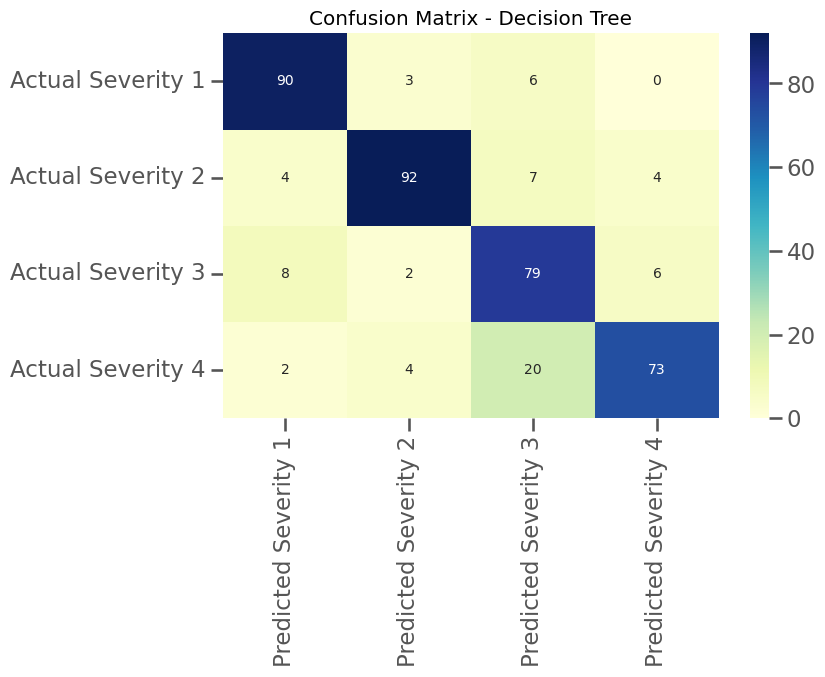

In [156]:
y_pred = dtc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

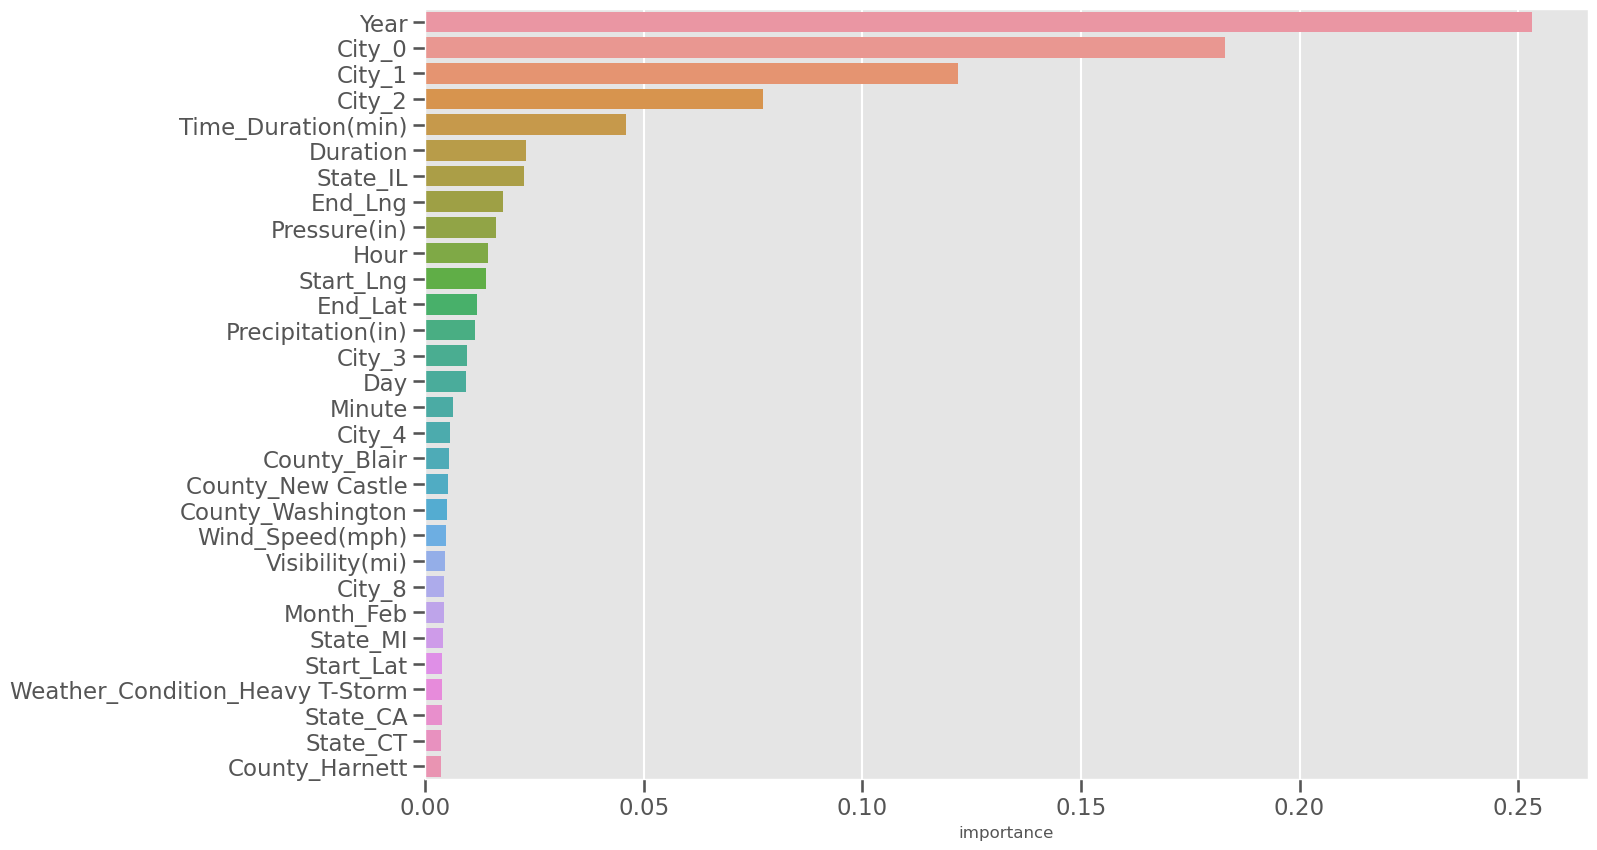

In [157]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

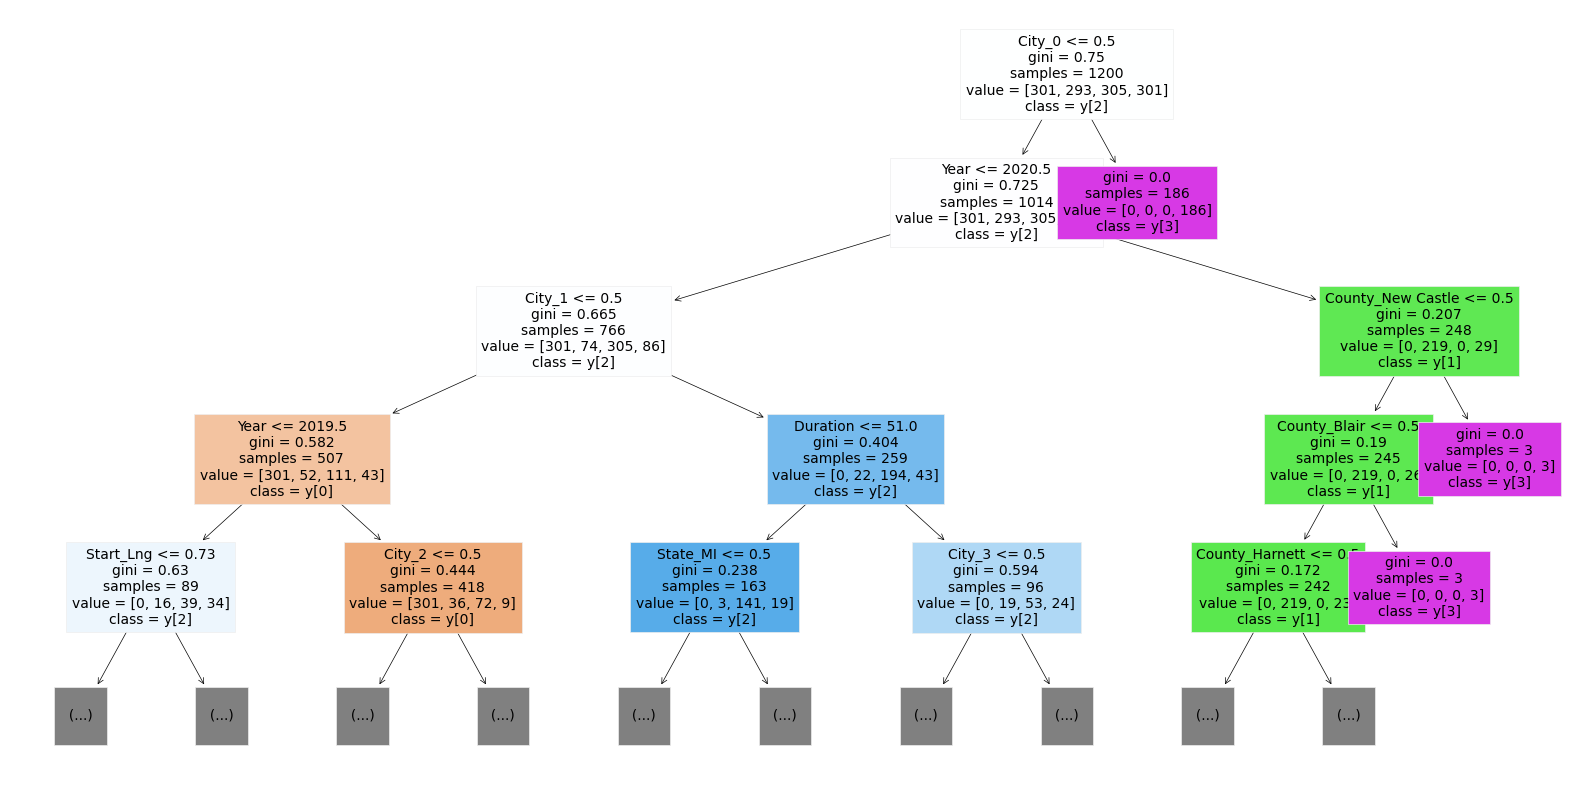

In [158]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

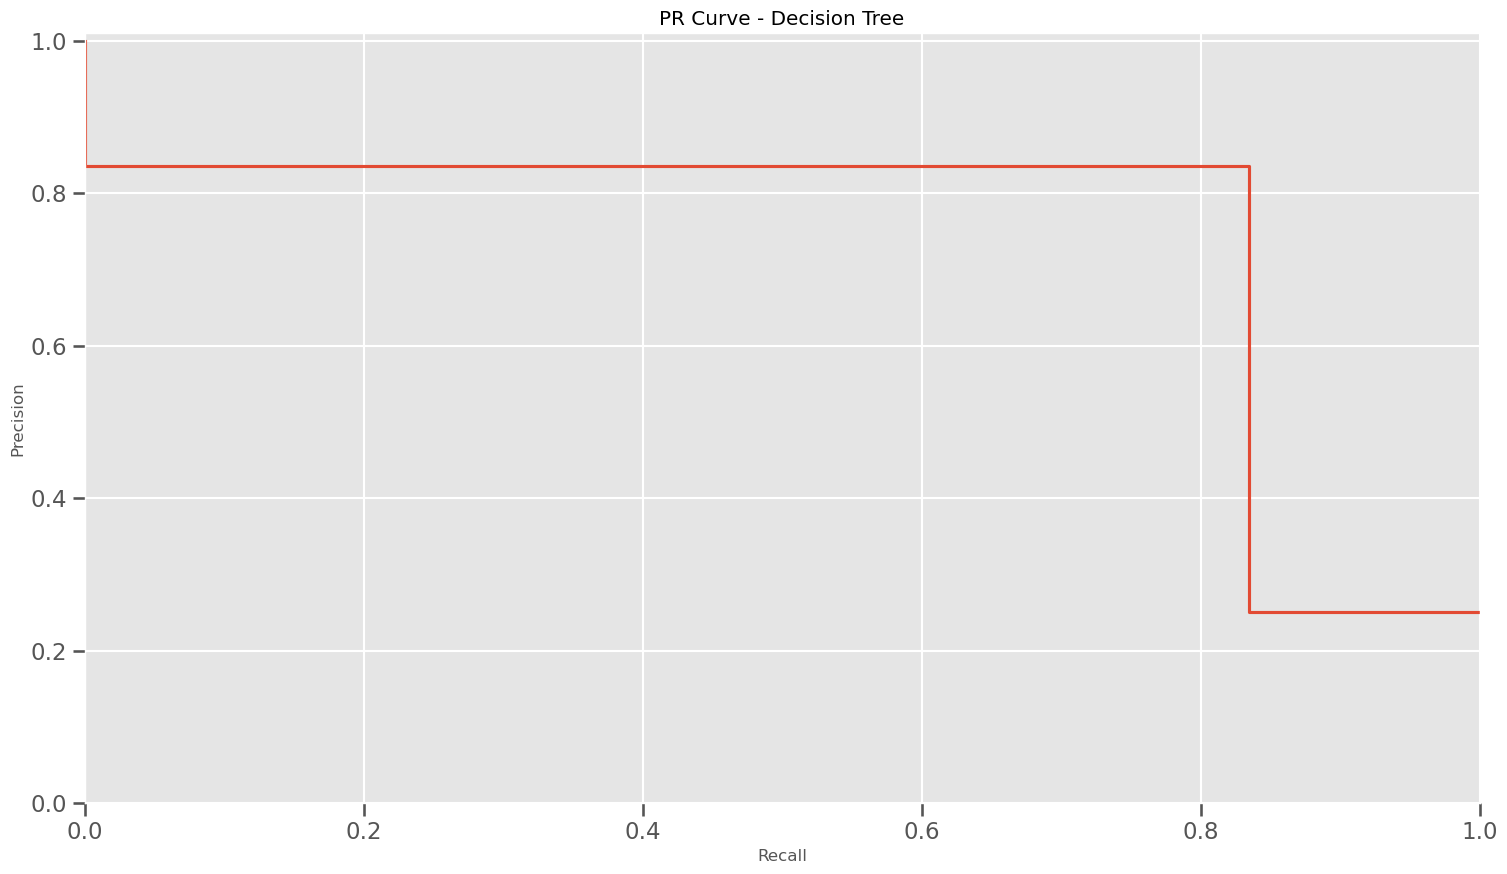

In [159]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_test)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

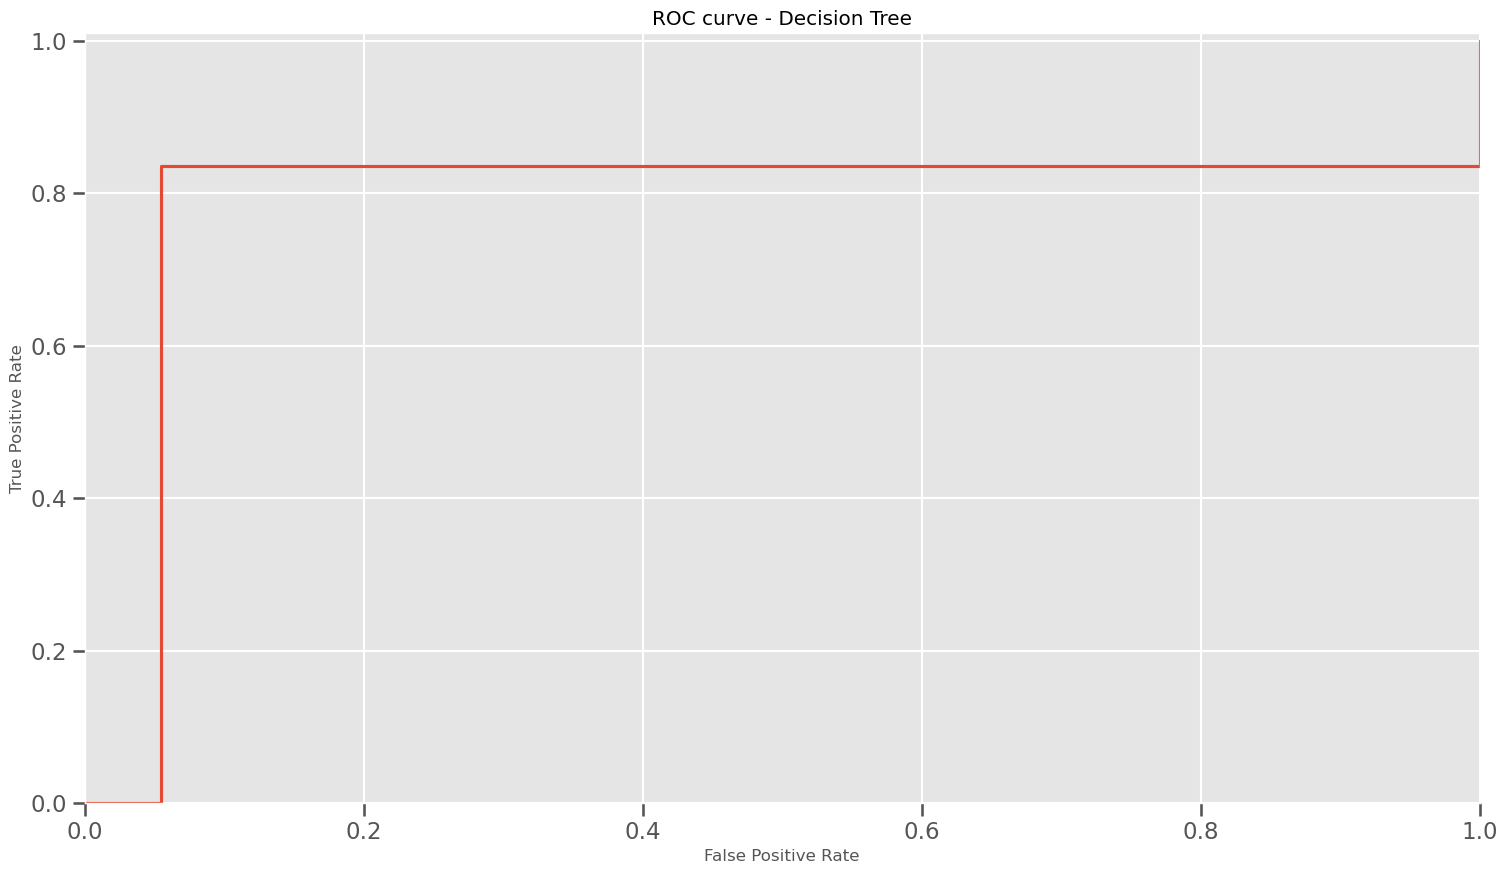

In [160]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#### Random Forest

In [161]:
sample1 = acs
y_sample = sample1["Severity"]
X_sample = sample1.drop("Severity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 505) (1200,)
(400, 505) (400,)


In [162]:
%%time

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 15, 'n_estimators': 100}
Train score: 0.9933333333333333
Validation score: 0.83
Wall time: 14.5 s


In [163]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_test, y_test))

Default scores:
Train score: 1.0
Validation score: 0.8325


In [164]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9        0.659524      0.104967         0.109281        0.023119   
11       2.582257      0.229913         0.237574        0.033955   
13       0.801492      0.136843         0.202756        0.159343   
14       1.170458      0.103606         0.137436        0.059994   
10       1.085633      0.166127         0.160529        0.056594   
8        0.623470      0.255320         0.152243        0.094430   
12       0.467200      0.398595         0.167154        0.199341   
15       2.264395      0.086746         0.179451        0.042528   
5        0.382166      0.062237         0.084555        0.018766   
6        0.794327      0.143631         0.124678        0.031886   
7        2.059211      0.301040         0.246797        0.024612   
4        0.285356      0.029423         0.071744        0.024606   
3        1.609560      0.115897         0.186905        0.012652   
2        0.705571      0.096298         0.139616        0.051547   
1        0.404289      0.146525         0.070131        0.009979   
0        0.186074      0.031170         0.058926        0.010893   

   param_max_depth param_n_estimators                                  params  \
9               15                100  {'max_depth': 15, 'n_estimators': 100}   
11              15                500  {'max_depth': 15, 'n_estimators': 500}   
13              30                100  {'max_depth': 30, 'n_estimators': 100}   
14              30                200  {'max_depth': 30, 'n_estimators': 200}   
10              15                200  {'max_depth': 15, 'n_estimators': 200}   
8               15                 50   {'max_depth': 15, 'n_estimators': 50}   
12              30                 50   {'max_depth': 30, 'n_estimators': 50}   
15              30                500  {'max_depth': 30, 'n_estimators': 500}   
5               10                100  {'max_depth': 10, 'n_estimators': 100}   
6               10                200  {'max_depth': 10, 'n_estimators': 200}   
7               10                500  {'max_depth': 10, 'n_estimators': 500}   
4               10                 50   {'max_depth': 10, 'n_estimators': 50}   
3                5                500   {'max_depth': 5, 'n_estimators': 500}   
2                5                200   {'max_depth': 5, 'n_estimators': 200}   
1                5                100   {'max_depth': 5, 'n_estimators': 100}   
0                5                 50    {'max_depth': 5, 'n_estimators': 50}   

    split0_test_score  split1_test_score  split2_test_score  \
9            0.875000           0.862500           0.808333   
11           0.862500           0.866667           0.808333   
13           0.866667           0.862500           0.812500   
14           0.866667           0.858333           0.812500   
10           0.858333           0.870833           0.820833   
8            0.862500           0.862500           0.812500   
12           0.862500           0.858333           0.812500   
15           0.875000           0.858333           0.804167   
5            0.850000           0.858333           0.804167   
6            0.850000           0.862500           0.804167   
7            0.854167           0.870833           0.800000   
4            0.845833           0.875000           0.791667   
3            0.845833           0.820833           0.783333   
2            0.845833           0.829167           0.775000   
1            0.833333           0.816667           0.783333   
0            0.816667           0.825000           0.758333   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
9            0.875000           0.870833         0.858333        0.025413   
11           0.866667           0.862500         0.853333        0.022577   
13           0.862500           0.858333         0.852500        0.020173   
14           0.866667           0.858333         0.852500        0.020344   
10          

In [165]:
y_pred = rfc.predict(X_test)

accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       301
         2.0       1.00      1.00      1.00       293
         3.0       1.00      1.00      1.00       305
         4.0       1.00      1.00      1.00       301

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

              precision    recall  f1-score   support

         1.0       0.84      0.93      0.88        99
         2.0       0.88      0.85      0.86       107
         3.0       0.73      0.84      0.78        95
         4.0       0.91      0.71      0.80        99

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



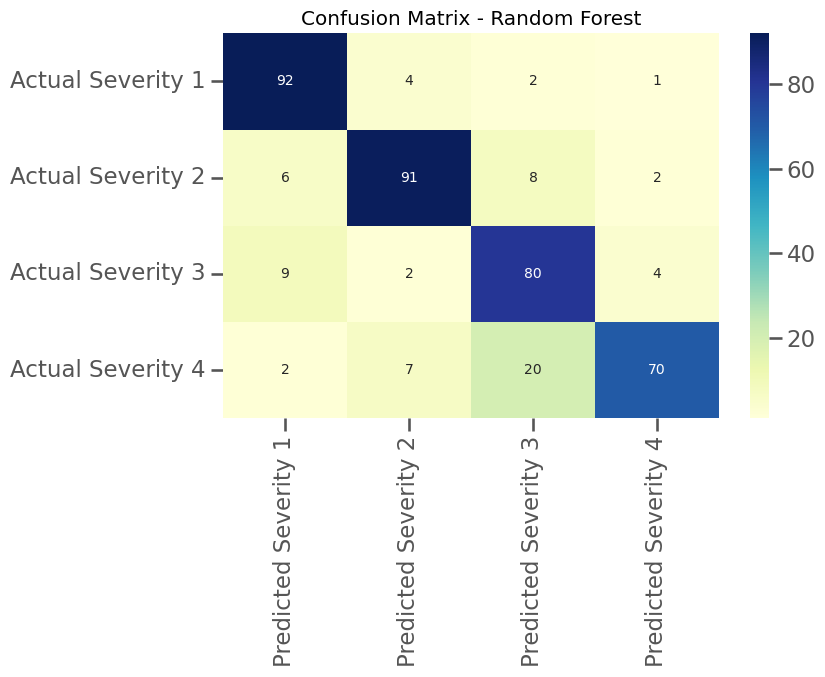

In [166]:
y_pred = rfc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

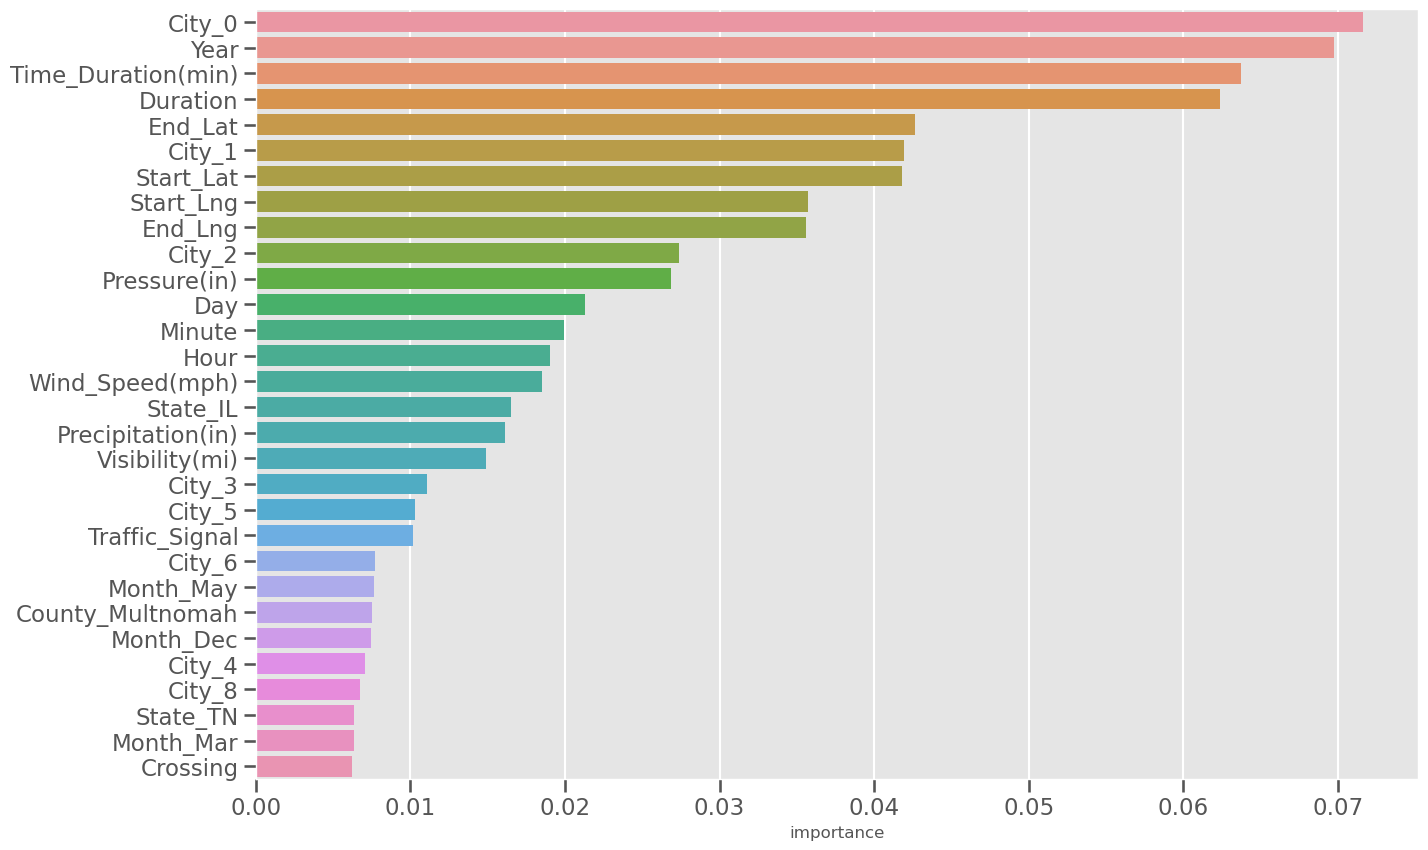

In [167]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

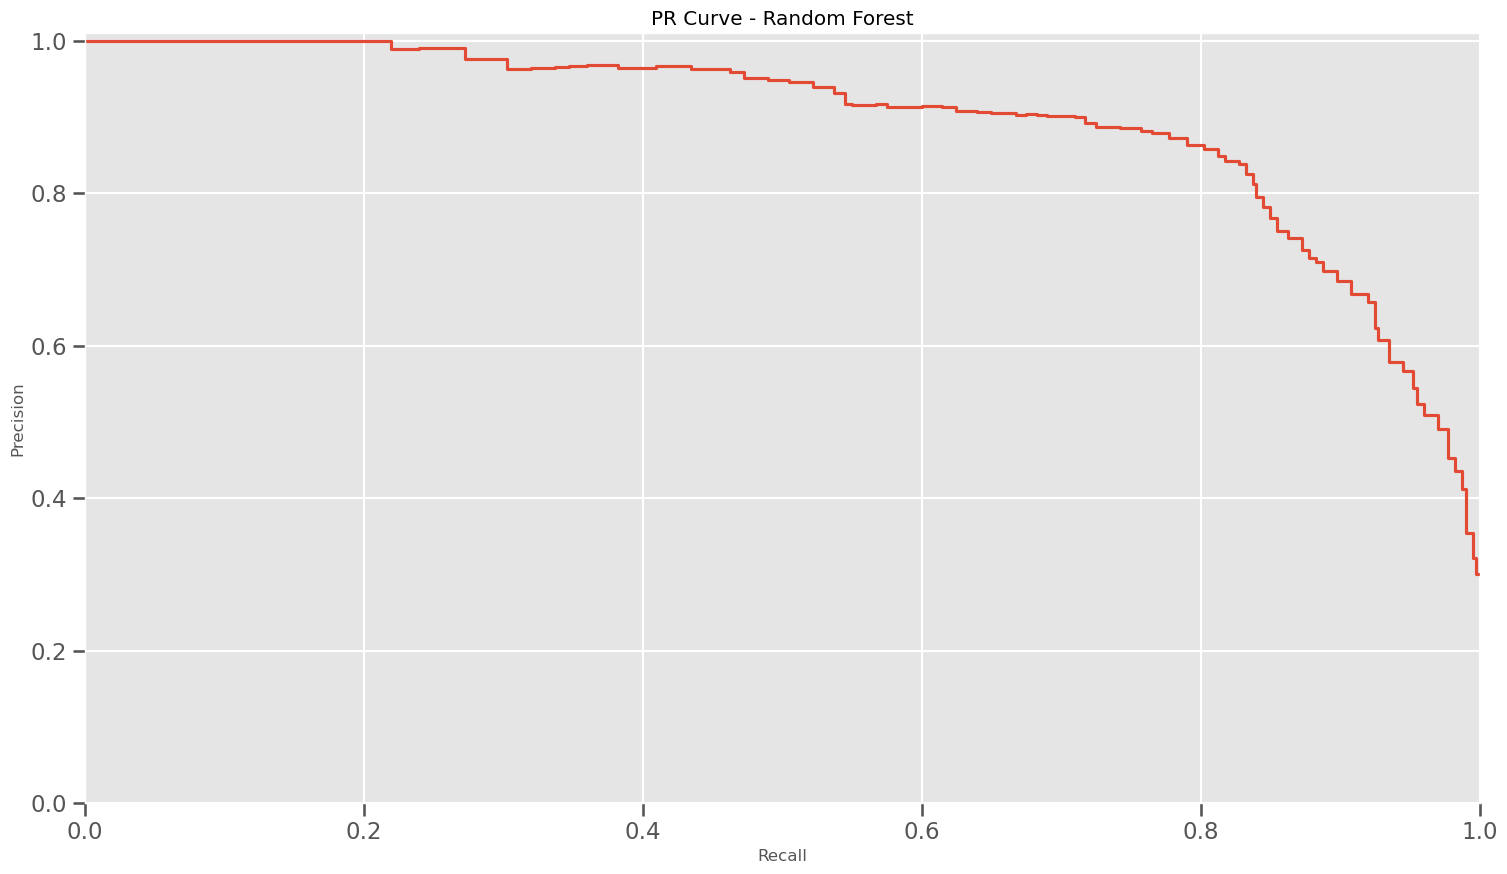

In [168]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_test)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

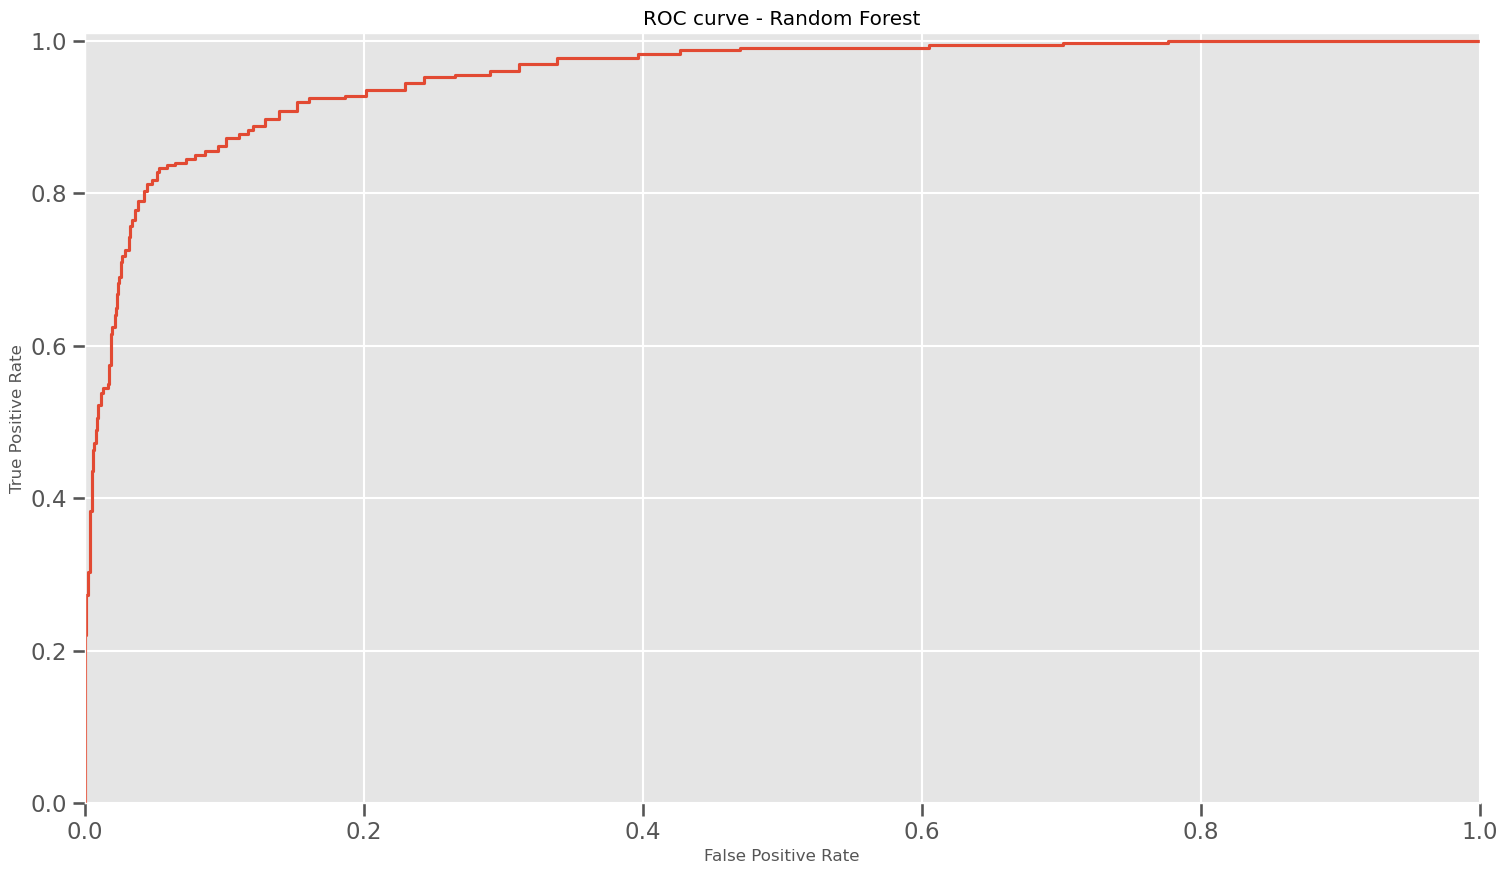

In [169]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#### Naive Bayes

#### Guassian Naive Bayes

In [170]:
sample = acs
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 505) (1200,)
(400, 505) (400,)


In [171]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_test, y_test))

Train score: 0.855
Validation score: 0.7425


In [172]:
y_pred = gnb.predict(X_test)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_test, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       301
         2.0       0.84      0.81      0.82       293
         3.0       0.75      0.87      0.80       305
         4.0       0.97      0.77      0.86       301

    accuracy                           0.85      1200
   macro avg       0.86      0.85      0.86      1200
weighted avg       0.86      0.85      0.86      1200

              precision    recall  f1-score   support

         1.0       0.85      0.91      0.88        99
         2.0       0.77      0.64      0.70       107
         3.0       0.57      0.73      0.64        95
         4.0       0.84      0.70      0.76        99

    accuracy                           0.74       400
   macro avg       0.76      0.74      0.74       400
weighted avg       0.76      0.74      0.74       400



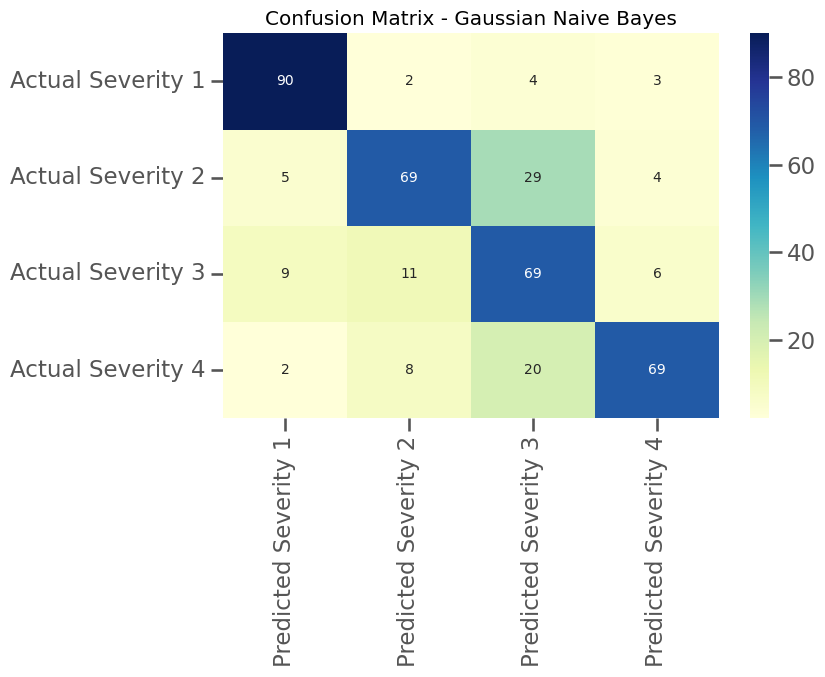

In [173]:
y_pred = gnb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

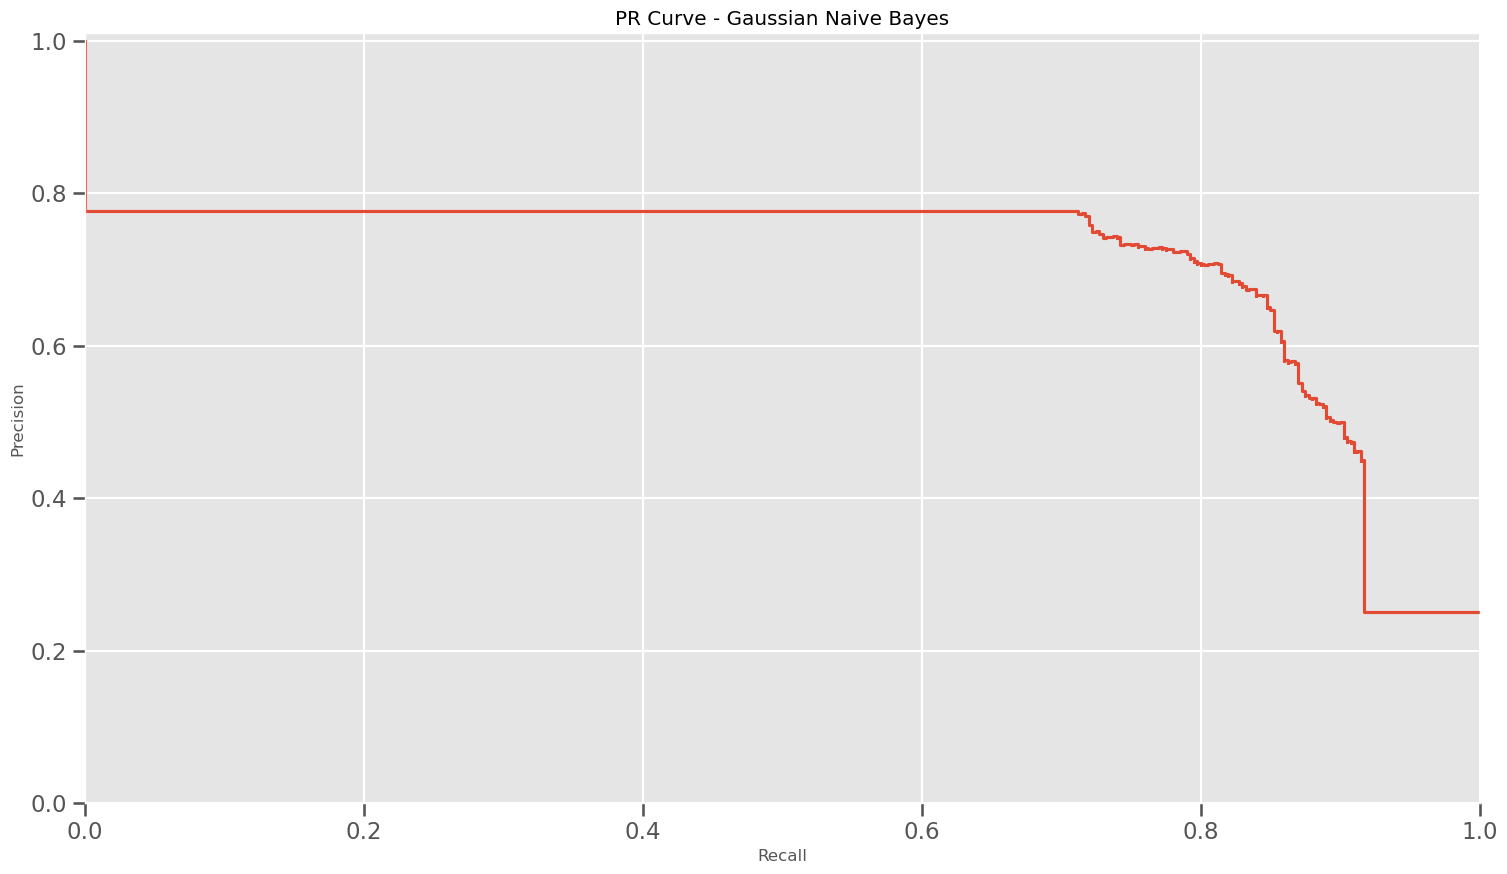

In [174]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = gnb.predict_proba(X_test)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()


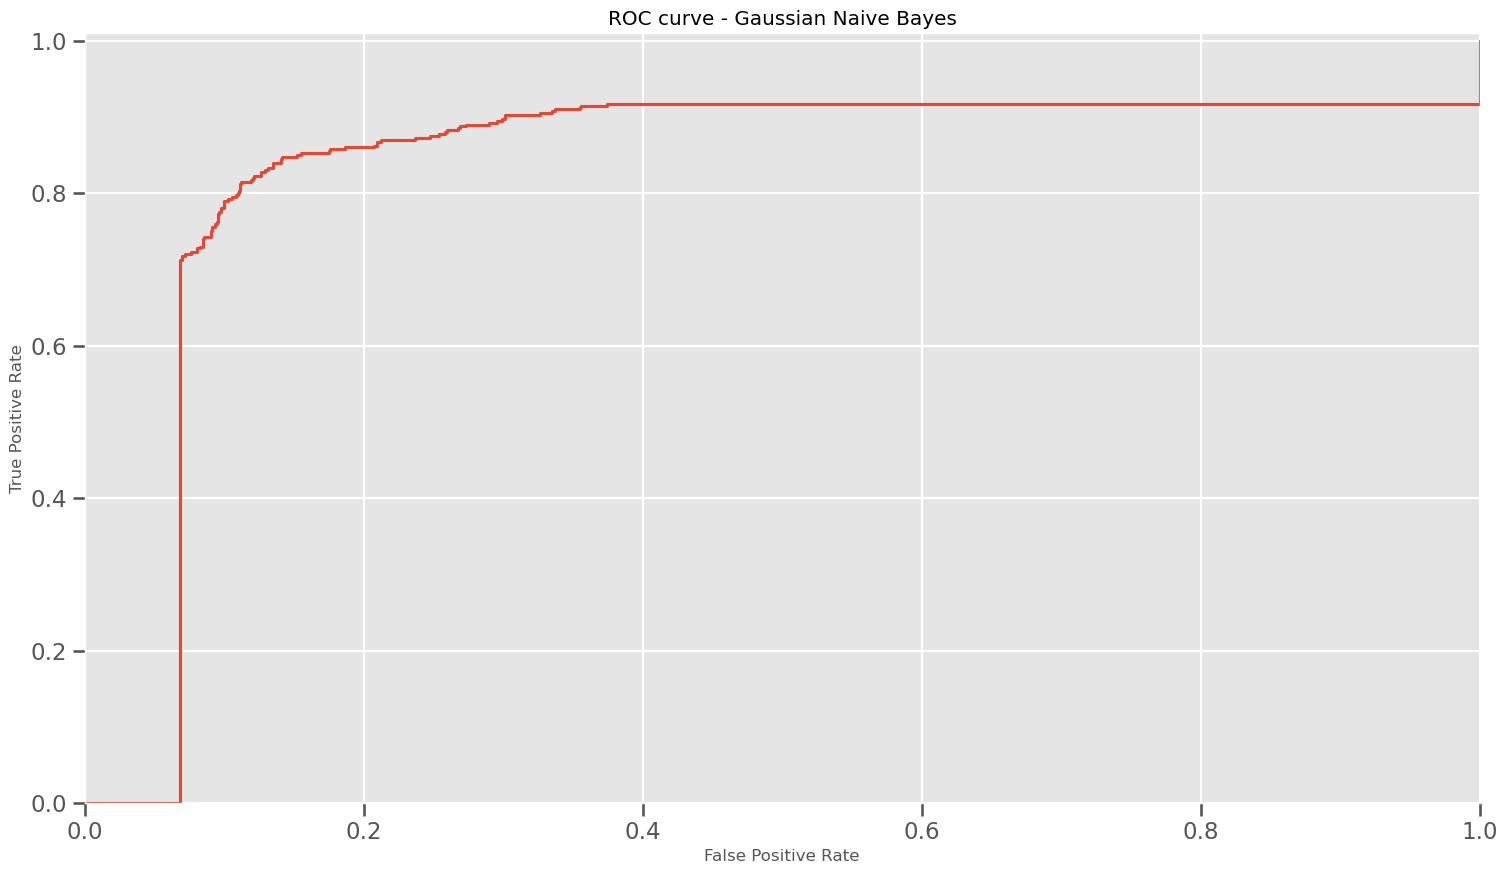

In [175]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], where="post")

plt.title("ROC curve - Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#### Bernoulli Naive Bayes

In [176]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train score:", bnb.score(X_train, y_train))
print("Validation score:", bnb.score(X_test, y_test))

Train score: 0.81
Validation score: 0.73


In [177]:
y_pred = bnb.predict(X_test)

accuracy["Bernoulli Naive Bayes"] = accuracy_score(y_test, y_pred)
f1["Bernoulli Naive Bayes"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, bnb.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.85      0.90      0.88       301
         2.0       0.74      0.78      0.76       293
         3.0       0.81      0.82      0.81       305
         4.0       0.84      0.74      0.79       301

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200

              precision    recall  f1-score   support

         1.0       0.79      0.87      0.83        99
         2.0       0.71      0.65      0.68       107
         3.0       0.65      0.71      0.68        95
         4.0       0.77      0.70      0.73        99

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



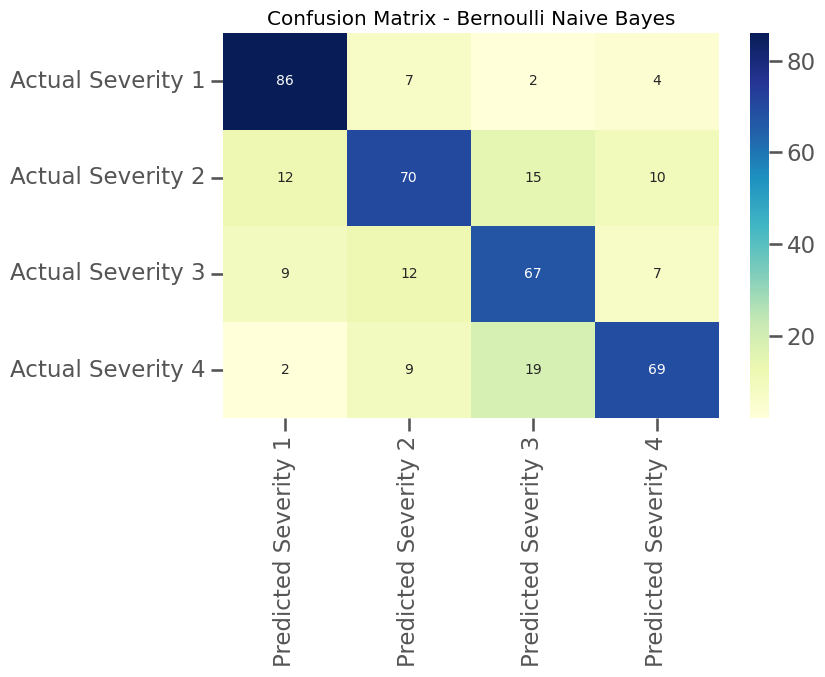

In [178]:
y_pred = bnb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

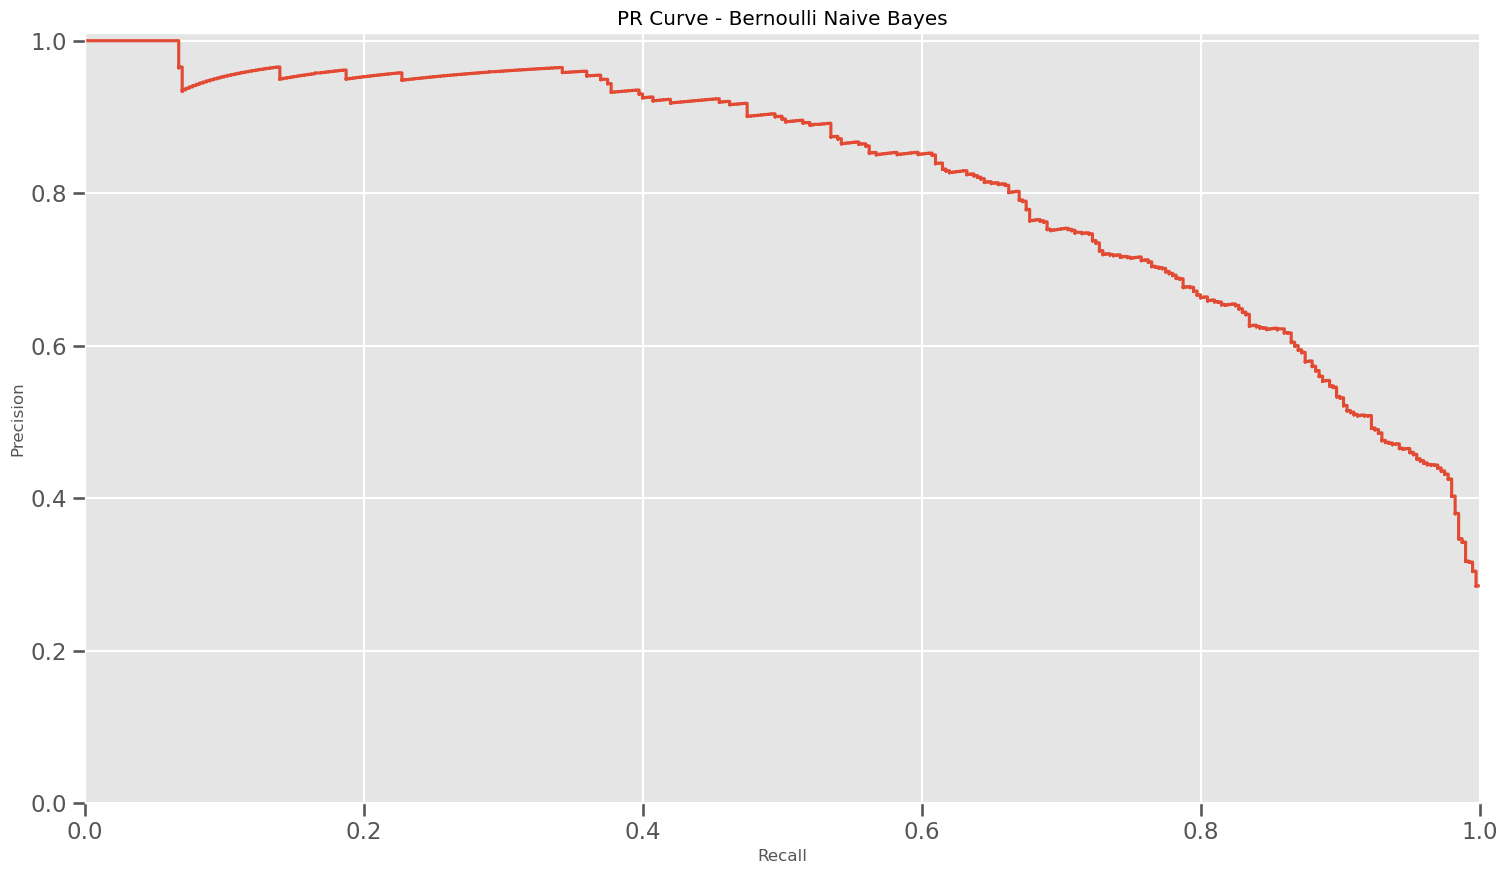

In [179]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = bnb.predict_proba(X_test)

precision["Bernoulli Naive Bayes"], recall["Bernoulli Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Bernoulli Naive Bayes"], precision["Bernoulli Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Bernoulli Naive Bayes")
plt.show()

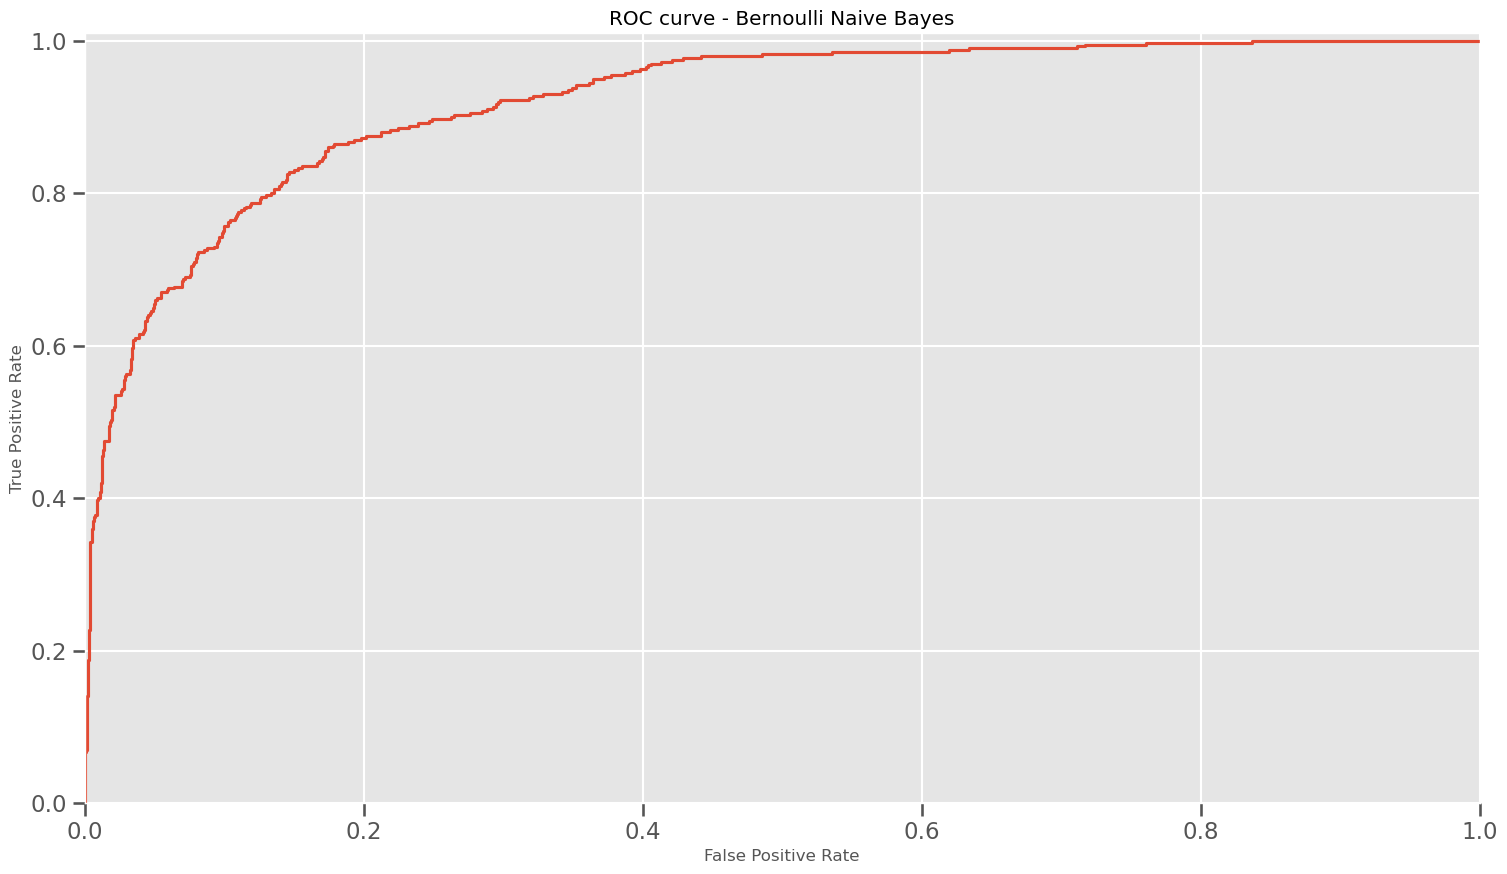

In [180]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], where="post")

plt.title("ROC curve - Bernoulli Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#### Multi Layer Perceptron

In [181]:
sample = acs
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 505) (1200,)
(400, 505) (400,)


In [182]:
mlp = MLPClassifier(random_state=42, verbose=False)
parameters = 
grid = GridSearchCV(mlp, parameters, verbose=5, n_jobs=-1)

sample = acs.sample(min(10_000, len(acs)), replace = False, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)
grid.fit(X_sample, y_sample)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'max_iter': 200, 'solver': 'adam'}
Train score: 0.86
Validation score: 0.835


In [183]:
print("Default scores:")
mlp.fit(X_train, y_train)
print("Train score:", mlp.score(X_train, y_train))
print("Validation score:", mlp.score(X_test, y_test))

Default scores:
Train score: 0.8416666666666667
Validation score: 0.7175


In [184]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       4.169037      1.533413         0.010966        0.000296   
7       4.331324      0.428432         0.006315        0.000869   
1       3.944355      1.300771         0.023938        0.024648   
3       2.407013      0.402833         0.011932        0.001090   
0       1.019218      0.246124         0.018435        0.012287   
2       0.983071      0.266010         0.015521        0.008189   
4       1.112445      0.193296         0.011730        0.001827   
6       1.210124      0.512353         0.015309        0.007106   

  param_activation param_hidden_layer_sizes param_max_iter param_solver  \
5             relu                 (64, 32)            200         adam   
7             relu             (32, 64, 32)            200         adam   
1             tanh                 (64, 32)            200         adam   
3             tanh             (32, 64, 32)            200         adam   
0             tanh                 (64, 32)            200          sgd   
2             tanh             (32, 64, 32)            200          sgd   
4             relu                 (64, 32)            200          sgd   
6             relu             (32, 64, 32)            200          sgd   

                                              params  split0_test_score  \
5  {'activation': 'relu', 'hidden_layer_sizes': (...           0.734375   
7  {'activation': 'relu', 'hidden_layer_sizes': (...           0.750000   
1  {'activation': 'tanh', 'hidden_layer_sizes': (...           0.493750   
3  {'activation': 'tanh', 'hidden_layer_sizes': (...           0.471875   
0  {'activation': 'tanh', 'hidden_layer_sizes': (...           0.284375   
2  {'activation': 'tanh', 'hidden_layer_sizes': (...           0.250000   
4  {'activation': 'relu', 'hidden_layer_sizes': (...           0.250000   
6  {'activation': 'relu', 'hidden_layer_sizes': (...           0.250000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.800000           0.731250           0.771875           0.775000   
7           0.709375           0.800000           0.725000           0.771875   
1           0.534375           0.553125           0.675000           0.493750   
3           0.559375           0.565625           0.515625           0.531250   
0           0.365625           0.259375           0.243750           0.331250   
2           0.240625           0.265625           0.271875           0.250000   
4           0.253125           0.250000           0.250000           0.253125   
6           0.250000           0.250000           0.250000           0.253125   

   mean_test_score  std_test_score  rank_test_score  
5         0.762500        0.026146                1  
7         0.751250        0.032392                2  
1         0.550000        0.066644                3  
3         0.528750        0.033796                4  
0         0.296875        0.045372                5  
2         0.255625        0.011422                6  
4         0.251250        0.001531                7  
6         0.250625        0.001250                8

In [185]:
y_pred = mlp.predict(X_test)

accuracy["Multi Layer Perceptron"] = accuracy_score(y_test, y_pred)
f1["Multi Layer Perceptron"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, mlp.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.95      0.89       301
         2.0       0.73      0.96      0.83       293
         3.0       0.90      0.78      0.84       305
         4.0       1.00      0.68      0.81       301

    accuracy                           0.84      1200
   macro avg       0.86      0.84      0.84      1200
weighted avg       0.87      0.84      0.84      1200

              precision    recall  f1-score   support

         1.0       0.69      0.92      0.79        99
         2.0       0.67      0.83      0.74       107
         3.0       0.72      0.64      0.68        95
         4.0       0.92      0.46      0.62        99

    accuracy                           0.72       400
   macro avg       0.75      0.71      0.71       400
weighted avg       0.75      0.72      0.71       400



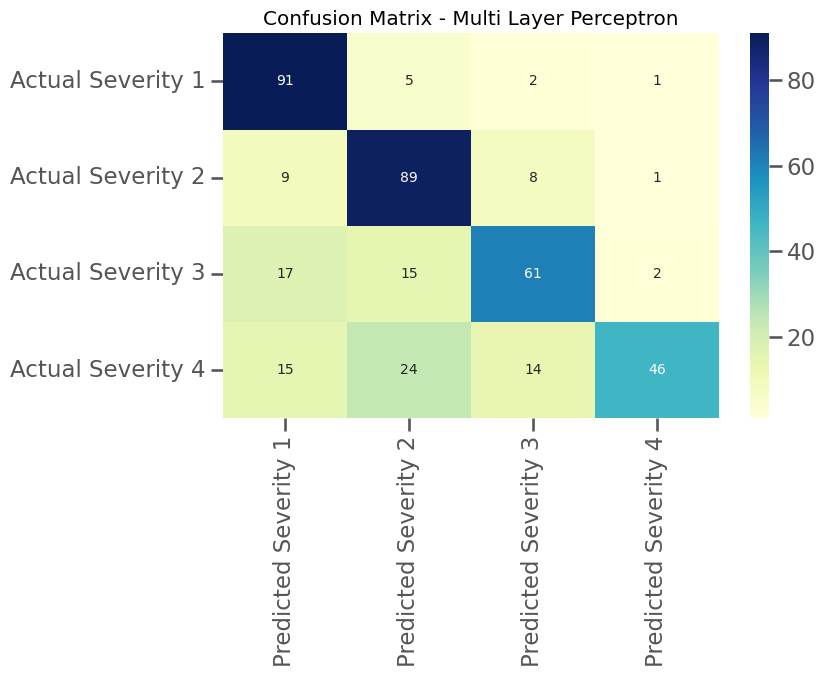

In [186]:
y_pred = mlp.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multi Layer Perceptron")
plt.show()

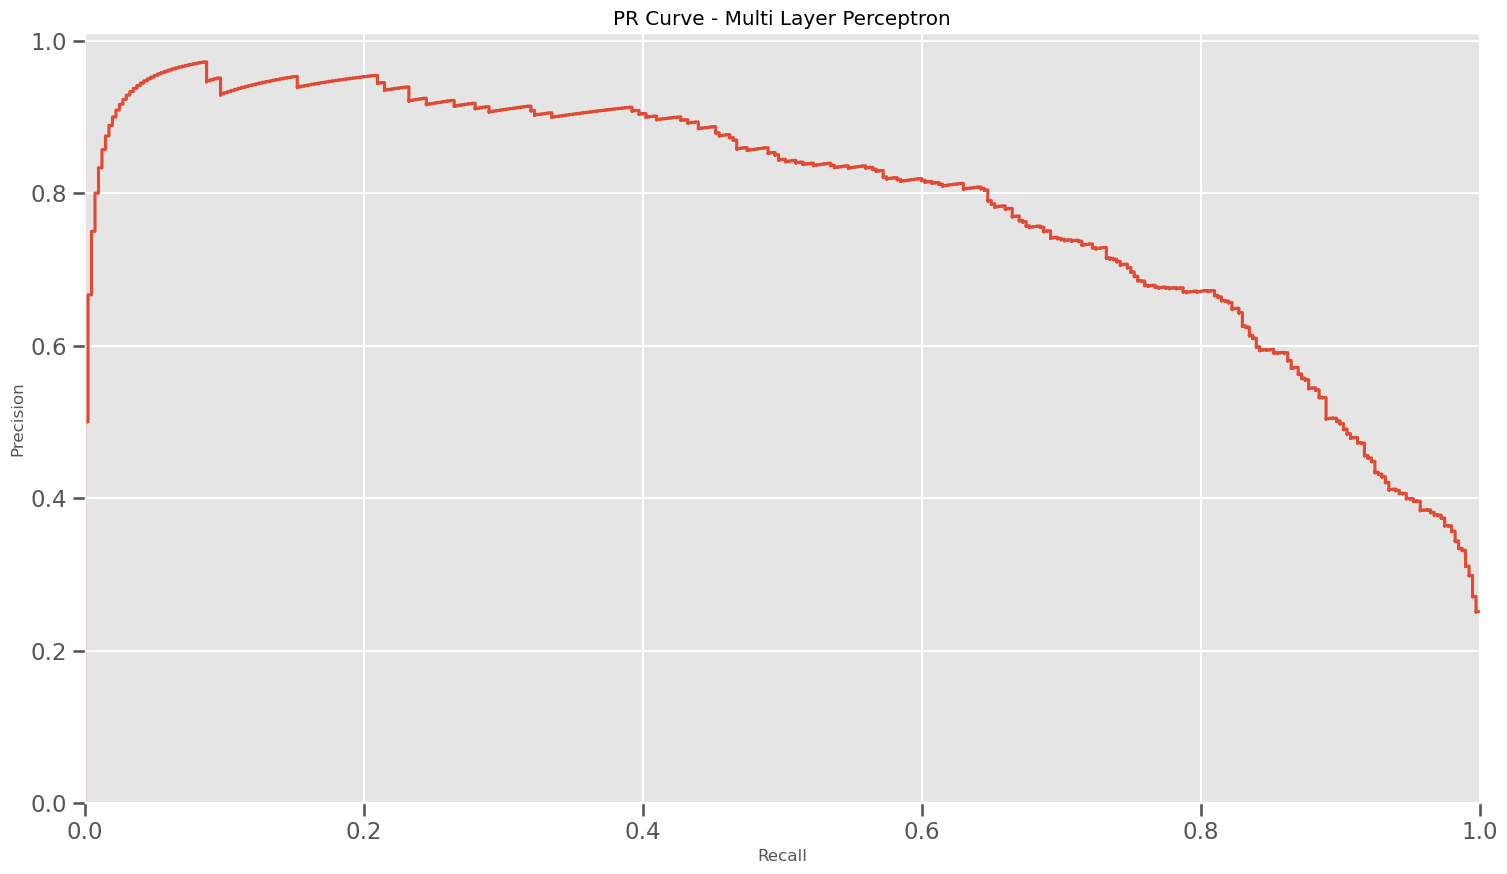

In [187]:
Y = label_binarize(y_test, classes=[1, 2, 3, 4])

y_score = mlp.predict_proba(X_test)

precision["Multi Layer Perceptron"], recall["Multi Layer Perceptron"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multi Layer Perceptron"], tpr["Multi Layer Perceptron"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multi Layer Perceptron"], precision["Multi Layer Perceptron"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multi Layer Perceptron")
plt.show()

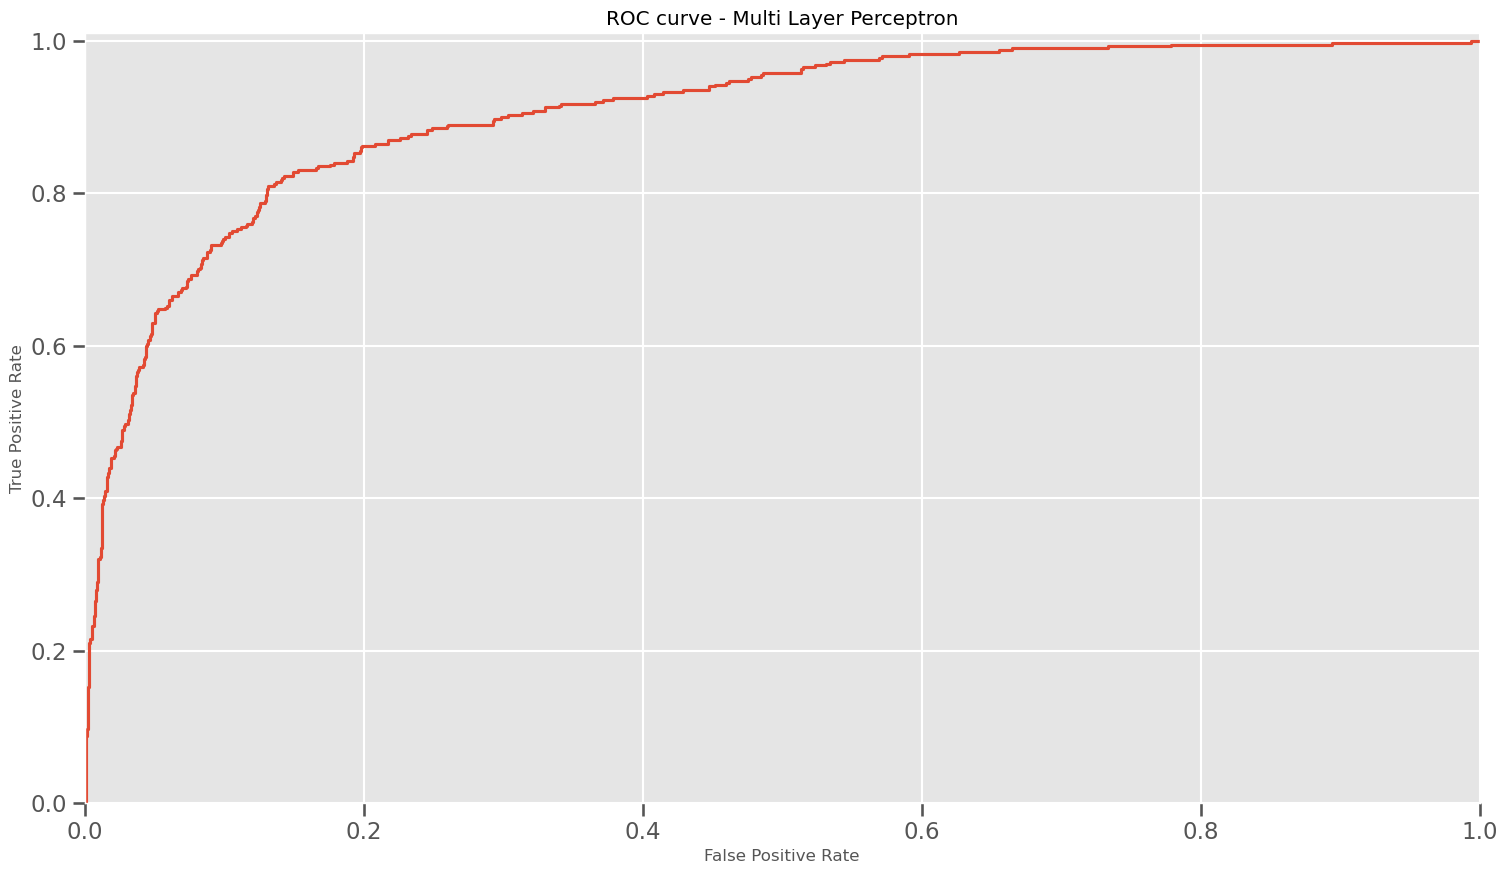

In [188]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Multi Layer Perceptron"], tpr["Multi Layer Perceptron"], where="post")

plt.title("ROC curve - Multi Layer Perceptron")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Algorithms Evaluation

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


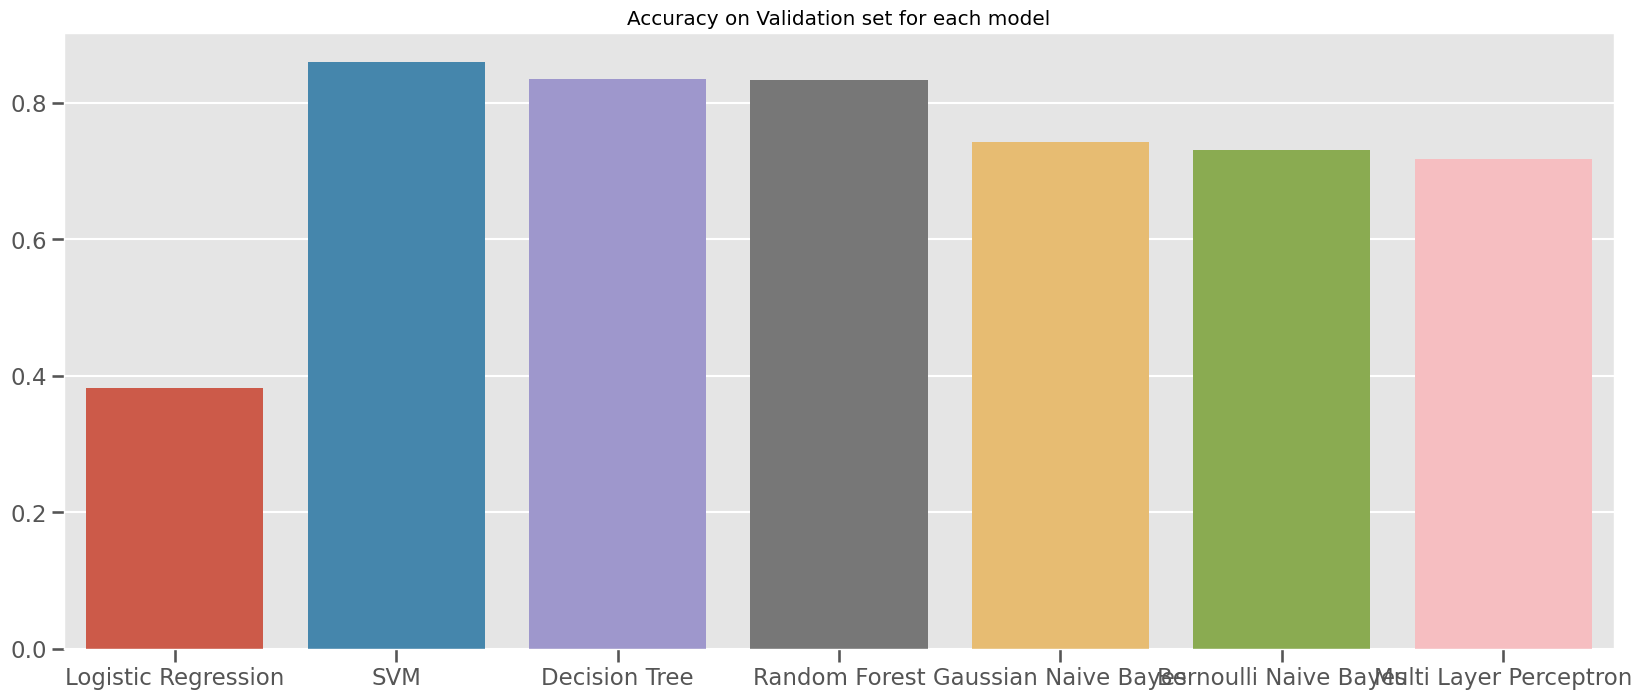

In [189]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

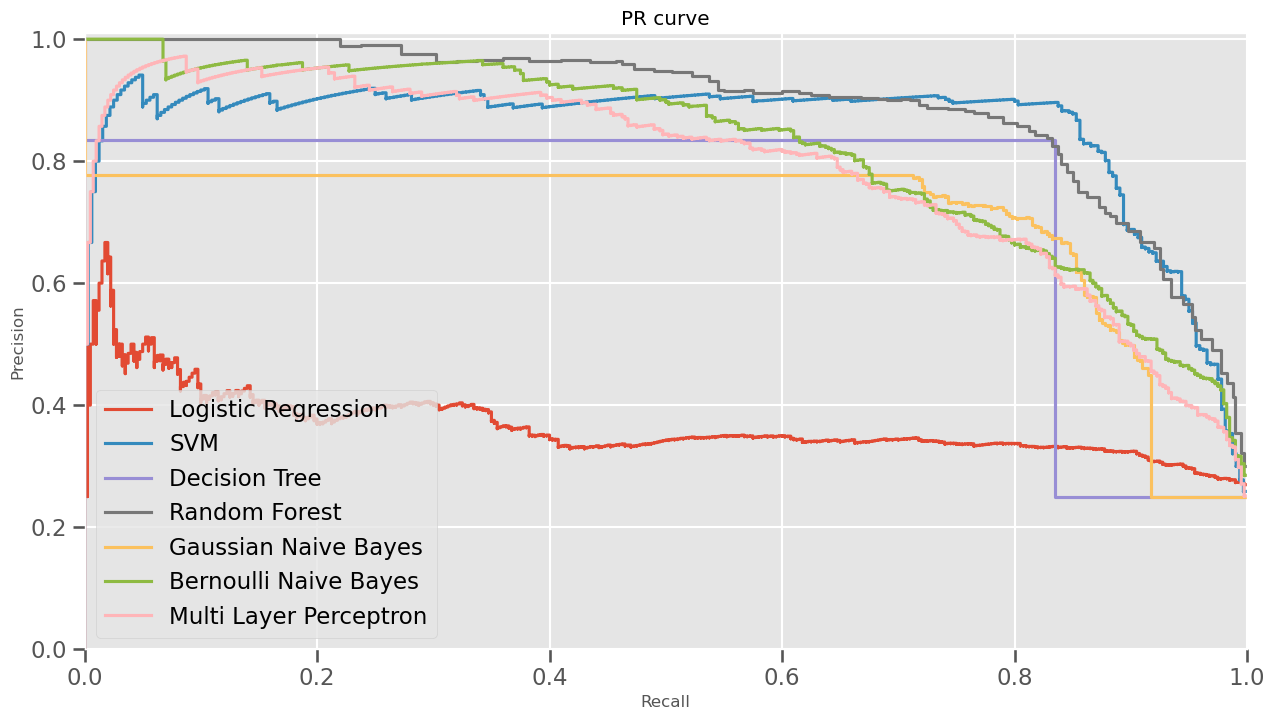

In [190]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

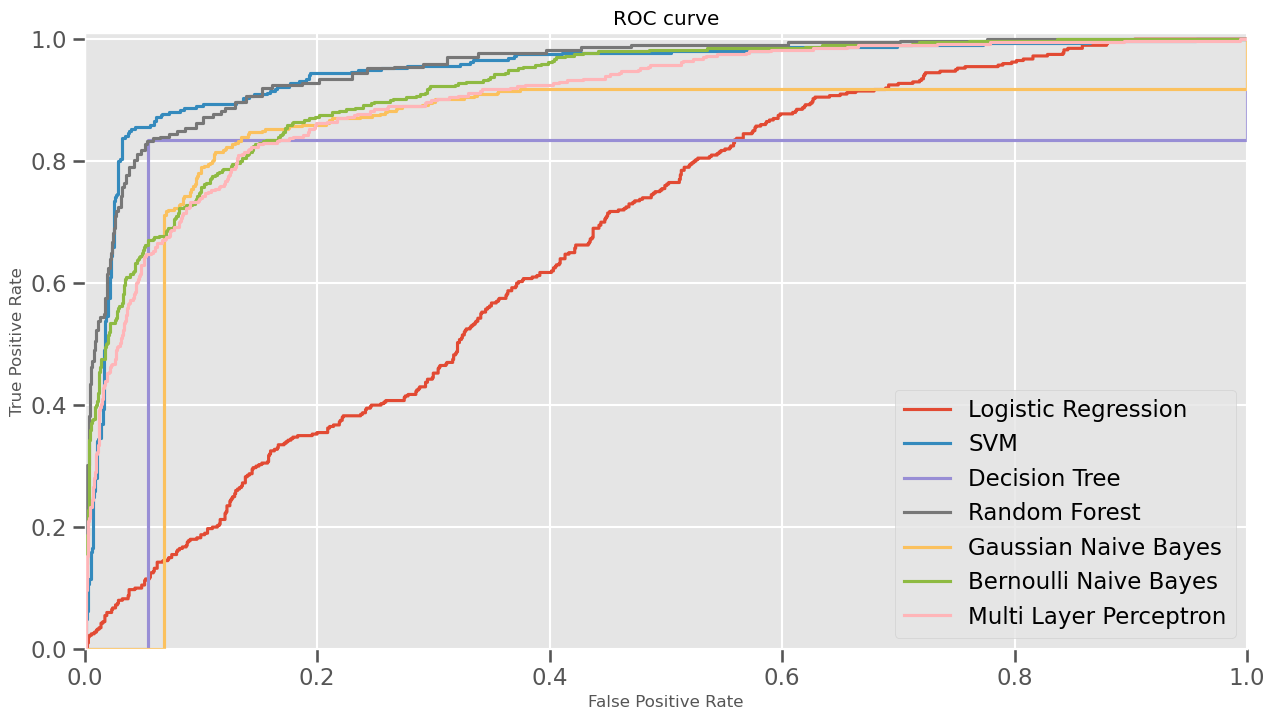

In [191]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

## Test

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       400
         2.0       0.88      0.91      0.89       400
         3.0       0.81      0.89      0.85       400
         4.0       0.95      0.76      0.84       400

    accuracy                           0.88      1600
   macro avg       0.89      0.88      0.88      1600
weighted avg       0.89      0.88      0.88      1600



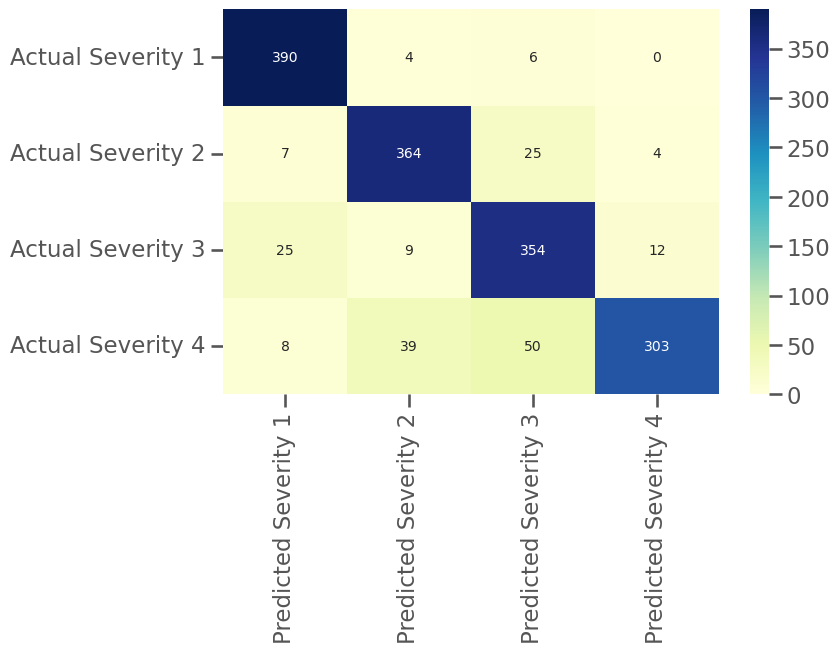

In [192]:
sample = acs

target = 'Severity'

y_test_sample = sample[target]
X_test_sample = sample.drop(target, axis=1)

y_pred = svc.predict(X_test_sample)

print(classification_report(y_test_sample, y_pred))

confmat = confusion_matrix(y_true=y_test_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()